<div style="background-color: blue; color: white;">
    <h1 font-size: 70px;">Telecom Churn Case Study</h1>
</div>


<b>By Prabhavathi, Poornima and Uma Devi K</b>

## Problem Statement 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

### Business Goal:
Retaining high profitable customers is the number one business goal.Approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Approach for this case study
- Step 1 - Importing necessary Libraries, Data understanding and Analysos
- Step 2 - Derive new features from Object Type Columns
- Step 3 - Filtering High Valued customers
- Step 4 - Defining Churned customers 
- Step 5 - Derive new features from Numeric Type Columns
- Step 6 - Exploratory Data Analysis (EDA)
- Step 7 - Model Building
- Setp 8 - PCA
- Step 9 - Building Logistic Regression Model on PCA data
- Step 10 - Random Forest Classification using RandomizedSearchCV parameter tuning
- Step 11 - Feature Importance Based on Random Forest Classification
- Step 12 - Logistic Regression
- Step 13 - Feature Importance Based on Logistic Model
- Step 14 - Model Comparision
- Step 15 - Final Inferences & Suggestions

## <font color="green">Importing necessary Libraries, Data Inspection and Data Cleaning</font>

In [1]:
# import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Environment settings
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [2]:
# Data Reading
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
# check top 5 rows of Dataframe
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Fetch all columns of Dataframe for readability
for col in df.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

#### <font color=green> Inspecting Data </font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


<font color=navy> **Observation** </font>
-  There were total 99999 customer data and 226 features in the dataframe

In [6]:
# Check for duplicate rows
print(df.duplicated().sum())

0


<font color=navy> **Observation** </font>
-  There were no duplicate rows in the dataframe

In [7]:
# Check columns having more than 40% of null values 
null_percent_col40 = []
for col in df.columns:
    if ((df[col].isnull().sum() * 100 / df.shape[0]) >= 40):
        null_percent_col40.append(col)


In [8]:
# print columns having more than 40% null values
print(null_percent_col40)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [9]:
# drop columns having more than 40% null values as they won't add up any value for analysis
df.drop(null_percent_col40,axis=1,inplace=True)

#### <font color=green> Analysis on Object type columns </font>

In [10]:
# fetching Object type columns
df.select_dtypes('object').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

<font color=navy> **Observation** </font>
-  All Object columns are Date type hence converting datatype of Object columns to datetime64[ns]

In [11]:
df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].astype('datetime64[ns]')

In [12]:
# checking value counts of last_date_of_month columns
df.filter(regex=r'^(last_date_of_month)').value_counts()

last_date_of_month_6  last_date_of_month_7  last_date_of_month_8  last_date_of_month_9
2014-06-30            2014-07-31            2014-08-31            2014-09-30              98340
Name: count, dtype: int64

<font color=navy> **Observation** </font>
-  last_date_of_month are single value columns containing last date of respective month, 
imputing NaN values to the last date of respective month

In [13]:
df.filter(regex=r'^(last_date_of_month)').isnull().sum()

last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
dtype: int64

In [14]:
df['last_date_of_month_7'].fillna('2014-07-31',inplace=True)
df['last_date_of_month_8'].fillna('2014-08-31',inplace=True)
df['last_date_of_month_9'].fillna('2014-09-30',inplace=True)

In [15]:
# Checking null valyes for date_of_last_rech columns
df.filter(regex=r'^(date_of_last_rech)').isnull().sum()

date_of_last_rech_6    1607
date_of_last_rech_7    1767
date_of_last_rech_8    3622
date_of_last_rech_9    4760
dtype: int64

<font color=navy> **Observation** </font>
-  Null values in date_of_last_rech probably mean they haven't made any recharge in that respective month

In [16]:
# filtering last_date_of_month and date_of_last_rech column values
df.filter(regex=r'^(last_date_of_month|date_of_last_rech)')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0               2014-06-30           2014-07-31           2014-08-31   
1               2014-06-30           2014-07-31           2014-08-31   
2               2014-06-30           2014-07-31           2014-08-31   
3               2014-06-30           2014-07-31           2014-08-31   
4               2014-06-30           2014-07-31           2014-08-31   
...                    ...                  ...                  ...   
99994           2014-06-30           2014-07-31           2014-08-31   
99995           2014-06-30           2014-07-31           2014-08-31   
99996           2014-06-30           2014-07-31           2014-08-31   
99997           2014-06-30           2014-07-31           2014-08-31   
99998           2014-06-30           2014-07-31           2014-08-31   

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0               2014-09-30          2014-06-21          2014-07-16   
1               2014-09-30          2014-06-29          2014-07-31   
2               2014-09-30          2014-06-17          2014-07-24   
3               2014-09-30          2014-06-28          2014-07-31   
4               2014-09-30          2014-06-26          2014-07-28   
...                    ...                 ...                 ...   
99994           2014-09-30          2014-06-03          2014-07-20   
99995           2014-09-30          2014-06-17          2014-07-17   
99996           2014-09-30          2014-06-13          2014-07-26   
99997           2014-09-30          2014-06-17          2014-07-19   
99998           2014-09-30          2014-06-16                 NaT   

      date_of_last_rech_8 date_of_last_rech_9  
0              2014-08-08          2014-09-28  
1              2014-08-28          2014-09-30  
2              2014-08-14          2014-09-29  
3              2014-08-31          2014-09-30  
4              2014-08-09          2014-09-28  
...                   ...                 ...  
99994          2014-08-26          2014-09-25  
99995          2014-08-24          2014-09-26  
99996                 NaT          2014-09-02  
99997          2014-08-20          2014-09-17  
99998                 NaT                 NaT  

[99999 rows x 8 columns]

<font color=navy> **Observation** </font>
-  As Date columns doesn't help for analysis, converting these columns to number of days since last recharge is made which would add more value to our analysis

## <font color=green> Deriving new feature from Object type column </font>

In [17]:
# function to fetch days last recharge value
def daysRecharge(last_date_of_month_9,date_of_last_rech_9,date_of_last_rech_8,date_of_last_rech_7,date_of_last_rech_6):
    if (pd.isna(date_of_last_rech_9) == False):
        return (last_date_of_month_9-date_of_last_rech_9)
    elif (pd.isna(date_of_last_rech_8) == False):
        return (last_date_of_month_9-date_of_last_rech_8)
    elif (pd.isna(date_of_last_rech_7) == False):
        return (last_date_of_month_9-date_of_last_rech_7)
    elif (pd.isna(date_of_last_rech_6) == False):
        return (last_date_of_month_9-date_of_last_rech_6)
    else:
        return ''

In [18]:
# deriving new feature days_last_rech with base date of last_date_of_month by calling daysRecharge function 
df['days_last_rech'] = df.apply(lambda x: daysRecharge(x['last_date_of_month_9'], x['date_of_last_rech_9'],
                                                       x['date_of_last_rech_8'],x['date_of_last_rech_7'],
                                                       x['date_of_last_rech_6']), axis=1 )
                                                       

In [19]:
# checking top rows of new column
df['days_last_rech'].head()

0    2 days 00:00:00
1    0 days 00:00:00
2    1 days 00:00:00
3    0 days 00:00:00
4    2 days 00:00:00
Name: days_last_rech, dtype: object

In [20]:
# converting datatype of new column to float
df['days_last_rech'] = pd.to_timedelta(df['days_last_rech'], errors='coerce').dt.days

In [21]:
df['days_last_rech'].head()

0    2.0
1    0.0
2    1.0
3    0.0
4    2.0
Name: days_last_rech, dtype: float64

In [22]:
df['days_last_rech'].describe()

count    99905.000000
mean         6.459416
std         13.482371
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        121.000000
Name: days_last_rech, dtype: float64

In [23]:
# date columns can be removed as new feature is created now from it
df.drop(df.filter(regex=r'^(last_date_of_month|date_of_last_rech)').columns,axis=1,inplace=True)

In [24]:
# dropping mobile_number and circle_id too as they are not required for analysis
df.drop(['mobile_number','circle_id'],axis=1,inplace=True)

In [25]:
# checking dataframe again after handling object columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 177 entries, loc_og_t2o_mou to days_last_rech
dtypes: float64(144), int64(33)
memory usage: 135.0 MB


<font color=navy> **Observation** </font>
-  All columns in dataframe are now numeric after handling Object type columns

## <font color=green> Filtering High Valued customers </font>

In [26]:
# To fetch high valued customers
perc70_avg_rech = df[['total_rech_amt_6','total_rech_amt_7']].sum(axis=1).quantile(0.7)
perc70_avg_rech

737.0

In [27]:
# filtering high valued customers
highvalue_df = df.loc[df[['total_rech_amt_6','total_rech_amt_7']].sum(axis=1) >= perc70_avg_rech,:]

In [28]:
# checking high value customer data
highvalue_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
13             0.0             0.0             0.0   492.846   205.671   
16             0.0             0.0             0.0   430.975   299.869   
17             0.0             0.0             0.0   690.008    18.980   

      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7   3171.480  500.000        57.84        54.68        52.29          NaN   
8    137.362  166.787       413.69       351.03        35.08        33.46   
13   593.260  322.732       501.76       108.39       534.24       244.81   
16   187.894  206.490        50.51        74.01        70.61        31.34   
17    25.499  257.583      1185.91         9.28         7.79       558.51   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
7         453.43        567.16        325.91           NaN          16.23   
8          94.66         80.63        136.48        108.71           0.00   
13        413.31        119.28        482.46        214.06          23.53   
16        296.29        229.74        162.76        224.39           0.00   
17         61.64          0.00          5.54         87.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
7           33.49          31.64            NaN          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11         136.78           7.98          35.26   
16           2.83           0.00           0.00           0.00          17.74   
17           4.76           4.81           0.00           0.00           8.46   

    roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7           38.06            NaN             51.39             31.38   
8            0.00           0.00            297.13            217.59   
13           1.44          12.78             49.63              6.19   
16           0.00           0.00             42.61             65.16   
17          13.34          17.98             38.99              0.00   

    loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              40.28               NaN            308.63            447.38   
8              12.49             26.13             80.96             70.58   
13             36.01              6.14            151.13             47.28   
16             67.38             26.88            273.29            145.99   
17              0.00             36.41             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             162.28               NaN             62.13             55.14   
8              50.54             34.58              0.00              0.00   
13            294.46            108.24              4.54              0.00   
16            128.28            201.49              0.00              4.48   
17              0.00              9.38              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              53.23               NaN               0.0               0.0   
8               0.00              0.00               0.0               0.0   
13             23.51              5.29               0.0               0.0   
16             10.26              4.66               0.0               0.0   
17              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
7               0.00               NaN        422.16        533.91   
8               7.15               0.0        378.09        288.18   
13              0.49               0.0        205.31         53.48   
16              0.00      

In [29]:
# resetting index of new dataframe
highvalue_df.reset_index(drop=True,inplace = True)

In [30]:
highvalue_df.shape

(30011, 177)

<font color=navy> **Observation** </font>
-  There are 30011 high values customers

## <font color=green> Defining Churned customers </font>

In [31]:
# checking for null values for columns before defining churned customers
highvalue_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [32]:
# Default churn value set to 0
highvalue_df['churn']=0
# Deriving churned customers based on call and data usage
highvalue_df.loc[(highvalue_df['total_ic_mou_9']==0) & (highvalue_df['total_og_mou_9']==0) & 
                 (highvalue_df['vol_2g_mb_9']==0) & (highvalue_df['vol_3g_mb_9']==0),'churn']=1

In [33]:
# Checkign percentage of churned customers
(highvalue_df['churn'].value_counts() * 100 /highvalue_df.shape[0]).round(2)

churn
0    91.36
1     8.64
Name: count, dtype: float64

<font color=navy> **Observation** </font>
-  There is a huge imbalance between Churn and Non Churn customers which need to be handling during model building

#### <font color=green> Analysis on Numeric type columns </font>

In [34]:
# checking summary of all columns
highvalue_df.describe(percentiles=[0.25,.50,.75,.95,.99])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         29897.0         29897.0         29897.0  30011.000000   
mean              0.0             0.0             0.0    587.284404   
std               0.0             0.0             0.0    442.722413   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    364.161000   
50%               0.0             0.0             0.0    495.682000   
75%               0.0             0.0             0.0    703.922000   
95%               0.0             0.0             0.0   1240.793500   
99%               0.0             0.0             0.0   1983.089500   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  29695.000000  29708.000000   
mean     589.135427    534.857433    488.656197    299.184718    307.447285   
std      462.897814    492.259586    496.486834    462.202367    483.244786   
min    -2014.045000   -945.808000  -1899.505000      0.000000      0.000000   
25%      365.004500    289.609500    239.184000     42.960000     42.660000   
50%      493.561000    452.091000    413.152000    128.330000    127.950000   
75%      700.788000    671.150000    635.553000    357.120000    364.567500   
95%     1261.421500   1258.555500   1205.209500   1160.980000   1214.293500   
99%     1999.374500   1987.934400   1957.960000   2173.693600   2227.627400   
max    35145.834000  33543.624000  38805.617000   7376.710000   8157.780000   

        onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29073.000000  28307.000000  29695.000000  29708.000000  29073.000000   
mean     276.234168    255.228092    422.380819    428.248096    387.121245   
std      471.505518    451.888513    471.096294    487.103204    480.279273   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.210000     26.140000    141.410000    139.587500    107.660000   
50%      106.280000     94.080000    285.960000    285.485000    251.360000   
75%      309.980000    280.860000    527.315000    536.827500    493.510000   
95%     1130.686000   1068.171000   1274.424000   1291.585000   1201.226000   
99%     2220.414000   2169.107400   2335.220800   2418.847800   2233.063600   
max    10752.560000  10427.460000   8362.360000   9667.130000  14007.340000   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  28307.000000   29695.000000   29708.000000   29073.000000   
mean     357.382243      17.598062      13.660030      13.683965   
std      449.766130      79.552216      76.679599      75.706579   
min        0.000000       0.000000       0.000000       0.000000   
25%       88.970000       0.000000       0.000000       0.000000   
50%      226.490000       0.000000       0.000000       0.000000   
75%      454.935000       0.000000       0.000000       0.000000   
95%     1135.430000      95.448000      63.869000      65.988000   
99%     2200.847200     350.239600     294.324000     291.368000   
max    10310.760000    2613.310000    3813.290000    4169.810000   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   28307.000000   29695.000000   29708.000000   29073.000000   
mean       12.084915      29.633675      22.260754      22.161948   
std        70.322260     119.160857      98.397962     107.874014   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        53.890000     170.069000     120.916000     118.748000   
99%       257.940200     546.031800     452.929500     445.150000   
max      3220.660000    3775.110000    2812.04

<font color=navy> **Observation** </font>
-  There are few columns which have obly single value (0.0) these can be dropped as they won't help for analysis

In [35]:
# dropping single value columns
highvalue_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
   'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis=1,inplace=True)

In [36]:
# filtering September month columns to remove from dataframe as they are no longer required for analysis
highvalue_df.filter(regex=r'(_9)$')

arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  \
0      500.000          NaN           NaN            NaN            NaN   
1      166.787        33.46        108.71           0.00           0.00   
2      322.732       244.81        214.06         136.78          12.78   
3      206.490        31.34        224.39           0.00           0.00   
4      257.583       558.51         87.89           0.00          17.98   
...        ...          ...           ...            ...            ...   
30006  330.963       206.19        196.51           0.00           0.00   
30007  306.689         2.46        364.34           0.00           0.00   
30008  267.451       692.63        378.93           0.00           0.00   
30009  533.502         7.16        217.44          63.96          42.44   
30010  731.010         0.00          0.00           0.00           0.00   

       loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0                   NaN               NaN               NaN               NaN   
1                 26.13             34.58              0.00              0.00   
2                  6.14            108.24              5.29              0.00   
3                 26.88            201.49              4.66              0.00   
4                 36.41              9.38              0.00              0.00   
...                 ...               ...               ...               ...   
30006            148.56             48.71              0.00              0.00   
30007              2.46            331.94              0.00              0.00   
30008            684.19            329.26             21.09             23.68   
30009              2.53             62.31              0.00              0.00   
30010              0.00              0.00              0.00              0.00   

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
0               NaN               NaN               NaN               NaN   
1             60.71              7.33             74.13              0.00   
2            119.69            230.38             96.01              0.00   
3            233.04              4.46             13.79              4.43   
4             45.79            504.11             78.51              0.00   
...             ...               ...               ...               ...   
30006        197.28             57.63            147.79              0.00   
30007        334.41              0.00             32.39              0.00   
30008       1034.56              8.43             28.56              0.00   
30009         64.84              4.01            113.29              0.00   
30010          0.00              0.00              0.00              0.00   

       std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_9  \
0               NaN           NaN           NaN          NaN            0.00   
1             81.46           0.0          0.00          0.0          142.18   
2            326.39           0.0          0.00          0.0          446.09   
3             22.69           0.0          0.00          0.0          255.74   
4            582.63           0.0          2.64          0.0          631.08   
...             ...           ...           ...          ...             ...   
30006        205.43           0.0          0.00          0.0          402.71   
30007         32.39           0.0          1.68          0.0          368.49   
30008         36.99           0.0         23.68          0.0         1095.24   
30009        117.31           0.0          0.00          0.0          182.16   
30010          0.00           0.0          0.00          0.0            0.00   

       loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  \
0                   NaN               NaN               NaN           NaN   
1                  4.03             17.34              0.00         21.38   
2                

In [37]:
# dropping columns with name ending with _9 indication churn phase columns
highvalue_df.drop(highvalue_df.filter(regex=r'(_9)$').columns,axis=1,inplace=True)

In [38]:
# dropping remaining column from September month
highvalue_df.drop(['sep_vbc_3g'],axis=1,inplace=True)

In [39]:
# checking null value percentage for each columns
(highvalue_df.isnull().sum() * 100 / highvalue_df.shape[0]).sort_values(ascending=False).round(2)

loc_og_t2m_mou_8      3.13
loc_og_mou_8          3.13
loc_ic_t2m_mou_8      3.13
loc_og_t2c_mou_8      3.13
loc_ic_t2f_mou_8      3.13
loc_og_t2f_mou_8      3.13
loc_ic_mou_8          3.13
std_og_t2t_mou_8      3.13
std_og_mou_8          3.13
std_ic_t2t_mou_8      3.13
og_others_8           3.13
loc_og_t2t_mou_8      3.13
std_ic_t2m_mou_8      3.13
roam_og_mou_8         3.13
std_ic_t2f_mou_8      3.13
std_og_t2m_mou_8      3.13
roam_ic_mou_8         3.13
std_ic_mou_8          3.13
spl_og_mou_8          3.13
offnet_mou_8          3.13
spl_ic_mou_8          3.13
isd_og_mou_8          3.13
onnet_mou_8           3.13
isd_ic_mou_8          3.13
std_og_t2f_mou_8      3.13
ic_others_8           3.13
loc_ic_t2t_mou_8      3.13
og_others_6           1.05
loc_ic_t2t_mou_6      1.05
loc_ic_mou_6          1.05
loc_ic_t2m_mou_6      1.05
loc_ic_t2f_mou_6      1.05
std_ic_t2t_mou_6      1.05
std_ic_t2m_mou_6      1.05
std_ic_t2f_mou_6      1.05
std_ic_mou_6          1.05
spl_ic_mou_6          1.05
i

<font color=navy> **Observation** </font>
-  All Aug month columns have same percent null values which need to be checked if there is any pattern

In [40]:
# getting summary of august month columns having null values by utilizing loc_og_t2m_mou_8 column
highvalue_df[highvalue_df['loc_og_t2m_mou_8'].isna()][highvalue_df.filter(regex=r'(_8)$|^(churn)').columns].describe()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count   938.000000          0.0           0.0            0.0            0.0   
mean     66.344500          NaN           NaN            NaN            NaN   
std     200.128715          NaN           NaN            NaN            NaN   
min     -37.887000          NaN           NaN            NaN            NaN   
25%       0.000000          NaN           NaN            NaN            NaN   
50%       0.000000          NaN           NaN            NaN            NaN   
75%       0.000000          NaN           NaN            NaN            NaN   
max    1925.118000          NaN           NaN            NaN            NaN   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count               0.0               0.0               0.0               0.0   
mean                NaN               NaN               NaN               NaN   
std                 NaN               NaN               NaN               NaN   
min                 NaN               NaN               NaN               NaN   
25%                 NaN               NaN               NaN               NaN   
50%                 NaN               NaN               NaN               NaN   
75%                 NaN               NaN               NaN               NaN   
max                 NaN               NaN               NaN               NaN   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count           0.0               0.0               0.0               0.0   
mean            NaN               NaN               NaN               NaN   
std             NaN               NaN               NaN               NaN   
min             NaN               NaN               NaN               NaN   
25%             NaN               NaN               NaN               NaN   
50%             NaN               NaN               NaN               NaN   
75%             NaN               NaN               NaN               NaN   
max             NaN               NaN               NaN               NaN   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
count           0.0           0.0           0.0          0.0           938.0   
mean            NaN           NaN           NaN          NaN             0.0   
std             NaN           NaN           NaN          NaN             0.0   
min             NaN           NaN           NaN          NaN             0.0   
25%             NaN           NaN           NaN          NaN             0.0   
50%             NaN           NaN           NaN          NaN             0.0   
75%             NaN           NaN           NaN          NaN             0.0   
max             NaN           NaN           NaN          NaN             0.0   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count               0.0               0.0               0.0           0.0   
mean                NaN               NaN               NaN           NaN   
std                 NaN               NaN               NaN           NaN   
min                 NaN               NaN               NaN           NaN   
25%                 NaN               NaN               NaN           NaN   
50%                 NaN               NaN               NaN           NaN   
75%                 NaN               NaN               NaN           NaN   
max                 NaN               NaN               NaN           NaN   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count               0.0               0.0               0.0           0.0   
mean                NaN               NaN               NaN           NaN   
std                 NaN               NaN               NaN           NaN   
min                 NaN               NaN               NaN           NaN   
25%                 NaN               NaN               NaN           NaN   

<font color=navy> **Observation** </font>
-  Although all features having null values for same rows, thesee rows are important as the churn customers are more than 70%.
-  This indicates that the customers have not being using services in august month due to which data is null

In [41]:
# imputing null values to 0 as customers haven't used services which adds more meaning to the value
highvalue_df[highvalue_df.filter(regex=r'(_8)$').columns] = highvalue_df[highvalue_df.filter(regex=r'(_8)$').columns].fillna(0.0)

In [42]:
# checking null value percentage again after imputing values
(highvalue_df.isnull().sum() * 100 / highvalue_df.shape[0]).sort_values(ascending=False).round(2)

loc_ic_mou_6          1.05
std_ic_t2m_mou_6      1.05
spl_og_mou_6          1.05
std_og_t2f_mou_6      1.05
og_others_6           1.05
std_og_t2m_mou_6      1.05
loc_ic_t2t_mou_6      1.05
std_og_t2t_mou_6      1.05
loc_ic_t2m_mou_6      1.05
loc_og_mou_6          1.05
loc_ic_t2f_mou_6      1.05
loc_og_t2c_mou_6      1.05
loc_og_t2f_mou_6      1.05
isd_og_mou_6          1.05
loc_og_t2m_mou_6      1.05
std_ic_t2t_mou_6      1.05
spl_ic_mou_6          1.05
std_ic_mou_6          1.05
ic_others_6           1.05
onnet_mou_6           1.05
isd_ic_mou_6          1.05
offnet_mou_6          1.05
loc_og_t2t_mou_6      1.05
roam_ic_mou_6         1.05
std_og_mou_6          1.05
roam_og_mou_6         1.05
std_ic_t2f_mou_6      1.05
std_ic_mou_7          1.01
loc_ic_t2m_mou_7      1.01
loc_ic_t2f_mou_7      1.01
loc_ic_mou_7          1.01
loc_ic_t2t_mou_7      1.01
spl_ic_mou_7          1.01
og_others_7           1.01
std_ic_t2f_mou_7      1.01
isd_ic_mou_7          1.01
spl_og_mou_7          1.01
s

<font color=navy> **Observation** </font>
-  There are only about 1% rows with null values from good phase data now which can be removed

In [43]:
# checking null value information before removing data to confirm
highvalue_df[(highvalue_df['loc_ic_mou_6'].isna()==False) & 
             (highvalue_df['offnet_mou_7'].isna()==False)].isnull().sum().sort_values(ascending=False)

arpu_6                0
total_ic_mou_7        0
total_rech_num_8      0
total_rech_num_7      0
total_rech_num_6      0
ic_others_8           0
ic_others_7           0
ic_others_6           0
isd_ic_mou_8          0
isd_ic_mou_7          0
isd_ic_mou_6          0
spl_ic_mou_8          0
spl_ic_mou_7          0
spl_ic_mou_6          0
total_ic_mou_8        0
total_ic_mou_6        0
total_rech_amt_7      0
std_ic_mou_8          0
std_ic_mou_7          0
std_ic_mou_6          0
std_ic_t2f_mou_8      0
std_ic_t2f_mou_7      0
std_ic_t2f_mou_6      0
std_ic_t2m_mou_8      0
std_ic_t2m_mou_7      0
std_ic_t2m_mou_6      0
std_ic_t2t_mou_8      0
std_ic_t2t_mou_7      0
std_ic_t2t_mou_6      0
loc_ic_mou_8          0
total_rech_amt_6      0
total_rech_amt_8      0
arpu_7                0
sachet_2g_6           0
days_last_rech        0
jun_vbc_3g            0
jul_vbc_3g            0
aug_vbc_3g            0
aon                   0
sachet_3g_8           0
sachet_3g_7           0
sachet_3g_6     

In [44]:
# removing rows having null values
highvalue_df = highvalue_df[(highvalue_df['loc_ic_mou_6'].isna()==False) & 
             (highvalue_df['offnet_mou_7'].isna()==False)]

In [45]:
# checking churn percentage again to see if there is any significant drop
highvalue_df['churn'].value_counts() * 100 / highvalue_df.shape[0]

churn
0    91.944332
1     8.055668
Name: count, dtype: float64

<font color=navy> **Observation** </font>
-  There is no significant drop in churn percentage which indicates we are good to proceed further

## <font color=green> Deriving new features for Numeric columns </font>

Adding 6th and 7th month data to single column as goodphase by taking mean of columns

In [46]:
highvalue_df['goodphase_arpu'] = highvalue_df[['arpu_6','arpu_7']].mean(axis=1)

highvalue_df['goodphase_onnet_mou'] = highvalue_df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)

highvalue_df['goodphase_offnet_mou'] = highvalue_df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)

highvalue_df['goodphase_roam_ic_mou'] = highvalue_df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)

highvalue_df['goodphase_roam_og_mou'] = highvalue_df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_og_t2t_mou'] = highvalue_df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_og_t2m_mou'] = highvalue_df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_og_t2f_mou'] = highvalue_df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_og_t2c_mou'] = highvalue_df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_og_mou'] = highvalue_df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_og_t2t_mou'] = highvalue_df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_og_t2m_mou'] = highvalue_df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_og_t2f_mou'] = highvalue_df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_og_mou'] = highvalue_df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)

highvalue_df['goodphase_isd_og_mou'] = highvalue_df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)

highvalue_df['goodphase_spl_og_mou'] = highvalue_df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)

highvalue_df['goodphase_og_others'] = highvalue_df[['og_others_6','og_others_7']].mean(axis=1)

highvalue_df['goodphase_total_og_mou'] = highvalue_df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_ic_t2t_mou'] = highvalue_df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_ic_t2m_mou'] = highvalue_df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_ic_t2f_mou'] = highvalue_df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)

highvalue_df['goodphase_loc_ic_mou'] = highvalue_df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_ic_t2t_mou'] = highvalue_df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_ic_t2m_mou'] = highvalue_df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_ic_t2f_mou'] = highvalue_df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)

highvalue_df['goodphase_std_ic_mou'] = highvalue_df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)

highvalue_df['goodphase_total_ic_mou'] = highvalue_df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)

highvalue_df['goodphase_spl_ic_mou'] = highvalue_df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)

highvalue_df['goodphase_isd_ic_mou'] = highvalue_df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)

highvalue_df['goodphase_ic_others'] = highvalue_df[['ic_others_6','ic_others_7']].mean(axis=1)

highvalue_df['goodphase_total_rech_num'] = highvalue_df[['total_rech_num_6','total_rech_num_7']].mean(axis=1)

highvalue_df['goodphase_total_rech_amt'] = highvalue_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

highvalue_df['goodphase_max_rech_amt'] = highvalue_df[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)

highvalue_df['goodphase_last_day_rch_amt'] = highvalue_df[['last_day_rch_amt_6','last_day_rch_amt_7']].mean(axis=1)

highvalue_df['goodphase_vol_2g_mb'] = highvalue_df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)

highvalue_df['goodphase_vol_3g_mb'] = highvalue_df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)

highvalue_df['goodphase_monthly_2g'] = highvalue_df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)

highvalue_df['goodphase_sachet_2g'] = highvalue_df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)

highvalue_df['goodphase_monthly_3g'] = highvalue_df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)

highvalue_df['goodphase_sachet_3g'] = highvalue_df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)

highvalue_df['goodphase_vbc_3g'] = highvalue_df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)

Dropping 6th and 7th month data after combining them in single column

In [47]:
highvalue_df.drop(highvalue_df.filter(regex=r'(_6)$|(_7)$').columns,axis=1,inplace=True)
highvalue_df.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1,inplace=True)

##### Creating new feature (change_*) to check change if usage between Good phase and Action phase (8th month data) 

In [48]:
highvalue_df['change_arpu'] = highvalue_df['goodphase_arpu'] - highvalue_df['arpu_8']

highvalue_df['change_onnet_mou'] = highvalue_df['goodphase_onnet_mou'] - highvalue_df['onnet_mou_8']

highvalue_df['change_offnet_mou'] = highvalue_df['goodphase_offnet_mou'] - highvalue_df['offnet_mou_8']

highvalue_df['change_roam_ic_mou'] = highvalue_df['goodphase_roam_ic_mou'] - highvalue_df['roam_ic_mou_8']

highvalue_df['change_roam_og_mou'] = highvalue_df['goodphase_roam_og_mou'] - highvalue_df['roam_og_mou_8']

highvalue_df['change_loc_og_t2t_mou'] = highvalue_df['goodphase_loc_og_t2t_mou'] - highvalue_df['loc_og_t2t_mou_8']

highvalue_df['change_loc_og_t2m_mou'] = highvalue_df['goodphase_loc_og_t2m_mou'] - highvalue_df['loc_og_t2m_mou_8']

highvalue_df['change_loc_og_t2f_mou'] = highvalue_df['goodphase_loc_og_t2f_mou'] - highvalue_df['loc_og_t2f_mou_8']

highvalue_df['change_loc_og_t2c_mou'] = highvalue_df['goodphase_loc_og_t2c_mou'] - highvalue_df['loc_og_t2c_mou_8']

highvalue_df['change_loc_og_mou'] = highvalue_df['goodphase_loc_og_mou'] - highvalue_df['loc_og_mou_8']

highvalue_df['change_std_og_t2t_mou'] = highvalue_df['goodphase_std_og_t2t_mou'] - highvalue_df['std_og_t2t_mou_8']

highvalue_df['change_std_og_t2m_mou'] = highvalue_df['goodphase_std_og_t2m_mou'] - highvalue_df['std_og_t2m_mou_8']

highvalue_df['change_std_og_t2f_mou'] = highvalue_df['goodphase_std_og_t2f_mou'] - highvalue_df['std_og_t2f_mou_8']

highvalue_df['change_std_og_mou'] = highvalue_df['goodphase_std_og_mou'] - highvalue_df['std_og_mou_8']

highvalue_df['change_isd_og_mou'] = highvalue_df['goodphase_isd_og_mou'] - highvalue_df['isd_og_mou_8']

highvalue_df['change_spl_og_mou'] = highvalue_df['goodphase_spl_og_mou'] - highvalue_df['spl_og_mou_8']

highvalue_df['change_og_others'] = highvalue_df['goodphase_og_others'] - highvalue_df['og_others_8']

highvalue_df['change_total_og_mou'] = highvalue_df['goodphase_total_og_mou'] - highvalue_df['total_og_mou_8']

highvalue_df['change_loc_ic_t2t_mou'] = highvalue_df['goodphase_loc_ic_t2t_mou'] - highvalue_df['loc_ic_t2t_mou_8']

highvalue_df['change_loc_ic_t2m_mou'] = highvalue_df['goodphase_loc_ic_t2m_mou'] - highvalue_df['loc_ic_t2m_mou_8']

highvalue_df['change_loc_ic_t2f_mou'] = highvalue_df['goodphase_loc_ic_t2f_mou'] - highvalue_df['loc_ic_t2f_mou_8']

highvalue_df['change_loc_ic_mou'] = highvalue_df['goodphase_loc_ic_mou'] - highvalue_df['loc_ic_mou_8']

highvalue_df['change_std_ic_t2t_mou'] = highvalue_df['goodphase_std_ic_t2t_mou'] - highvalue_df['std_ic_t2t_mou_8']

highvalue_df['change_std_ic_t2m_mou'] = highvalue_df['goodphase_std_ic_t2m_mou'] - highvalue_df['std_ic_t2m_mou_8']

highvalue_df['change_std_ic_t2f_mou'] = highvalue_df['goodphase_std_ic_t2f_mou'] - highvalue_df['std_ic_t2f_mou_8']

highvalue_df['change_std_ic_mou'] = highvalue_df['goodphase_std_ic_mou'] - highvalue_df['std_ic_mou_8']

highvalue_df['change_total_ic_mou'] = highvalue_df['goodphase_total_ic_mou'] - highvalue_df['total_ic_mou_8']

highvalue_df['change_spl_ic_mou'] = highvalue_df['goodphase_spl_ic_mou'] - highvalue_df['spl_ic_mou_8']

highvalue_df['change_isd_ic_mou'] = highvalue_df['goodphase_isd_ic_mou'] - highvalue_df['isd_ic_mou_8']

highvalue_df['change_ic_others'] = highvalue_df['goodphase_ic_others'] - highvalue_df['ic_others_8']

highvalue_df['change_total_rech_num'] = highvalue_df['goodphase_total_rech_num'] - highvalue_df['total_rech_num_8']

highvalue_df['change_total_rech_amt'] = highvalue_df['goodphase_total_rech_amt'] - highvalue_df['total_rech_amt_8']

highvalue_df['change_max_rech_amt'] = highvalue_df['goodphase_max_rech_amt'] - highvalue_df['max_rech_amt_8']

highvalue_df['change_last_day_rch_amt'] = highvalue_df['goodphase_last_day_rch_amt'] - highvalue_df['last_day_rch_amt_8']

highvalue_df['change_vol_2g_mb'] = highvalue_df['goodphase_vol_2g_mb'] - highvalue_df['vol_2g_mb_8']

highvalue_df['change_vol_3g_mb'] = highvalue_df['goodphase_vol_3g_mb'] - highvalue_df['vol_3g_mb_8']

highvalue_df['change_monthly_2g'] = highvalue_df['goodphase_monthly_2g'] - highvalue_df['monthly_2g_8']

highvalue_df['change_sachet_2g'] = highvalue_df['goodphase_sachet_2g'] - highvalue_df['sachet_2g_8']

highvalue_df['change_monthly_3g'] = highvalue_df['goodphase_monthly_3g'] - highvalue_df['monthly_3g_8']

highvalue_df['change_sachet_3g'] = highvalue_df['goodphase_sachet_3g'] - highvalue_df['sachet_3g_8']

highvalue_df['change_vbc_3g'] = highvalue_df['goodphase_vbc_3g'] - highvalue_df['aug_vbc_3g']

Renaming 8th month column names to actionphase_*

In [49]:
highvalue_df.rename(columns={'arpu_8':'actionphase_arpu','onnet_mou_8':'actionphase_onnet_mou','offnet_mou_8':'actionphase_offnet_mou',
                             'roam_ic_mou_8':'actionphase_roam_ic_mou','roam_og_mou_8':'actionphase_roam_og_mou','loc_og_t2t_mou_8':'actionphase_loc_og_t2t_mou',
                             'loc_og_t2m_mou_8':'actionphase_loc_og_t2m_mou','loc_og_t2f_mou_8':'actionphase_loc_og_t2f_mou',
                             'loc_og_t2c_mou_8':'actionphase_loc_og_t2c_mou','loc_og_mou_8':'actionphase_loc_og_mou',
                             'std_og_t2t_mou_8':'actionphase_std_og_t2t_mou','std_og_t2m_mou_8':'actionphase_std_og_t2m_mou',
                             'std_og_t2f_mou_8':'actionphase_std_og_t2f_mou','std_og_mou_8':'actionphase_std_og_mou','isd_og_mou_8':'actionphase_isd_og_mou',
                             'spl_og_mou_8':'actionphase_spl_og_mou','og_others_8':'actionphase_og_others','total_og_mou_8':'actionphase_total_og_mou',
                             'loc_ic_t2t_mou_8':'actionphase_loc_ic_t2t_mou','loc_ic_t2m_mou_8':'actionphase_loc_ic_t2m_mou',
                             'loc_ic_t2f_mou_8':'actionphase_loc_ic_t2f_mou','loc_ic_mou_8':'actionphase_loc_ic_mou','std_ic_t2t_mou_8':'actionphase_std_ic_t2t_mou',
                             'std_ic_t2m_mou_8':'actionphase_std_ic_t2m_mou','std_ic_t2f_mou_8':'actionphase_std_ic_t2f_mou','std_ic_mou_8':'actionphase_std_ic_mou',
                             'total_ic_mou_8':'actionphase_total_ic_mou','spl_ic_mou_8':'actionphase_spl_ic_mou','isd_ic_mou_8':'actionphase_isd_ic_mou',
                             'ic_others_8':'actionphase_ic_others','total_rech_num_8':'actionphase_total_rech_num','total_rech_amt_8':'actionphase_total_rech_amt',
                             'max_rech_amt_8':'actionphase_max_rech_amt','last_day_rch_amt_8':'actionphase_last_day_rch_amt','vol_2g_mb_8':'actionphase_vol_2g_mb',
                             'vol_3g_mb_8':'actionphase_vol_3g_mb','monthly_2g_8':'actionphase_monthly_2g','sachet_2g_8':'actionphase_sachet_2g',
                             'monthly_3g_8':'actionphase_monthly_3g','sachet_3g_8':'actionphase_sachet_3g','aug_vbc_3g':'actionphase_vbc_3g'}, inplace=True)

Dropping good phase data now as actionphase data and change of usage between good and action phase data features are picked for modelling, good phase is dropped as usage is same for all customers in this phase

In [50]:
highvalue_df.drop(highvalue_df.filter(regex=r'^(good)').columns,axis=1,inplace=True)

In [51]:
# checking dataframe after dropping columns
highvalue_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29532 entries, 0 to 30010
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   actionphase_arpu              29532 non-null  float64
 1   actionphase_onnet_mou         29532 non-null  float64
 2   actionphase_offnet_mou        29532 non-null  float64
 3   actionphase_roam_ic_mou       29532 non-null  float64
 4   actionphase_roam_og_mou       29532 non-null  float64
 5   actionphase_loc_og_t2t_mou    29532 non-null  float64
 6   actionphase_loc_og_t2m_mou    29532 non-null  float64
 7   actionphase_loc_og_t2f_mou    29532 non-null  float64
 8   actionphase_loc_og_t2c_mou    29532 non-null  float64
 9   actionphase_loc_og_mou        29532 non-null  float64
 10  actionphase_std_og_t2t_mou    29532 non-null  float64
 11  actionphase_std_og_t2m_mou    29532 non-null  float64
 12  actionphase_std_og_t2f_mou    29532 non-null  float64
 13  action

<font color=navy> **Observation** </font>
-  Total of 85 features are dervied from given dataframe

In [52]:
# checking summary of new dataframe
highvalue_df.describe(percentiles=[0.25,.50,.75,.90,.95,.99])

actionphase_arpu  actionphase_onnet_mou  actionphase_offnet_mou  \
count      29532.000000           29532.000000            29532.000000   
mean         536.202634             269.599729              378.072363   
std          489.693655             465.409901              475.817884   
min         -945.808000               0.000000                0.000000   
25%          293.179500              28.705000               99.787500   
50%          453.617500             101.770000              244.585000   
75%          671.013750             301.902500              485.962500   
90%          981.838200             728.158000              857.439000   
95%         1254.616650            1116.032500             1189.600000   
99%         1978.979670            2177.255800             2196.003200   
max        33543.624000           10752.560000            14007.340000   

       actionphase_roam_ic_mou  actionphase_roam_og_mou  \
count             29532.000000             29532.000000   
mean                 13.331965                21.645871   
std                  74.815549               106.841096   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
90%                  19.105000                37.787000   
95%                  63.423500               115.743500   
99%                 288.975000               433.084200   
max                4169.810000              5337.040000   

       actionphase_loc_og_t2t_mou  actionphase_loc_og_t2m_mou  \
count                29532.000000                29532.000000   
mean                    88.327988                  169.737096   
std                    236.334479                  235.783088   
min                      0.000000                    0.000000   
25%                      6.230000                   24.010000   
50%                     29.410000                   92.335000   
75%                     86.015000                  226.200000   
90%                    198.971000                  420.312000   
95%                    327.466000                  587.730000   
99%                    965.506000                 1096.579000   
max                  10752.560000                 4961.330000   

       actionphase_loc_og_t2f_mou  actionphase_loc_og_t2c_mou  \
count                29532.000000                29532.000000   
mean                     6.554884                    1.725624   
std                     20.334437                    7.440362   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.230000                    0.000000   
75%                      4.760000                    0.060000   
90%                     17.060000                    4.480000   
95%                     31.560000                    9.400000   
99%                     87.103800                   28.967600   
max                    928.490000                  351.830000   

       actionphase_loc_og_mou  actionphase_std_og_t2t_mou  \
count            29532.000000                29532.000000   
mean               264.628489                  172.938403   
std                368.127396                  408.177662   
min                  0.000000                    0.000000   
25%                 40.430000                    0.000000   
50%                151.735000                    6.340000   
75%                351.732500                  135.760000   
90%                637.957000                  570.916000   
95%                889.785000                  936.470500   
99%               1696.865000                 1933.224900   
max              11039.910000                 8014.430000   

       actionphase_std_og_t2m_mou  actionphase_std_og_t2f_mou  \
count                29532.000000                

<font color=navy> **Observation** </font>
-  There are few columns which have more than 75% data as 0's, these variables won't help in analysis as the remaining data acts as outliers. These can be removed

In [53]:
# checking all columns and their percentage churn rate to confirm if these can be deleted
most_zero_cols = []
for col in highvalue_df.columns:
    if (highvalue_df[col].quantile(0.75)==0) & (col != 'churn'):
        print(col)
        print(highvalue_df[highvalue_df[col]!=0]['churn'].value_counts() * 100 / highvalue_df[highvalue_df[col]!=0].shape[0])
        most_zero_cols.append(col)
most_zero_cols

actionphase_roam_ic_mou
churn
0    80.118745
1    19.881255
Name: count, dtype: float64
actionphase_roam_og_mou
churn
0    80.071054
1    19.928946
Name: count, dtype: float64
actionphase_std_og_t2f_mou
churn
0    98.027613
1     1.972387
Name: count, dtype: float64
actionphase_isd_og_mou
churn
0    95.228822
1     4.771178
Name: count, dtype: float64
actionphase_og_others
churn
0    98.324022
1     1.675978
Name: count, dtype: float64
actionphase_spl_ic_mou
churn
0    98.790154
1     1.209846
Name: count, dtype: float64
actionphase_isd_ic_mou
churn
0    96.396536
1     3.603464
Name: count, dtype: float64
actionphase_vol_3g_mb
churn
0    98.222963
1     1.777037
Name: count, dtype: float64
actionphase_monthly_2g
churn
0    98.788871
1     1.211129
Name: count, dtype: float64
actionphase_sachet_2g
churn
0    96.191889
1     3.808111
Name: count, dtype: float64
actionphase_monthly_3g
churn
0    98.562444
1     1.437556
Name: count, dtype: float64
actionphase_sachet_3g
churn
0    97.3255

['actionphase_roam_ic_mou',
 'actionphase_roam_og_mou',
 'actionphase_std_og_t2f_mou',
 'actionphase_isd_og_mou',
 'actionphase_og_others',
 'actionphase_spl_ic_mou',
 'actionphase_isd_ic_mou',
 'actionphase_vol_3g_mb',
 'actionphase_monthly_2g',
 'actionphase_sachet_2g',
 'actionphase_monthly_3g',
 'actionphase_sachet_3g',
 'change_roam_ic_mou',
 'change_std_og_t2f_mou',
 'change_isd_og_mou',
 'change_og_others',
 'change_spl_ic_mou',
 'change_isd_ic_mou',
 'change_vol_3g_mb',
 'change_monthly_2g',
 'change_sachet_2g',
 'change_monthly_3g',
 'change_sachet_3g',
 'change_vbc_3g']

<font color=navy> **Observation** </font>
-  All these columns can be removed as they won't effect churn rate by removing them

In [54]:
# dropping columns having most 0's
highvalue_df.drop(most_zero_cols,axis=1,inplace=True)

In [55]:
# checking shape of dataframe again
highvalue_df.shape

(29532, 61)

## <font color=green> Exploratory Data Analysis (EDA) </font>

#### <font color=blue>EDA for handling outliers:</font>

In [56]:
# function to create box plot for list of columns
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,40])
    plt.subplots_adjust(wspace=0.4,hspace=0.2)

    for i,j in enumerate(columnList):
        plt.subplot(18,2,i+1)

        sns.boxplot(y=data[j])

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

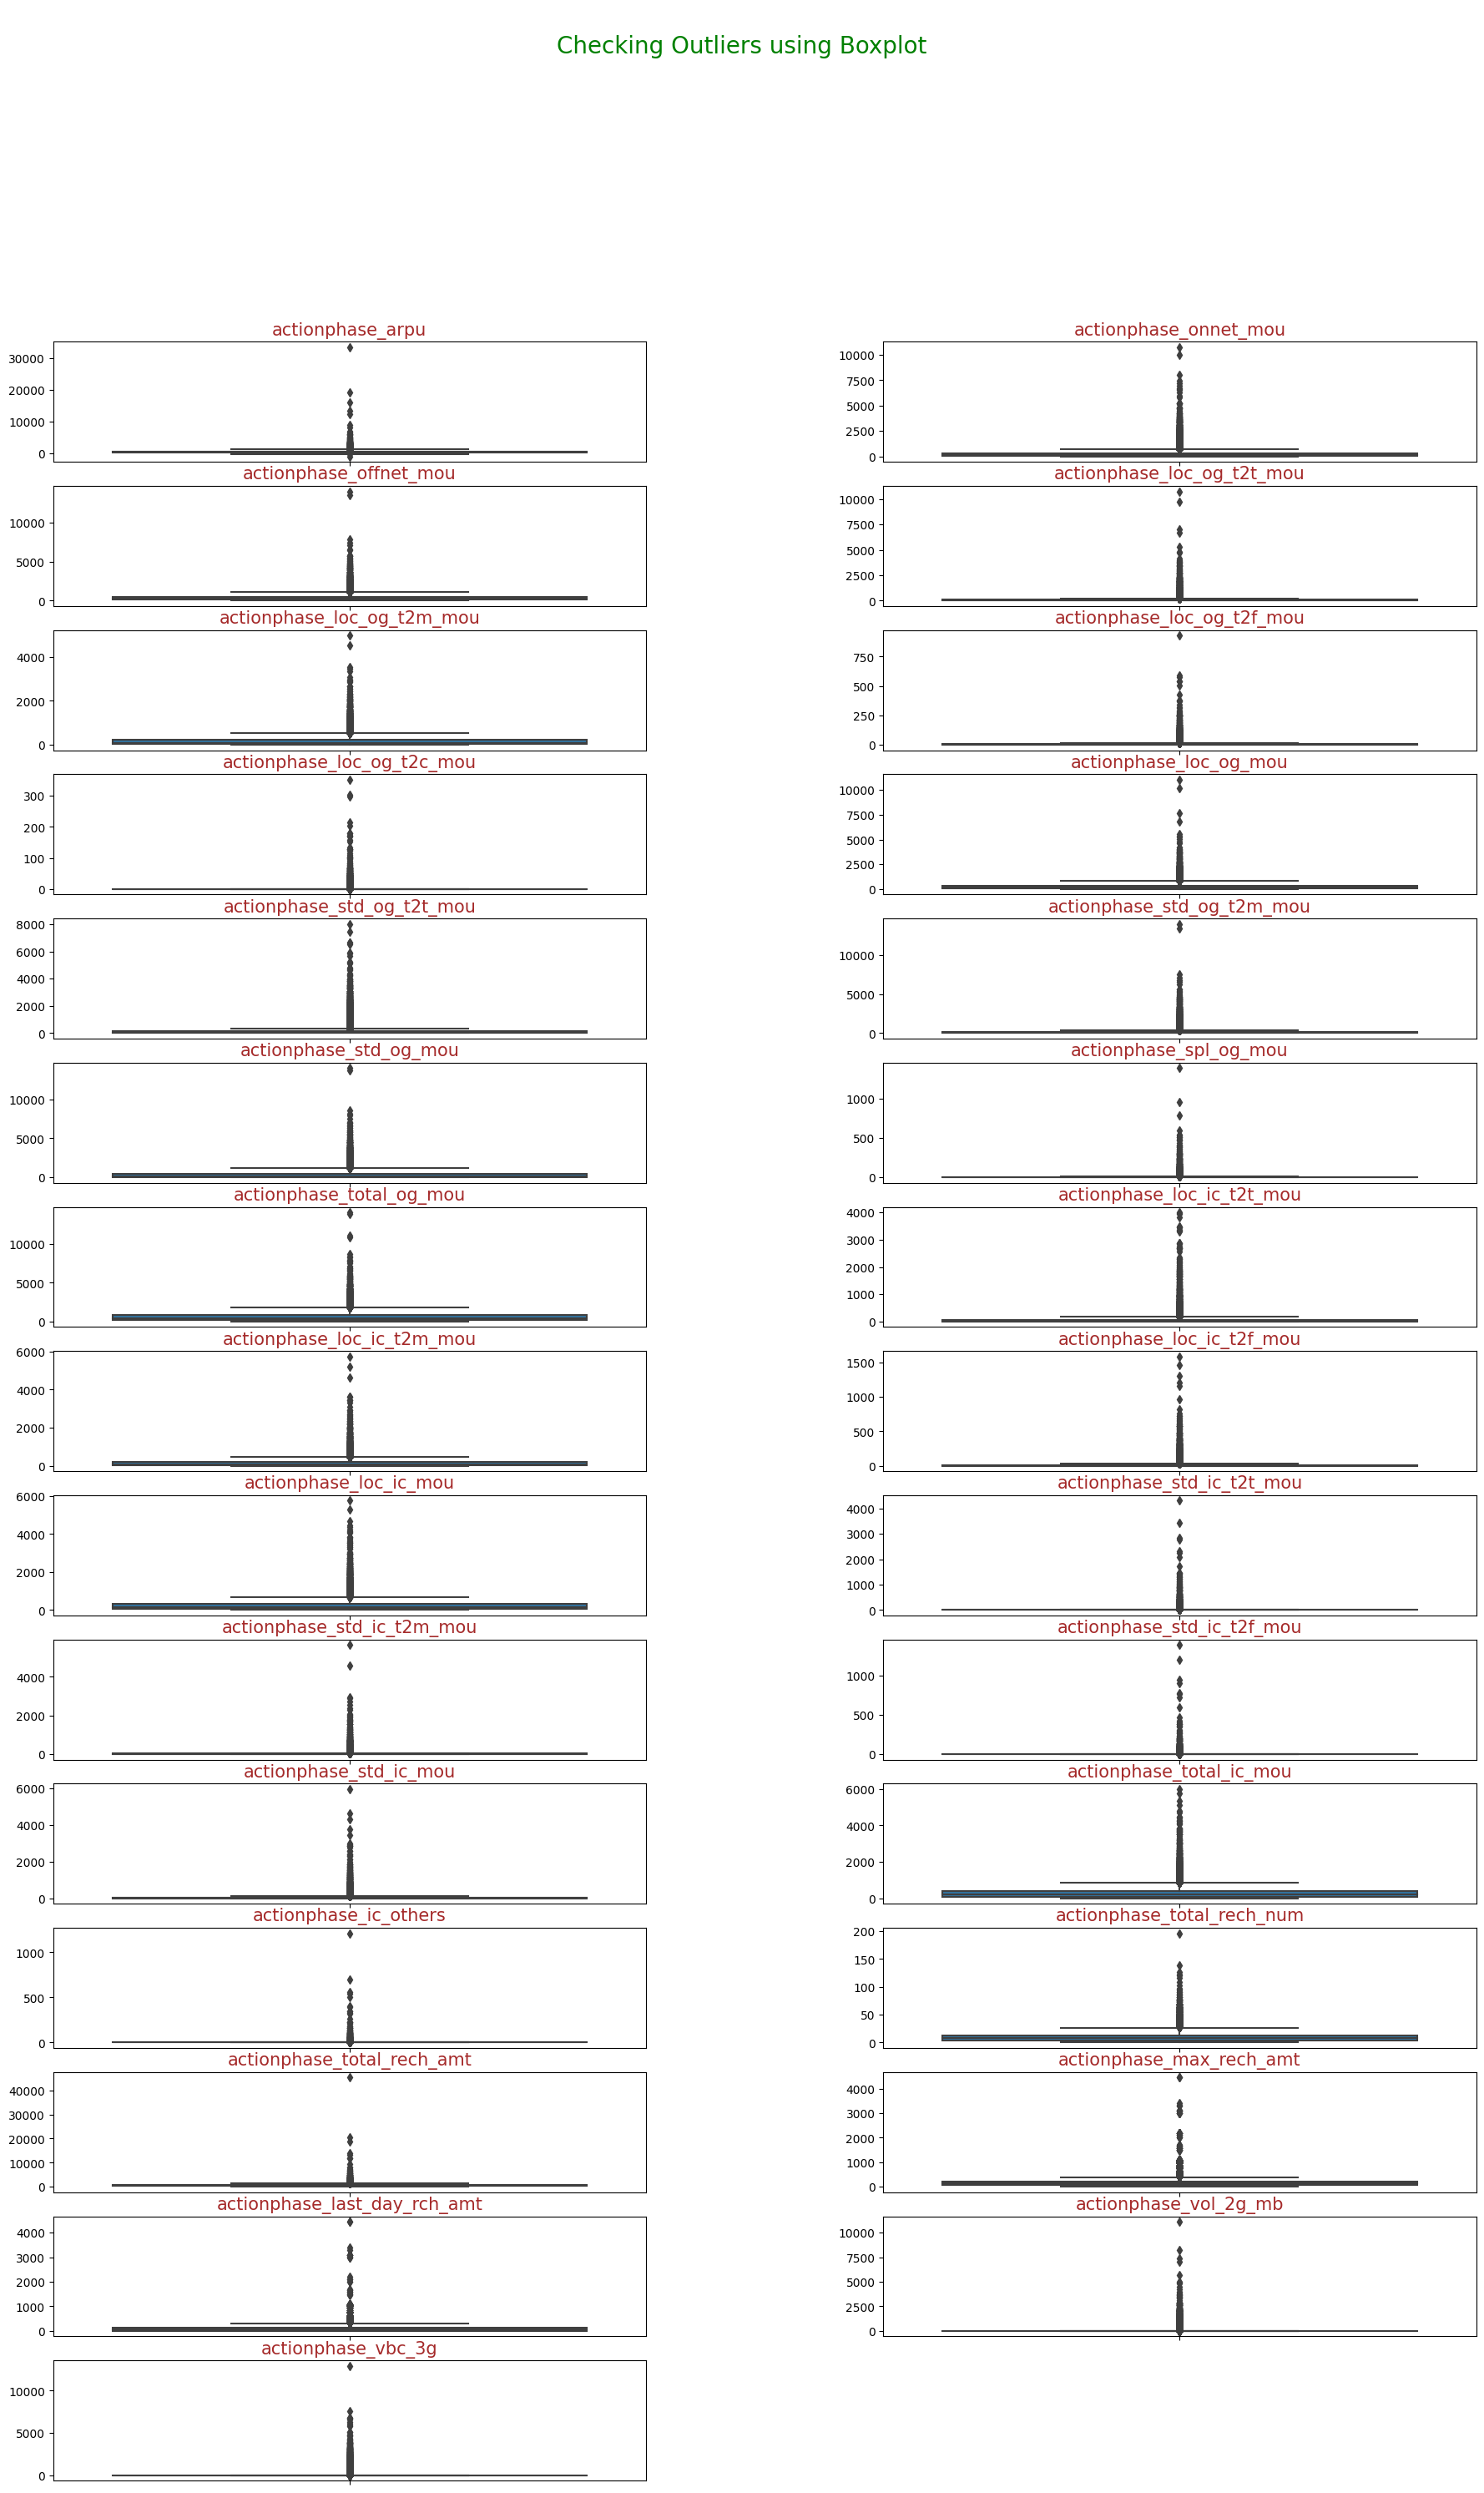

In [57]:
# Checking outliers for action features
action_cols = highvalue_df.filter(regex=r'^(action)').columns

Check_Outliers(highvalue_df,action_cols)

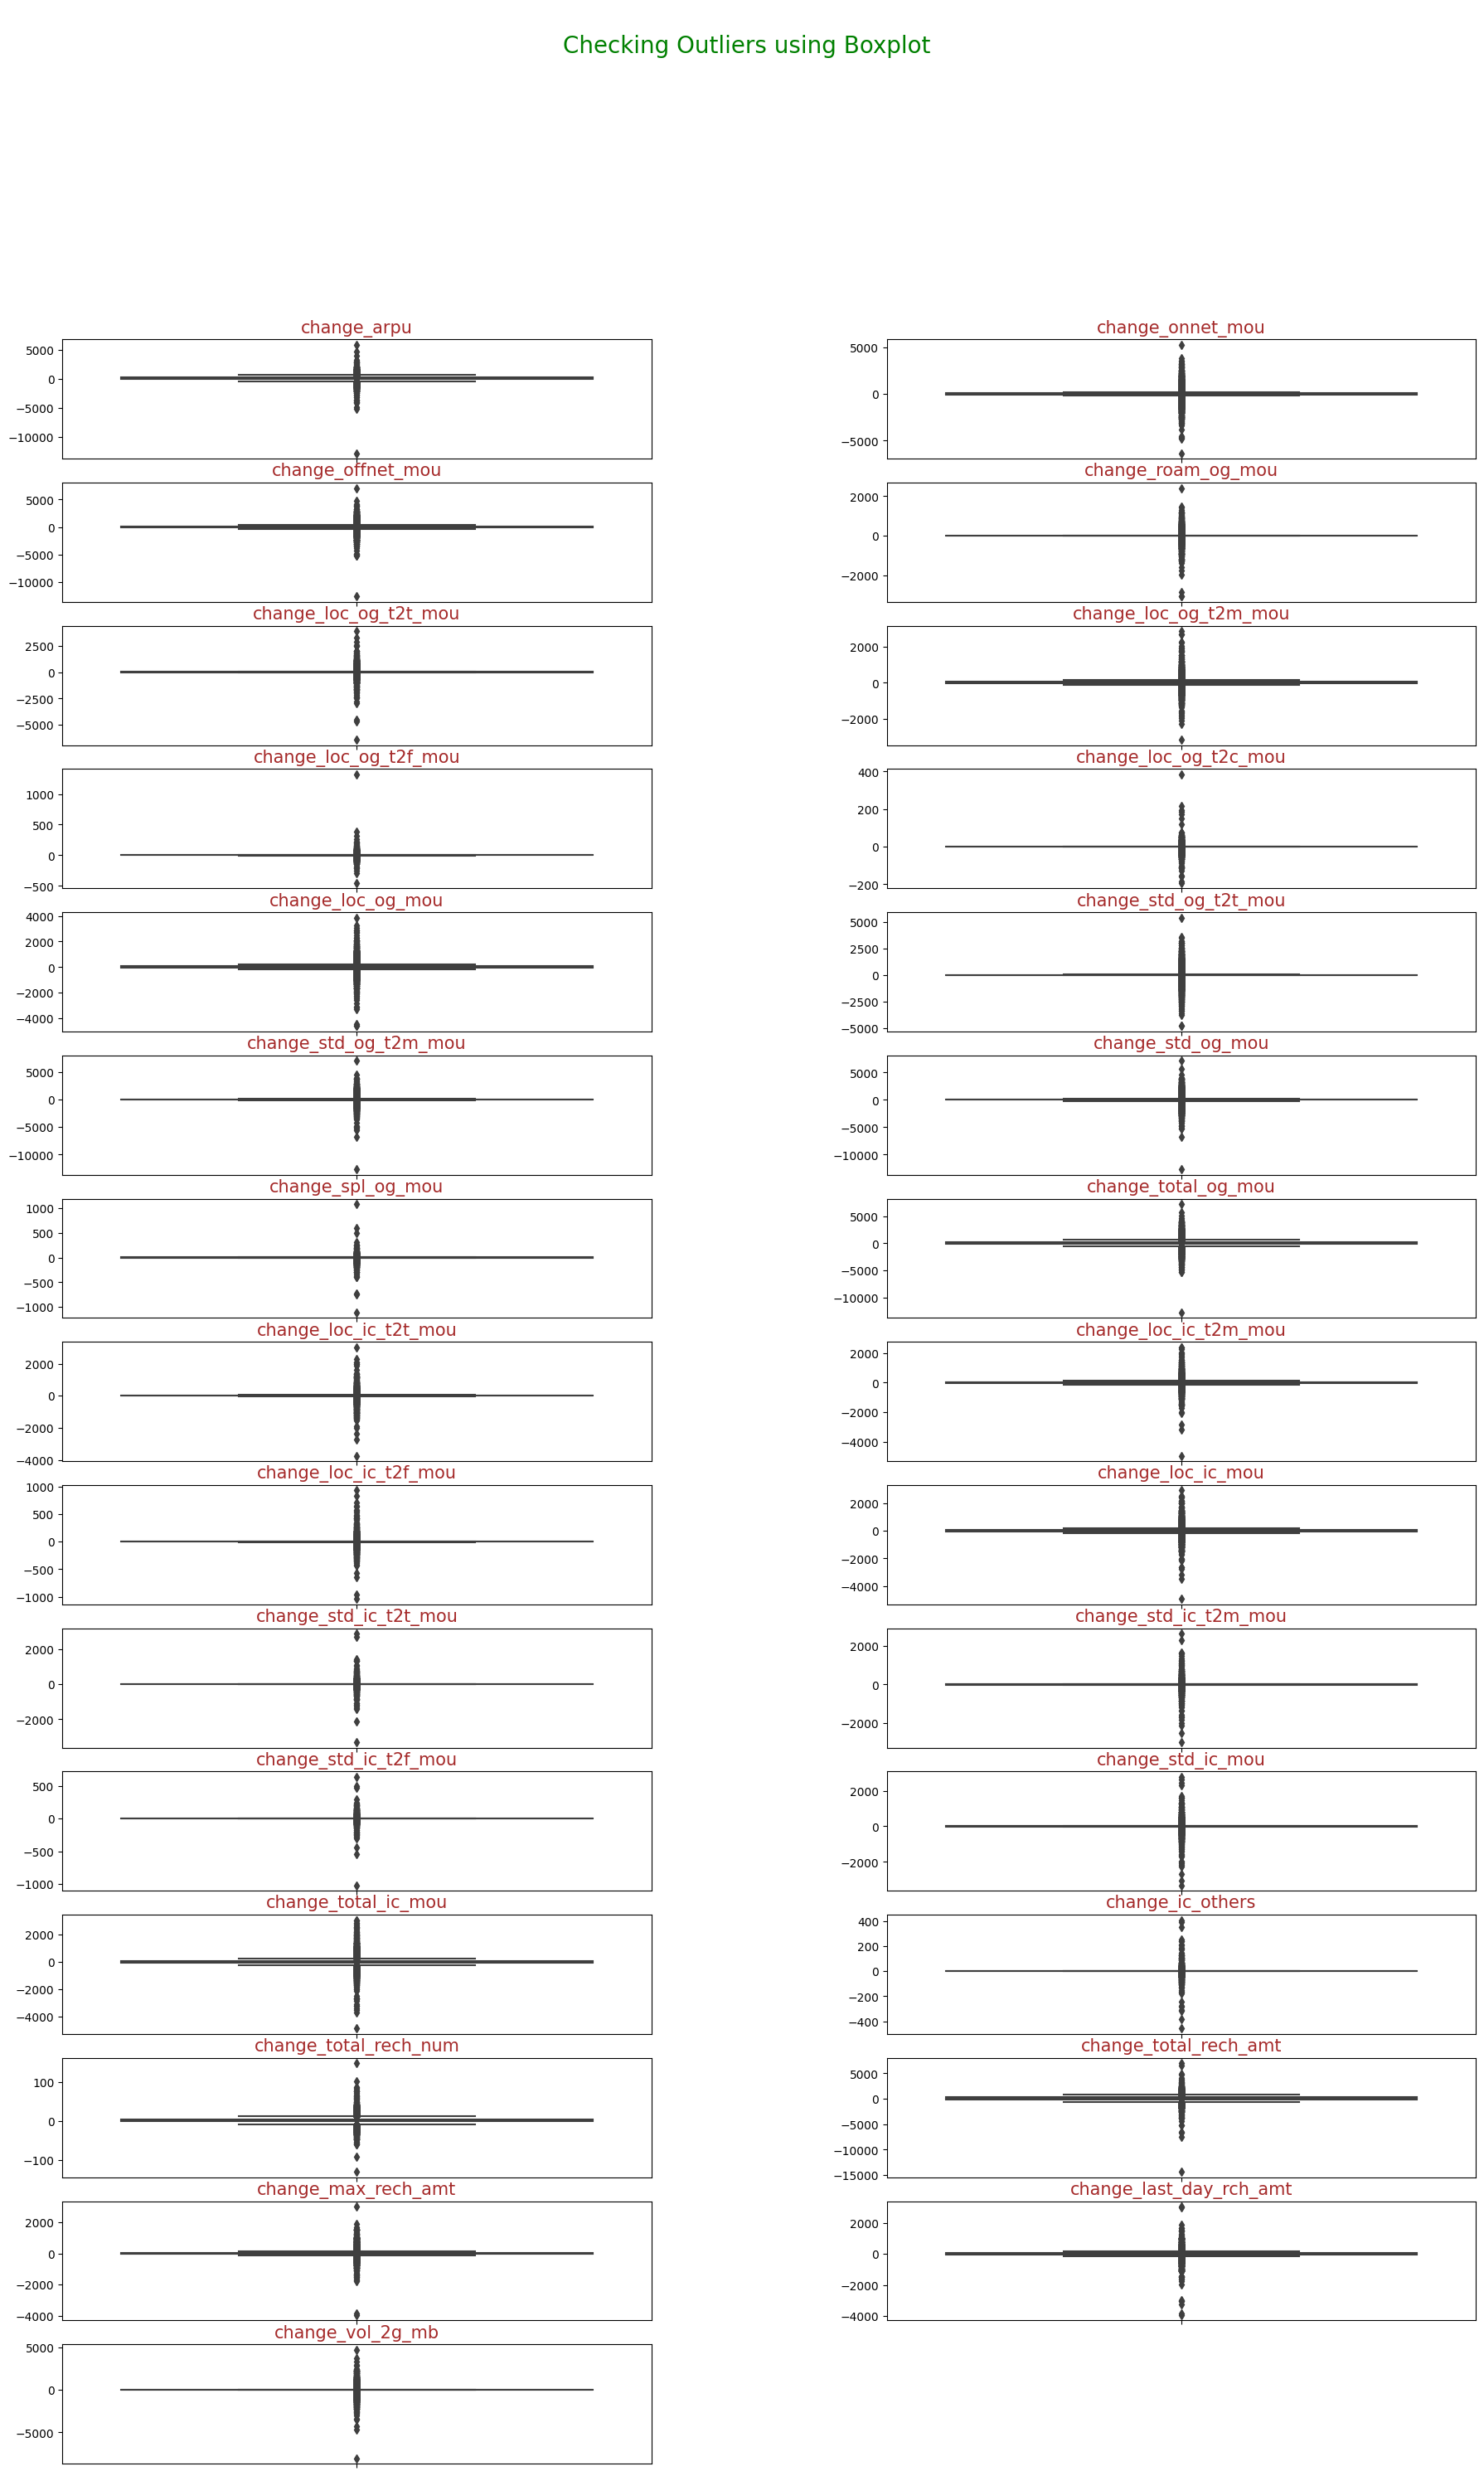

In [58]:
# Checking outliers for change features
change_cols = highvalue_df.filter(regex=r'^(change)').columns

Check_Outliers(highvalue_df,change_cols)

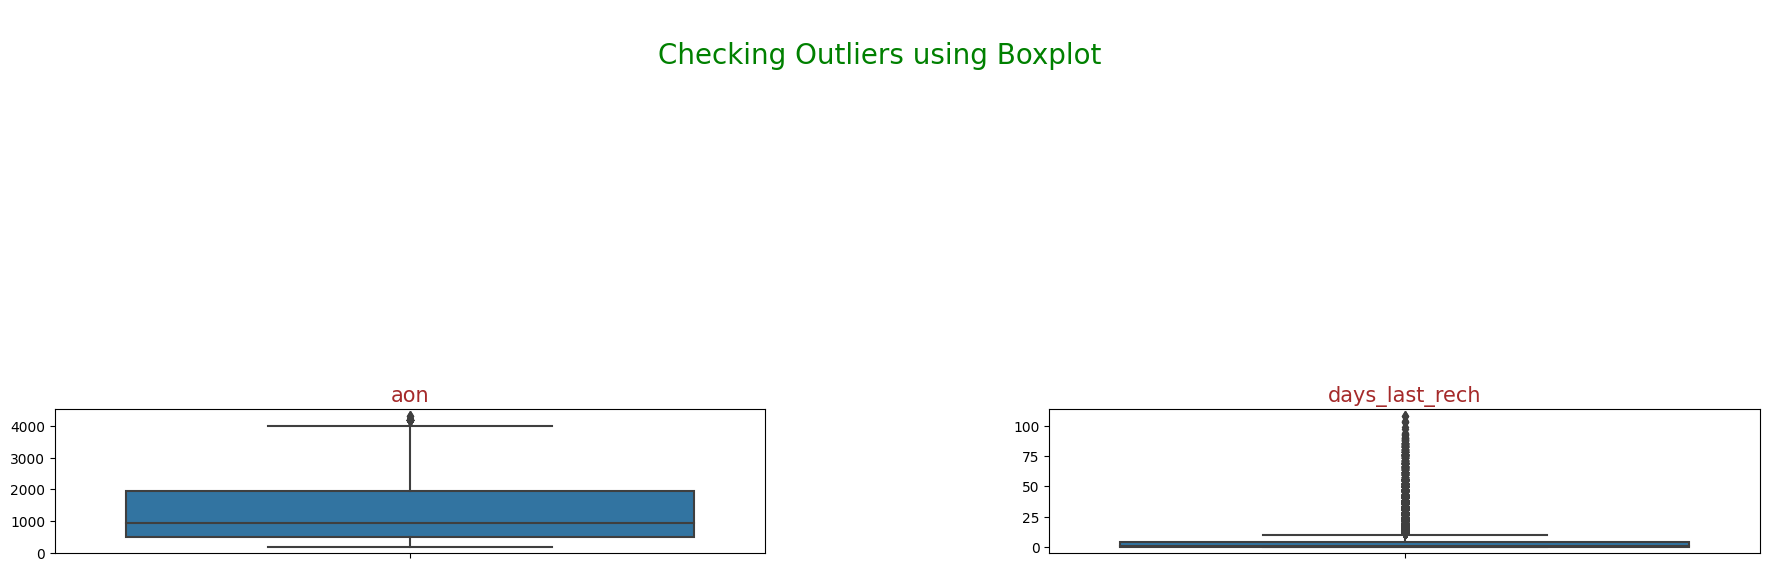

In [59]:
# Checking outliers for rest of the features
rest_cols = ['aon','days_last_rech']
Check_Outliers(highvalue_df,rest_cols)

<font color=navy> **Observation** </font>
-  Except for aon feature which seem to be conitnous based on boxplot rest all need to be taken care of outliers

In [60]:
# function to handle outliers
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [61]:
# handling outliers for all features except aon by calling Outlier_treatment
capping_cols = highvalue_df.filter(regex=r'^(change|action)').columns.values
capping_cols = np.append(capping_cols, 'days_last_rech')
# UDF 
Outlier_treatment(highvalue_df,capping_cols)

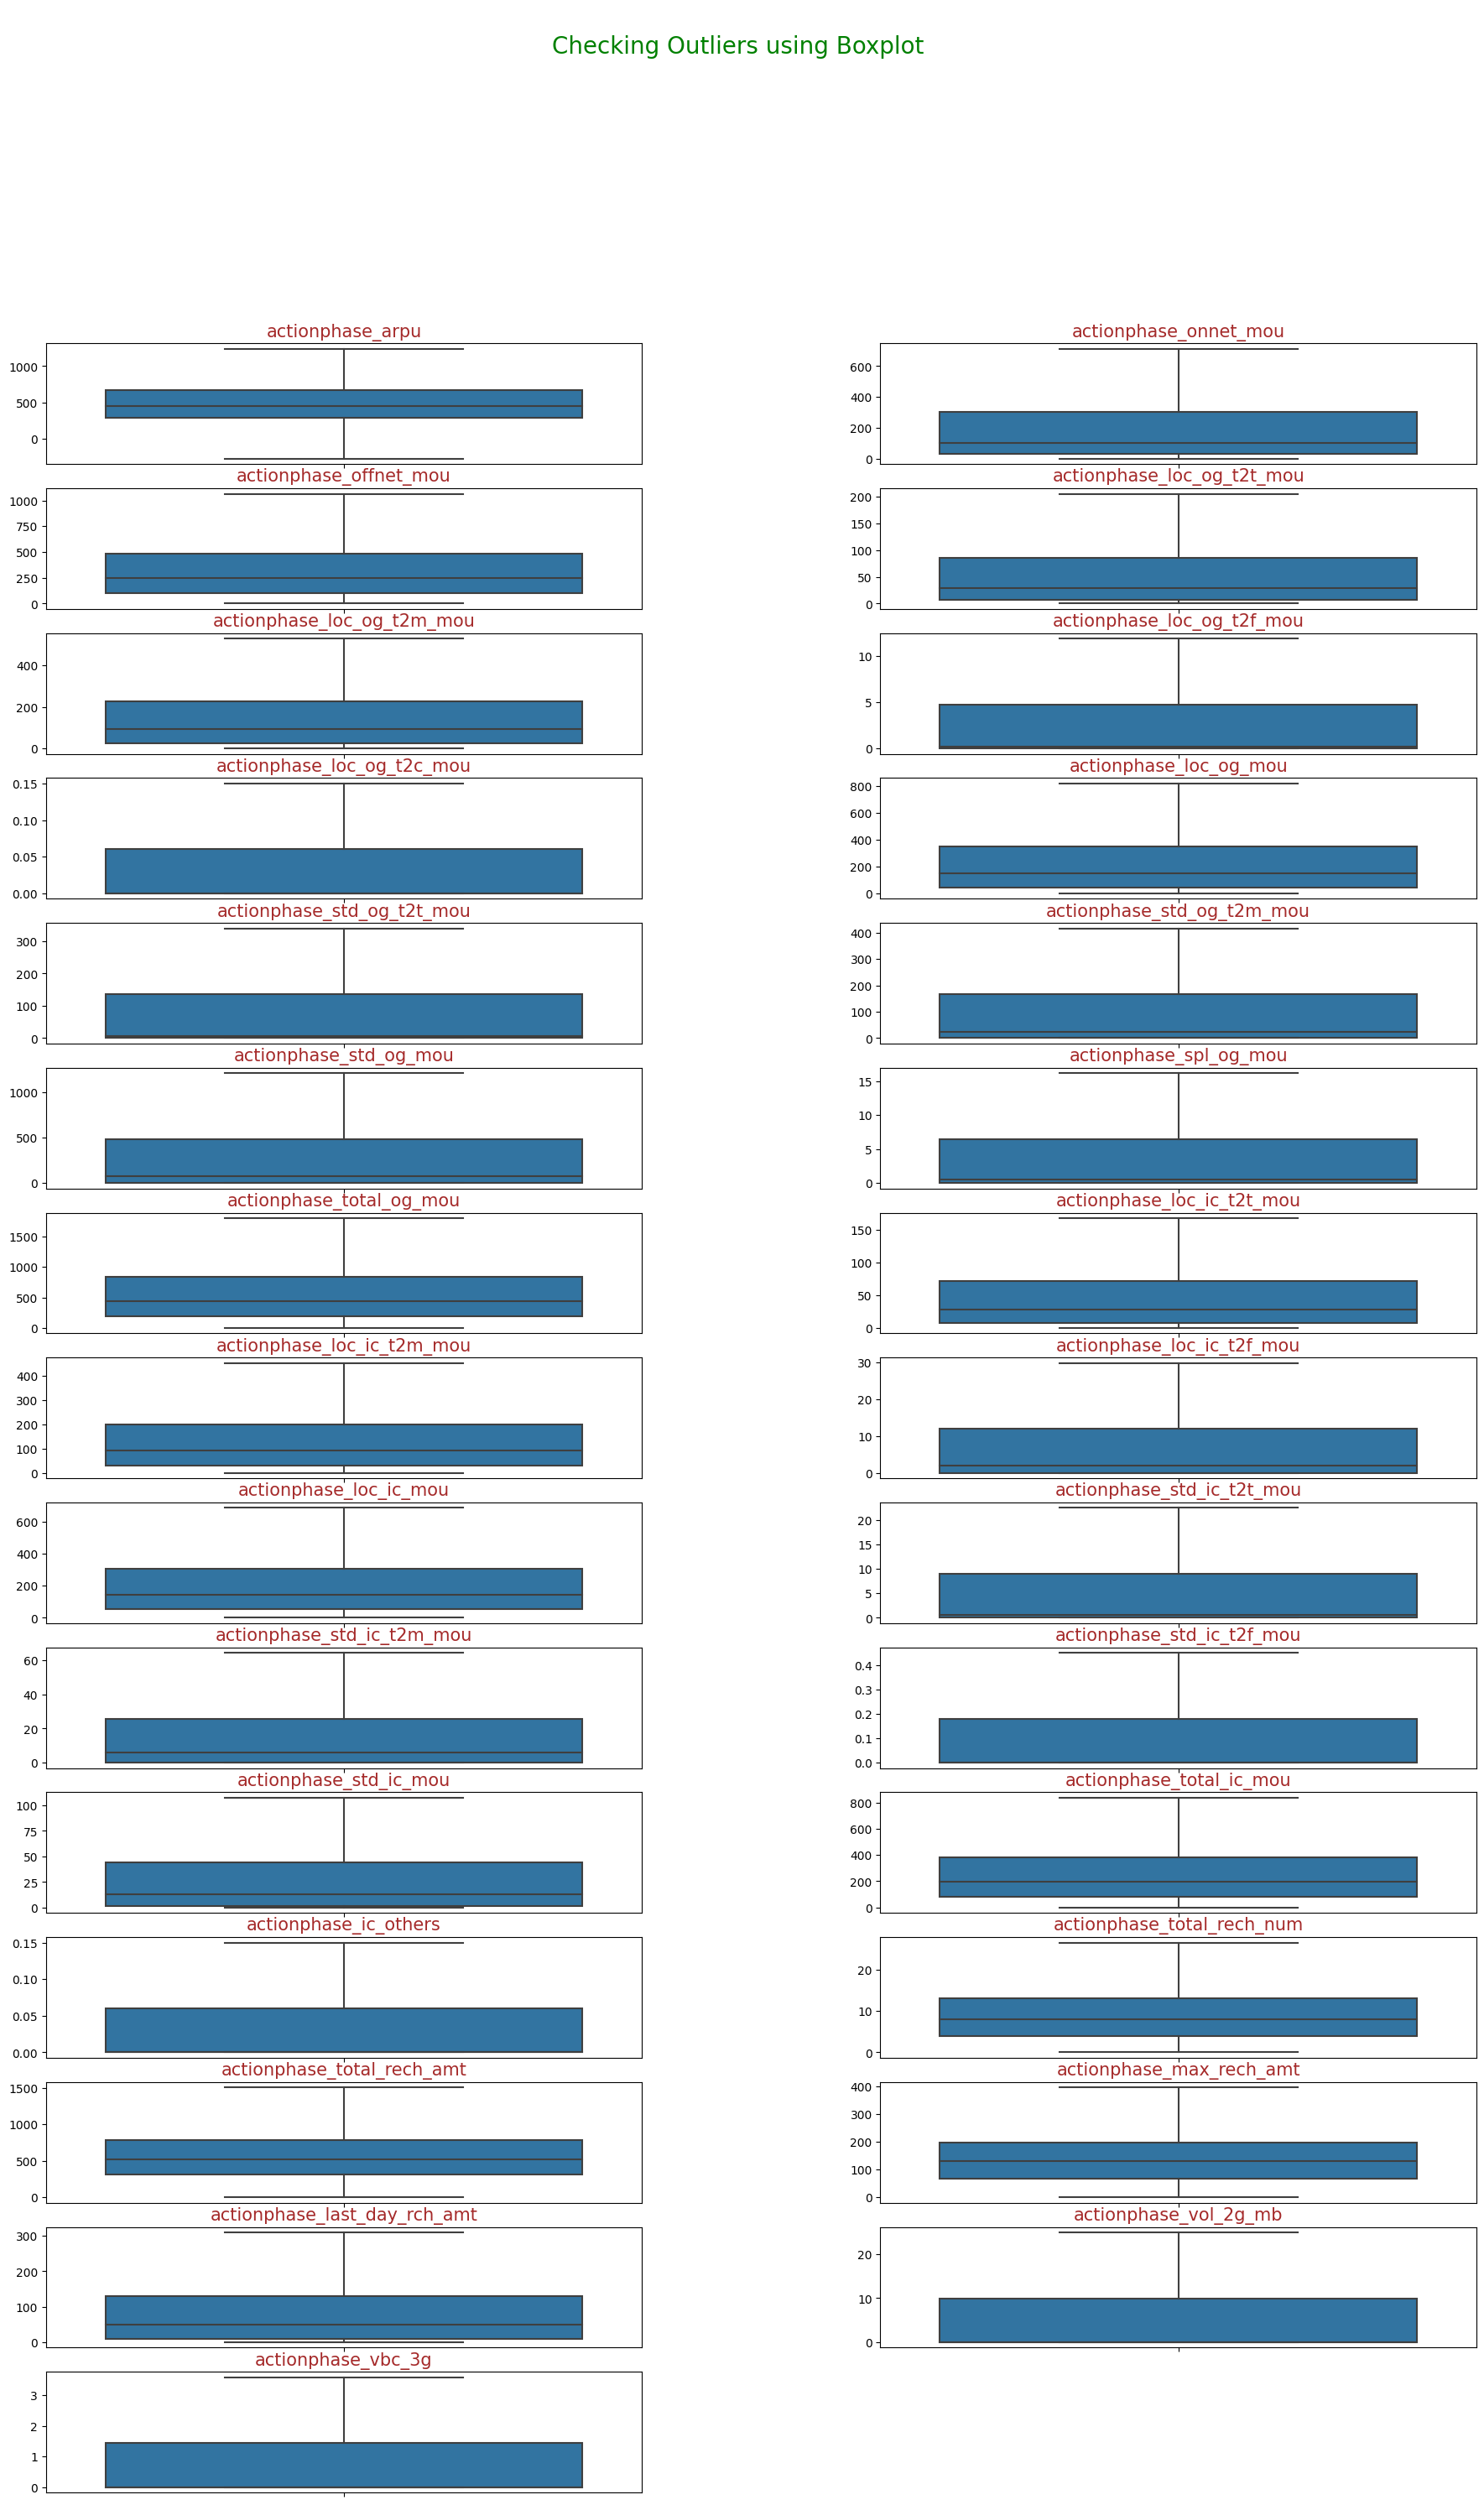

In [62]:
# Checking outliers for action features after handling data
action_cols = highvalue_df.filter(regex=r'^(action)').columns

Check_Outliers(highvalue_df,action_cols)

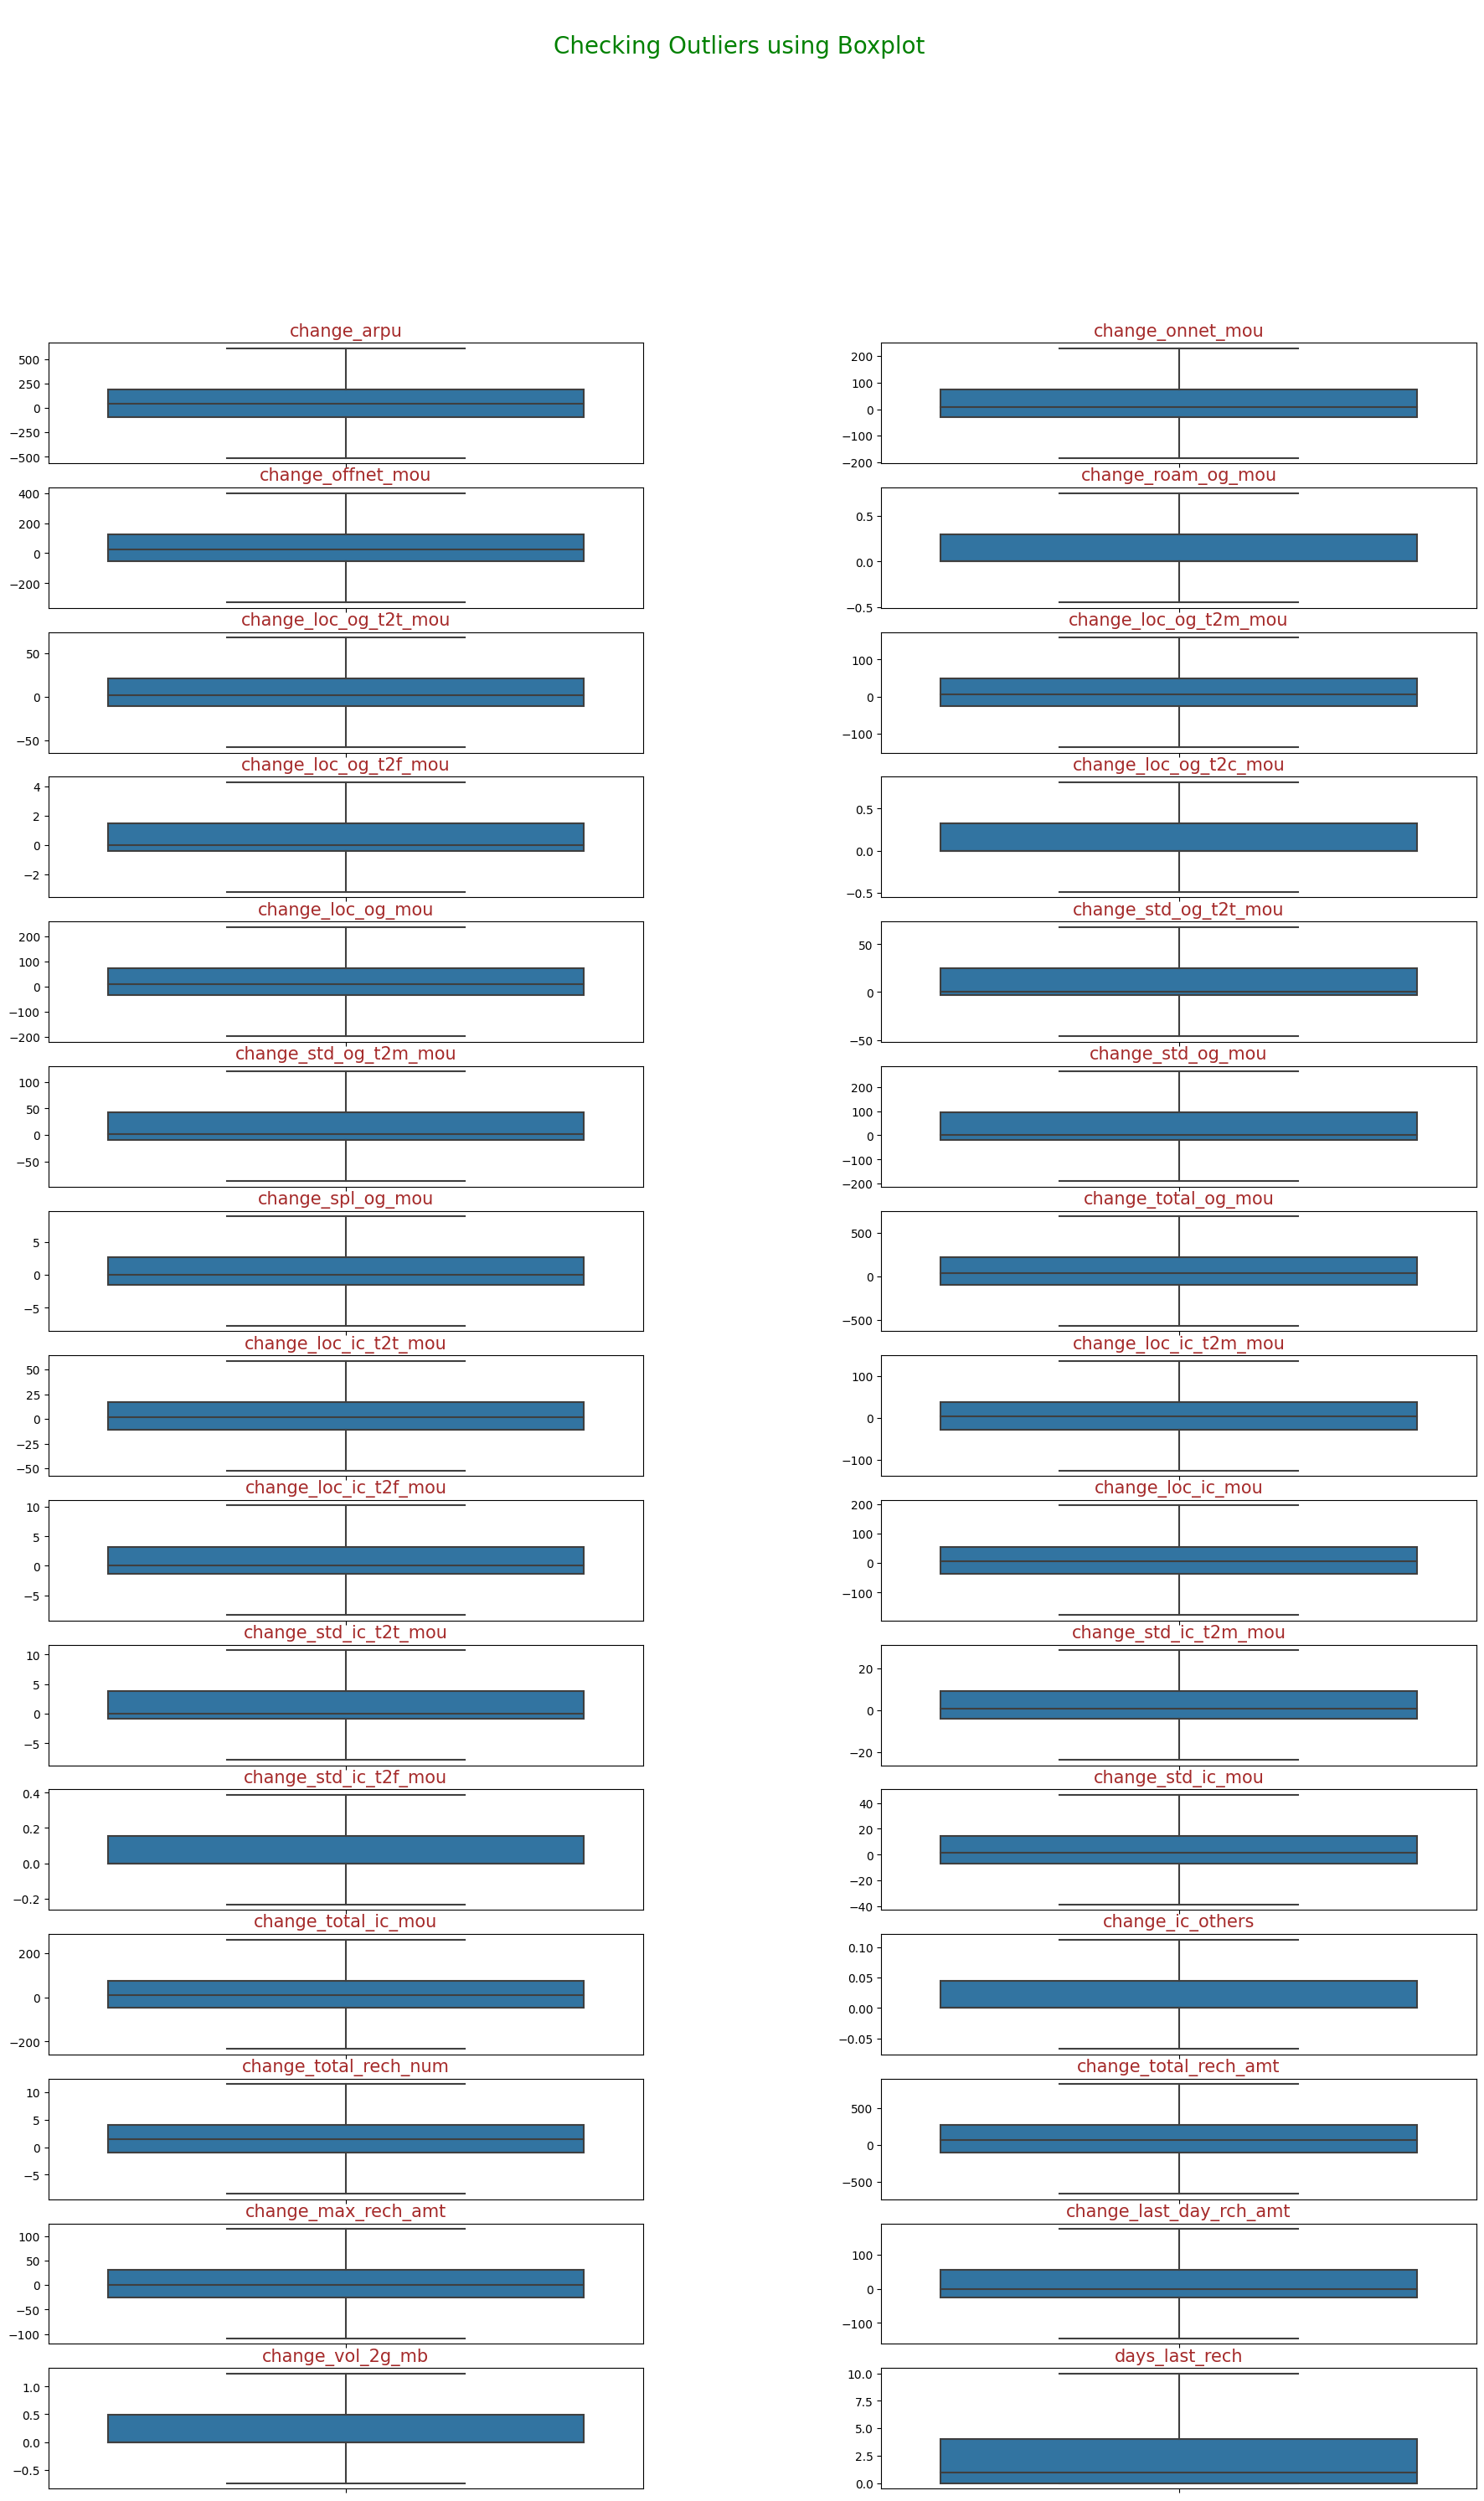

In [63]:
# Checking outliers for change and other features after handling data
change_cols = highvalue_df.filter(regex=r'^(change)').columns.values
change_cols = np.append(change_cols, 'days_last_rech')

Check_Outliers(highvalue_df,change_cols)

<font color=navy> **Observation** </font>
-  Outliers are handled well now

#### <font color=blue> EDA to visualize Data distribution: </font>

In [64]:
# function to create displot for list of columns
def Check_dist(data,columnList):

    n_row = len(columnList)//2

    fig,axes=plt.subplots(n_row,2,figsize=(30, 60))
    for i, col in enumerate(columnList):
        sns.histplot(data=data,x=col,hue='churn',ax=axes[i%n_row][i%2],bins=30,palette=['blue', 'red'],multiple='dodge')
    plt.show()

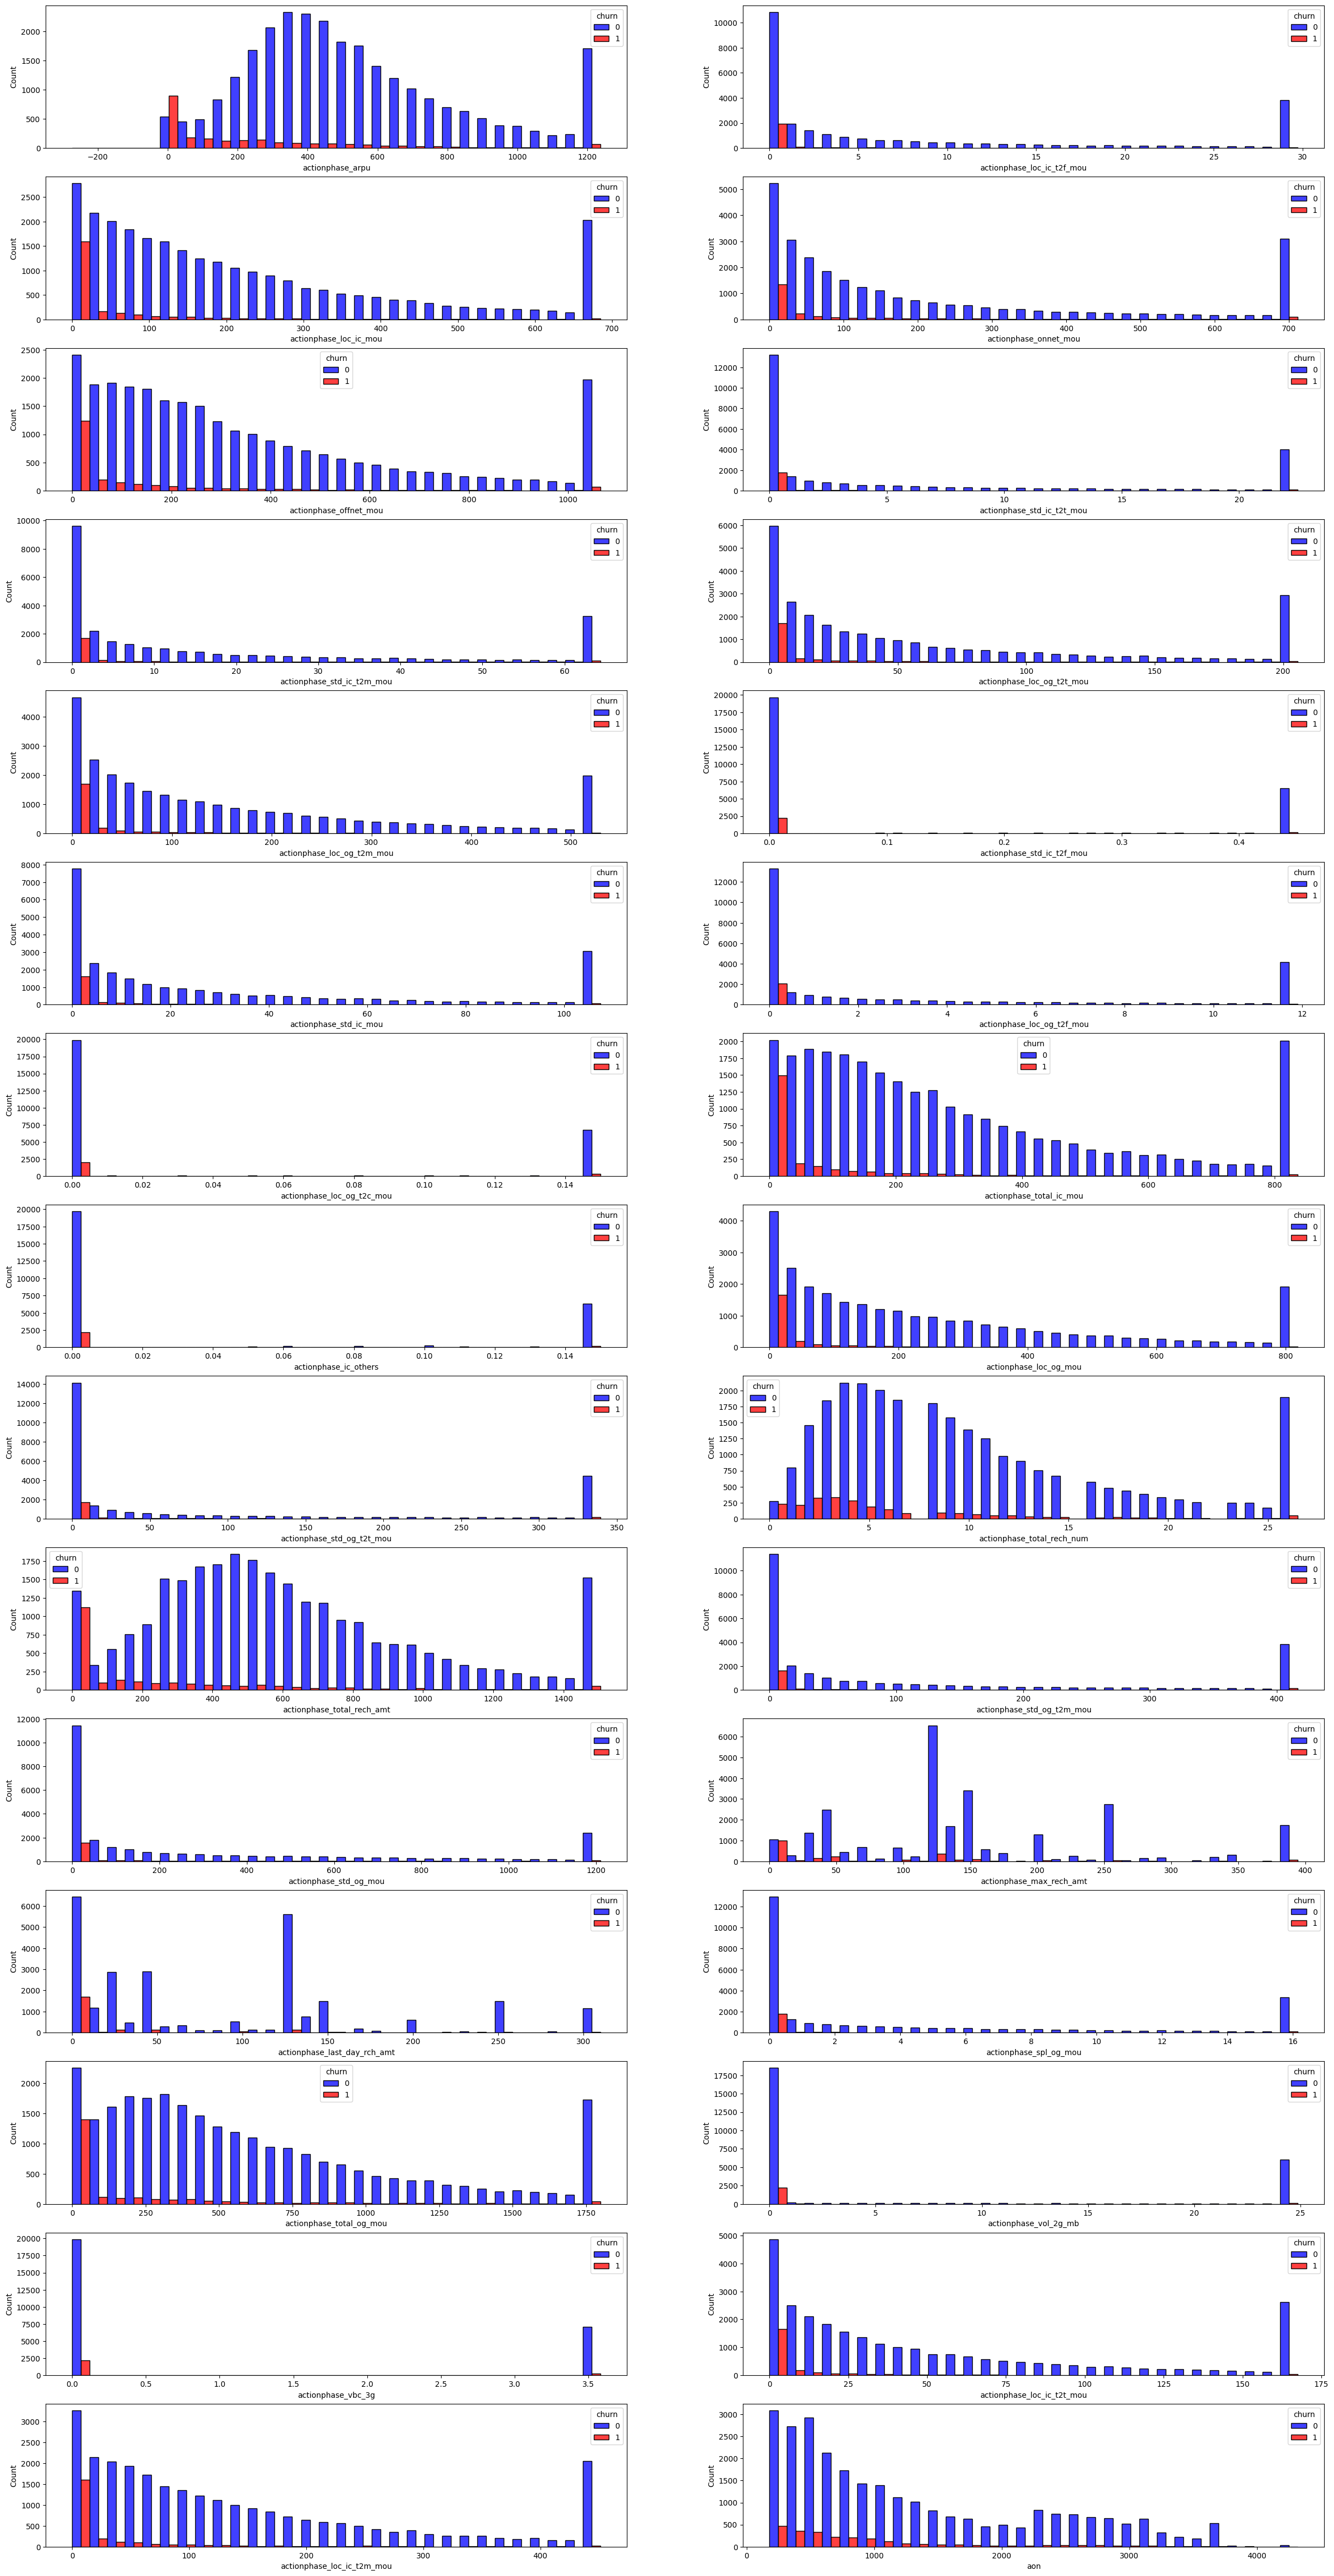

In [65]:
# Checking distribution for action features after handling outliers
action_cols = highvalue_df.filter(regex=r'^(action)').columns.values
action_cols = np.append(action_cols, 'aon')

Check_dist(highvalue_df,action_cols)

<font color=navy> **Observation** </font>
- Most Churned customers are distributed near to zero for almost every action phase columns
- For Average Revenue in action phase there is a significant different between churned and non-churn customers distribution near to 0. Churned customers are generating very less revenue compared to non-churn customers

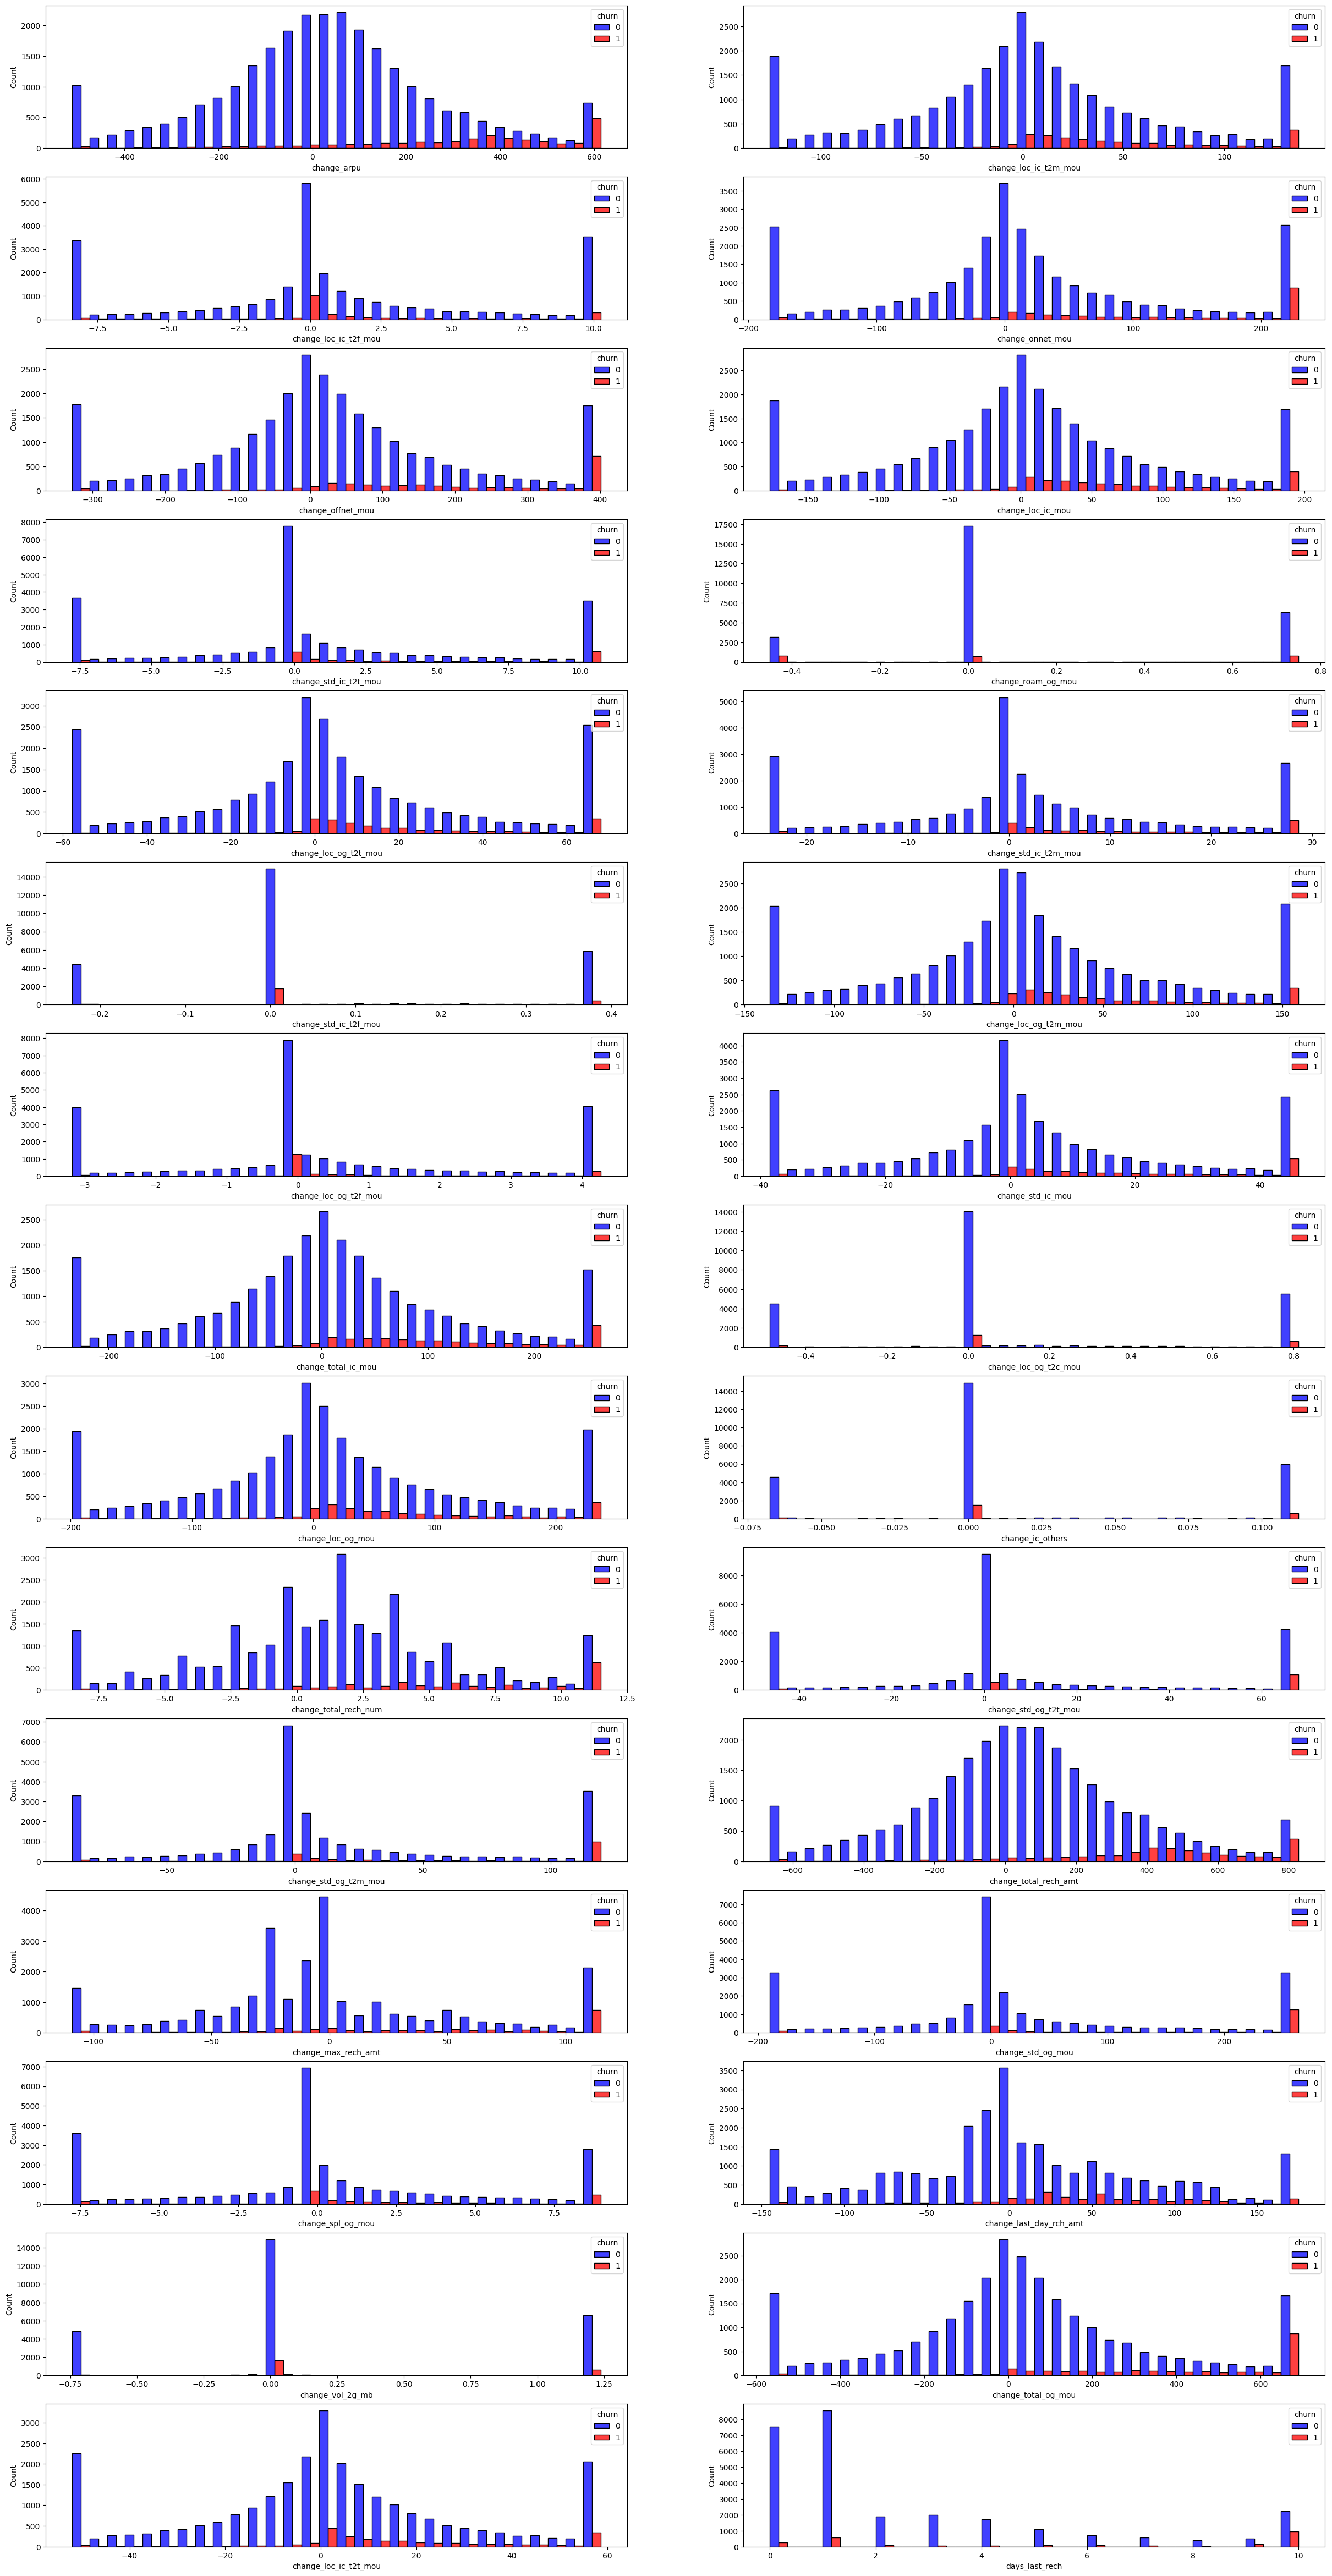

In [66]:
# Checking outliers for change and other features after handling data
change_cols = highvalue_df.filter(regex=r'^(change)').columns.values
change_cols = np.append(change_cols, 'days_last_rech')

Check_dist(highvalue_df,change_cols)

<font color=navy> **Observation** </font>
- Churned customers showing high change compared to non-churn customers, change is distributed at higher end for almost all features for churned customers
-  Non-churn customers not showing any significant pattern from good phase to action phase change. They were distributed on both higher and lower change ends

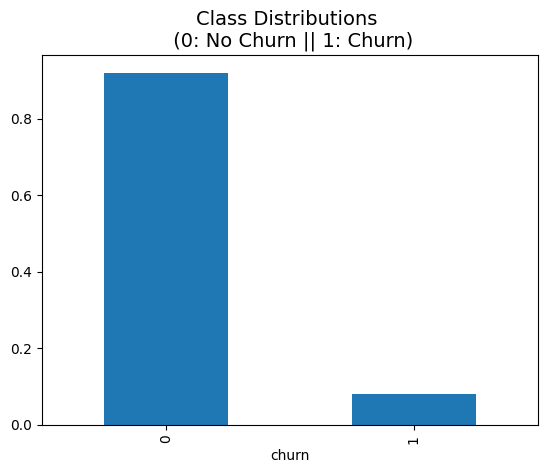

In [67]:
# Checking Target variable distribution using bar plot
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)
highvalue_df['churn'].value_counts(normalize=True).plot.bar()
plt.show()

## <font color=green> Model Building </font>

##### <font color=blue>Test-Train Split of Data</font>

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Feature variable to X
X = highvalue_df.drop(['churn'], axis=1)

X.head()

actionphase_arpu  actionphase_onnet_mou  actionphase_offnet_mou  \
0       1237.765125                  52.29                  325.91   
1        137.362000                  35.08                  136.48   
2        593.260000                 534.24                  482.46   
3        187.894000                  70.61                  162.76   
4         25.499000                   7.79                    5.54   

   actionphase_loc_og_t2t_mou  actionphase_loc_og_t2m_mou  \
0                       40.28                      162.28   
1                       12.49                       50.54   
2                       36.01                      294.46   
3                       67.38                      128.28   
4                        0.00                        0.00   

   actionphase_loc_og_t2f_mou  actionphase_loc_og_t2c_mou  \
0                       11.90                        0.00   
1                        0.00                        0.15   
2                       11.90                        0.15   
3                       10.26                        0.00   
4                        0.00                        0.00   

   actionphase_loc_og_mou  actionphase_std_og_t2t_mou  \
0                  255.79                       12.01   
1                   63.04                       22.58   
2                  353.99                      339.40   
3                  205.93                        3.23   
4                    0.00                        0.00   

   actionphase_std_og_t2m_mou  actionphase_std_og_mou  actionphase_spl_og_mou  \
0                       49.14                   77.84                    6.50   
1                       75.69                   98.28                   10.23   
2                      156.94                  655.18                    4.78   
3                       18.29                   21.53                    5.91   
4                        0.00                    0.00                    0.00   

   actionphase_total_og_mou  actionphase_loc_ic_t2t_mou  \
0                    350.16                       27.31   
1                    171.56                        0.31   
2                   1015.26                       52.58   
3                    233.38                       28.89   
4                      0.00                        0.00   

   actionphase_loc_ic_t2m_mou  actionphase_loc_ic_t2f_mou  \
0                      121.19                      29.725   
1                       15.48                       0.000   
2                      195.18                       7.490   
3                      150.16                      29.725   
4                        0.00                       0.000   

   actionphase_loc_ic_mou  actionphase_std_ic_t2t_mou  \
0                  188.04                       22.50   
1                   15.79                        0.10   
2                  255.26                       22.50   
3                  211.78                        6.33   
4                    0.00                        0.00   

   actionphase_std_ic_t2m_mou  actionphase_std_ic_t2f_mou  \
0                     64.3675                        0.45   
1                      0.6500                        0.00   
2                     64.3675                        0.45   
3                     64.3675                        0.45   
4                      0.0000                        0.00   

   actionphase_std_ic_mou  actionphase_total_ic_mou  actionphase_ic_others  \
0                  107.41                 428.74000                   0.15   
1                    0.75                  16.54000                   0.00   
2                  107.41                 836.75625                   0.15   
3                   82.44                 294.46000                   0.00   
4                    0.00                   0.00000                   0.00   

   actionphase_total_rech_num  actionphase_total_rech_amt  \
0                         7.0                      1505.

In [70]:
# Putting target variable to y
y = highvalue_df['churn']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

In [72]:
#Check the shape of X_train, X_test, y_train and y_test
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (20672, 60) 
y_train: (20672,)
X_test: (8860, 60) 
y_test: (8860,)


In [73]:
#Value count for y_train
y_train.value_counts(normalize = True).reset_index()

churn  proportion
0      0    0.919456
1      1    0.080544

In [74]:
#Value count for y_test
y_test.value_counts(normalize = True).reset_index()

churn  proportion
0      0    0.919413
1      1    0.080587

##### <font color=blue> Feature Scaling using StandardScaler </font>

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [77]:
# X-train dataframe after standard scaling
X_train.head()

actionphase_arpu  actionphase_onnet_mou  actionphase_offnet_mou  \
1724          -0.419963              -0.635751               -0.235592   
22428          0.137054              -0.257560                0.260724   
5042           1.006693              -0.304038                1.131484   
8299          -0.144008              -0.111370               -0.326937   
7664          -0.552805              -0.857552               -0.956476   

       actionphase_loc_og_t2t_mou  actionphase_loc_og_t2m_mou  \
1724                    -0.656005                    0.381665   
22428                   -0.095652                    0.644451   
5042                     0.719749                    0.900514   
8299                    -0.642272                   -0.278947   
7664                    -0.799979                   -0.684384   

       actionphase_loc_og_t2f_mou  actionphase_loc_og_t2c_mou  \
1724                     1.757762                   -0.580347   
22428                    2.036520                   -0.580347   
5042                     2.036520                    1.750331   
8299                    -0.527145                   -0.580347   
7664                    -0.273520                   -0.580347   

       actionphase_loc_og_mou  actionphase_std_og_t2t_mou  \
1724                 0.002810                   -0.349938   
22428                0.479280                   -0.077992   
5042                 0.774994                   -0.644016   
8299                -0.468170                    0.292216   
7664                -0.772826                   -0.670622   

       actionphase_std_og_t2m_mou  actionphase_std_og_mou  \
1724                    -0.553117               -0.569856   
22428                   -0.226225               -0.363751   
5042                     0.006254               -0.219094   
8299                    -0.291469               -0.269025   
7664                    -0.724174               -0.742808   

       actionphase_spl_og_mou  actionphase_total_og_mou  \
1724                -0.703320                 -0.548931   
22428               -0.484588                 -0.156567   
5042                 2.122692                  0.140139   
8299                 0.024619                 -0.529437   
7664                 0.094613                 -1.046762   

       actionphase_loc_ic_t2t_mou  actionphase_loc_ic_t2m_mou  \
1724                    -0.621468                   -0.064232   
22428                    0.376406                    1.577837   
5042                     0.203477                    0.769525   
8299                    -0.559053                   -0.469781   
7664                    -0.712514                   -0.364761   

       actionphase_loc_ic_t2f_mou  actionphase_loc_ic_mou  \
1724                    -0.548040               -0.326815   
22428                    2.091314                1.314035   
5042                     2.091314                0.788416   
8299                    -0.617309               -0.582840   
7664                    -0.729279               -0.559248   

       actionphase_std_ic_t2t_mou  actionphase_std_ic_t2m_mou  \
1724                     2.055410                   -0.738396   
22428                   -0.657693                    2.185030   
5042                    -0.090685                    2.185030   
8299                    -0.663790                   -0.144423   
7664                    -0.688177                   -0.767292   

       actionphase_std_ic_t2f_mou  actionphase_std_ic_mou  \
1724                    -0.578351               -0.055145   
22428                    1.791329                1.392654   
5042                     1.791329                2.217947   
8299                    -0.578351               -0.430175   
7664                    -0.578351               -0.819912   

       actionphase_total_ic_mou  actionphase_ic_others  \
1724                  -0.399043              -0.580266   
22428                  1.179025              -0.580266   
5

##### <font color=blue> Handling Class Imbalance using SMOTE </font>

In [78]:
# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38014

In [79]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19007), (1, 19007)]


##### <font color=blue> PCA on resampled train data </font>


In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(svd_solver='randomized',random_state=42)

In [82]:
pca.fit(X_resampled_smt)

PCA(random_state=42, svd_solver='randomized')

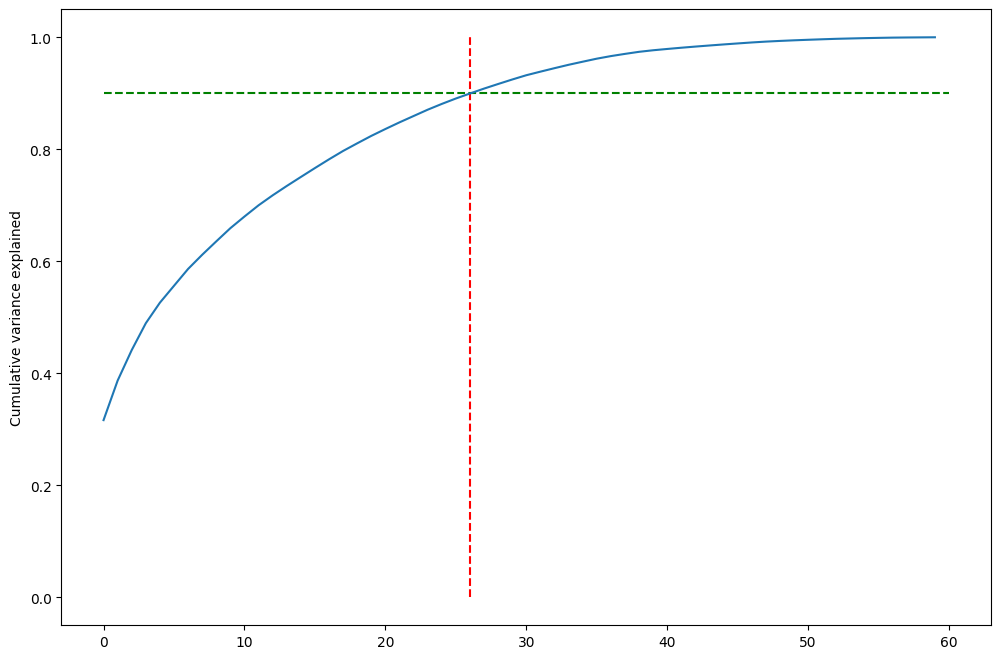

In [83]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=26, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

<font color=navy> **Observation** </font>
-  Based on cumulative variance curve, number of features can be fixed to 26

##### <font color=blue> Incremental PCA on train data with selected number of Components </font>

In [84]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=26)

In [85]:
df_train_pca = pca_final.fit_transform(X_resampled_smt)
df_train_pca.shape

(38014, 26)

In [86]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(26, 26)

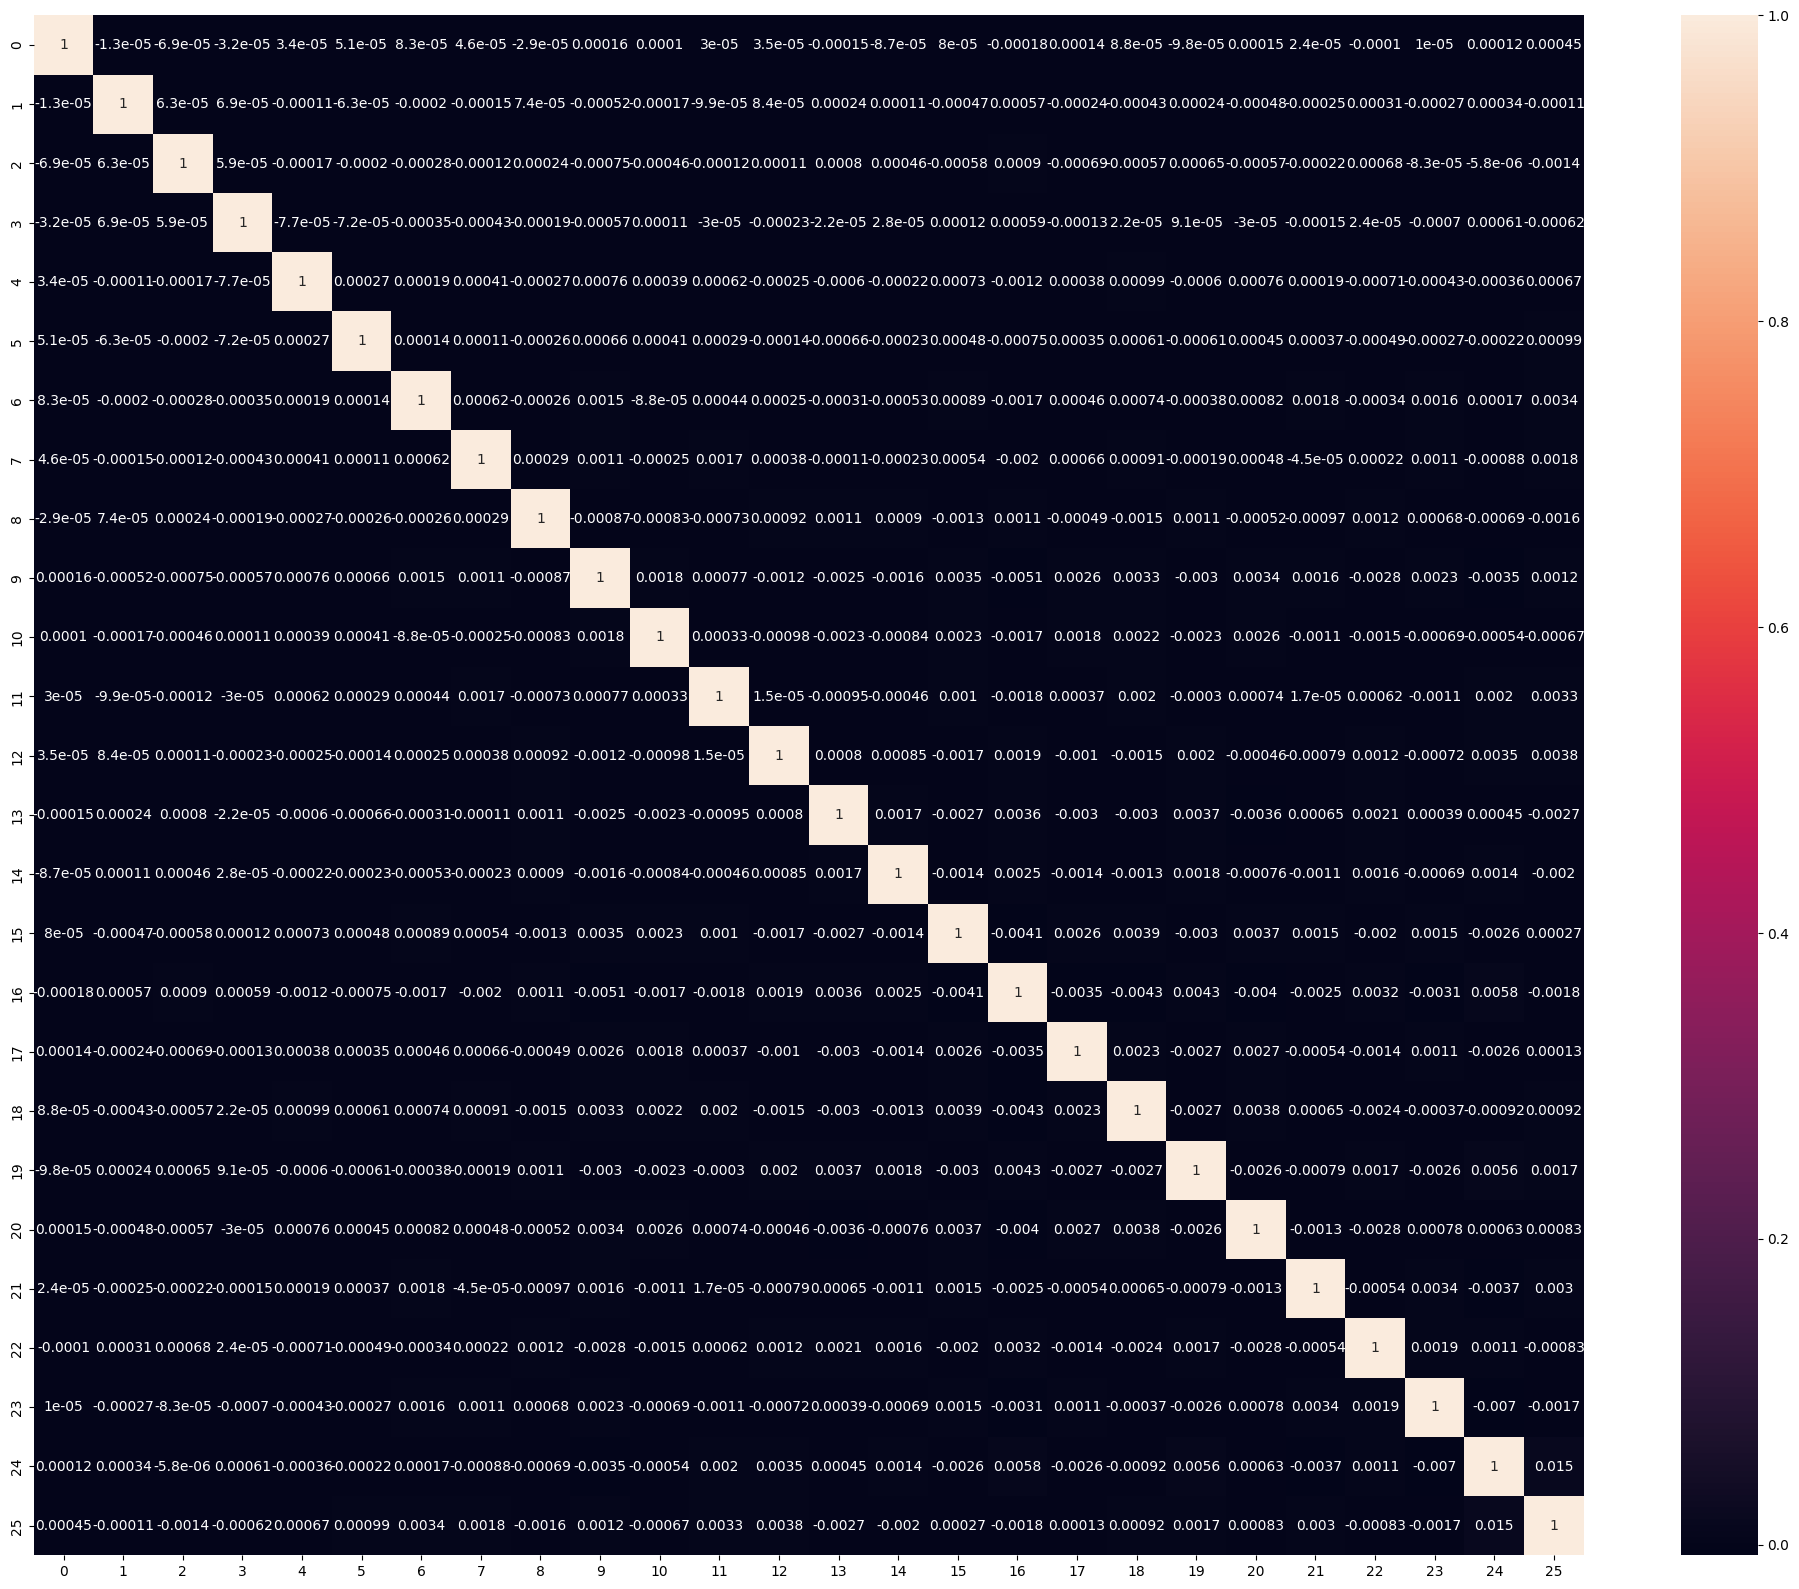

In [87]:
plt.figure(figsize=[25,20])
sns.heatmap(corrmat, annot=True)
plt.show()

##### <font color=blue> Building Logistic Regression on PCA data </font>

In [88]:
learner_pca = LogisticRegression(random_state=100)

In [89]:
model_pca = learner_pca.fit(df_train_pca, y_resampled_smt)

In [90]:
y_train_pred_smt = learner_pca.predict(df_train_pca)

In [91]:
y_train_pred_smt

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
y_train_proba = learner_pca.predict_proba(df_train_pca)

##### <font color=blue> Evaluating Train Data </font>

In [93]:
# ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_resampled_smt, y_train_proba[:,1], drop_intermediate = False )

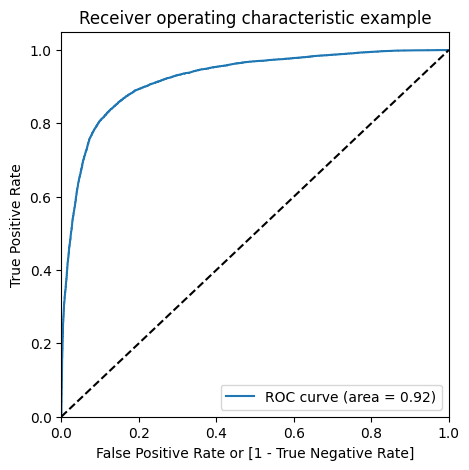

In [95]:
draw_roc(y_resampled_smt, y_train_proba[:,1])

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [97]:
confusion = confusion_matrix(y_resampled_smt, y_train_pred_smt)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity = TP / float(TP+FN)
Specificity = TN / float(TN+FP)

print ('Accuracy: ', accuracy_score(y_resampled_smt, y_train_pred_smt))
print ('Sensitivity: ',Sensitivity)
print ('Specificity: ',Specificity)
print ('\n confussion matrix:\n',confusion)

Accuracy:  0.8540800757615615
Sensitivity:  0.8625769453359289
Specificity:  0.8455832061871942

 confussion matrix:
 [[16072  2935]
 [ 2612 16395]]


<font color=navy> **Observation** </font>
-  Accuracy of Train data is 85.40%
-  Sensitivity is 86.25%
-  Specificity is 84.55%
-  Area under ROC curve (AUC) is 0.92 

All the metrics came out well for Train Data when PCA is used

### <font color=green> Making Predictions on Test Data </font>

##### <font color=blue> Scaling Test data using transform </font>

In [98]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [99]:
X_test.head()

actionphase_arpu  actionphase_onnet_mou  actionphase_offnet_mou  \
19621          0.342490               1.968076                1.260880   
24266         -0.278798               2.093523               -0.799468   
21224          2.342285               2.186774                2.387143   
6986           1.593552               0.699020                2.387143   
6482           0.343899              -0.063386               -0.038701   

       actionphase_loc_og_t2t_mou  actionphase_loc_og_t2m_mou  \
19621                    0.171923                   -0.697895   
24266                    2.239516                   -0.425594   
21224                    2.239516                    0.215355   
6986                     2.239516                    2.411231   
6482                     0.607619                    0.798520   

       actionphase_loc_og_t2f_mou  actionphase_loc_og_t2c_mou  \
19621                   -0.682518                   -0.580347   
24266                    0.948905                   -0.580347   
21224                   -0.682518                   -0.580347   
6986                    -0.200403                   -0.580347   
6482                     2.036520                   -0.580347   

       actionphase_loc_og_mou  actionphase_std_og_t2t_mou  \
19621               -0.521324                    1.993115   
24266                2.257391                   -0.644644   
21224                1.156136                    1.993115   
6986                 2.434471                    0.502788   
6482                 0.639780                    0.045620   

       actionphase_std_og_t2m_mou  actionphase_std_og_mou  \
19621                    2.069037                2.319050   
24266                   -0.711903               -0.729800   
21224                    2.069037                2.319050   
6986                     2.069037                0.950621   
6482                    -0.559822               -0.449797   

       actionphase_spl_og_mou  actionphase_total_og_mou  \
19621                0.890796                  1.606339   
24266               -0.703320                  0.403644   
21224               -0.703320                  2.428492   
6986                -0.703320                  1.953708   
6482                 0.981788                 -0.130787   

       actionphase_loc_ic_t2t_mou  actionphase_loc_ic_t2m_mou  \
19621                   -0.046564                   -0.739519   
24266                    2.278245                    1.386844   
21224                    2.278245                    1.297107   
6986                     2.278245                    2.376155   
6482                     2.278245                    2.376155   

       actionphase_loc_ic_t2f_mou  actionphase_loc_ic_mou  \
19621                   -0.729279               -0.633567   
24266                    0.179763                1.533999   
21224                   -0.655265                2.367940   
6986                     2.091314                2.367940   
6482                     2.091314                2.367940   

       actionphase_std_ic_t2t_mou  actionphase_std_ic_t2m_mou  \
19621                    0.678739                    0.206457   
24266                    1.406704                   -0.767292   
21224                    2.055410                    2.185030   
6986                     2.055410                    2.185030   
6482                     0.329998                   -0.020124   

       actionphase_std_ic_t2f_mou  actionphase_std_ic_mou  \
19621                   -0.578351                0.097583   
24266                   -0.578351               -0.334013   
21224                   -0.578351                2.217947   
6986                     1.791329                2.217947   
6482                     1.791329               -0.054579   

       actionphase_total_ic_mou  actionphase_ic_others  \
19621                 -0.631924              -0.580266   
24266                  1.110905               1.803307   
2

##### <font color=blue> Applying PCA on Test Data </font>

In [100]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8860, 26)

##### <font color=blue> Predicting Test Data using logistic regression </font>

In [101]:
y_pred_test = model_pca.predict(df_test_pca)

In [102]:
y_test_proba  = model_pca.predict_proba(df_test_pca)

##### <font color=blue> Evalution Metrics on Test Data </font>

In [103]:
confusion = confusion_matrix(y_test, y_pred_test)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity = TP / float(TP+FN)
Specificity = TN / float(TN+FP)

print ('Accuracy: ', accuracy_score(y_test, y_pred_test))
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print ('\n confussion matrix:\n',confusion)

Accuracy:  0.8459367945823928
Sensitivity:  0.8053221288515406
Specificity:  0.8494966854898109

 confussion matrix:
 [[6920 1226]
 [ 139  575]]


In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_proba[:,1], drop_intermediate = False )

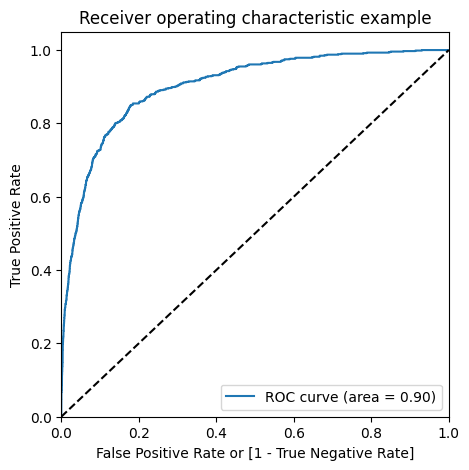

In [105]:
draw_roc(y_test, y_test_proba[:,1])

<font color=navy> **Observation** </font>
-  Accuracy of Test data is 84.59%
-  Sensitivity is 80.53%
-  Specificity is 84.94%
-  AUC ROC is 0.90

All the metrics came out well for Test Data as well when PCA is used

## <font color=green> Random Forest Classification </font>

In [106]:
from sklearn.ensemble import RandomForestClassifier

##### <font color=blue> Handling Class Imbalance using ADASYN </font>

In [107]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38140

In [108]:
# checking churn data distribution in resampled data
print(sorted(Counter(y_resampled_ada).items()))

[(0, 19007), (1, 19133)]


<font color=navy> **Observation** </font>
-  Resampled data distributed churn and no no churn customers equally

<font color=blue> Hyperparameter tuning for Random Forest Classifier using Randomized Search CV </font>

In [109]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [110]:
 # importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
seed = np.random.seed(22)

In [111]:
# setting hyper parameters in a dictionary
hyper_params = {'max_depth': range(5, 20),
                'max_features': range(5, 20),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

GridSearchCV could take longer time to do hyperparameter tuning for the model while trying a fit as dataset is huge hence going with RandomizedSearchCV to derive good fit hyper parameters

In [112]:
# setting RandomizedSearchCV to find best fit parameters

model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              random_state=42,
                              n_jobs=-1,
                              n_iter=50)

In [113]:
# Running RandomizedSearchCV on resampled data to find best fit parameters
model_rcv.fit(X_resampled_ada, y_resampled_ada )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 20),
                                        'max_features': range(5, 20),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   random_state=42, return_train_score=True, verbose=1)

In [114]:
# checking best score of train data
model_rcv.best_score_

0.9163607760880964

In [115]:
# retrieving best model
rcv_best = model_rcv.best_estimator_

In [116]:
rcv_best

RandomForestClassifier(max_depth=11, max_features=19, min_samples_leaf=20,
                       n_estimators=30, n_jobs=-1, random_state=42)

<font color=navy> **Observation** </font>
-  max_depth = 11, max_features=19, min_samples_leaf=20, n_estimators=30 parameters is giving best score for Random Forest Classification model

In [117]:
y_train_pred = rcv_best.predict(X_resampled_ada)

In [118]:
y_train_proba = rcv_best.predict_proba(X_resampled_ada)

#### <font color=blue> Evaluation on Train Data </font>

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_resampled_ada, y_train_proba[:,1], drop_intermediate = False )

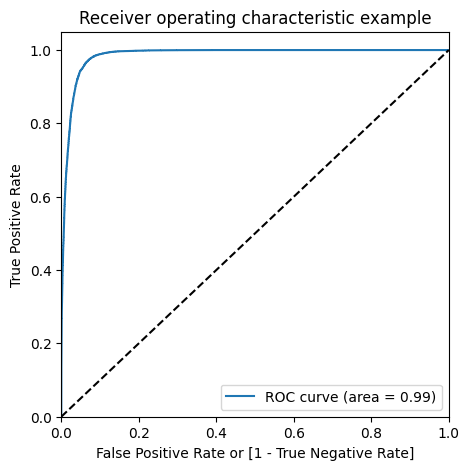

In [120]:
draw_roc(y_resampled_ada, y_train_proba[:,1])

In [121]:
confusion = confusion_matrix(y_resampled_ada, y_train_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity = TP / float(TP+FN)
Specificity = TN / float(TN+FP)

print ('Accuracy: ', accuracy_score(y_resampled_ada, y_train_pred))
print ('Sensitivity: ',Sensitivity)
print ('Specificity: ',Specificity)
print ('\n confussion matrix:\n',confusion)

Accuracy:  0.9510487676979549
Sensitivity:  0.9666022056133382
Specificity:  0.9353922239175041

 confussion matrix:
 [[17779  1228]
 [  639 18494]]


<font color=navy> **Observation** </font>
-  Accuracy of model is 95.10% 
-  Sensitivity is 96.66%
-  Specificity is 93.54%
-  AUC ROC is 0.99

All metrics came out good for Train data using Random Forest Classification

#### <font color=blue> Evaluation on Test Data </font>

In [122]:
# model predtiction on unseen test data
y_test_pred = rcv_best.predict(X_test)

In [123]:

y_test_proba = rcv_best.predict_proba(X_test)

#### <font color=blue> Evaluation metrics on Test Data </font>

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_proba[:,1], drop_intermediate = False )

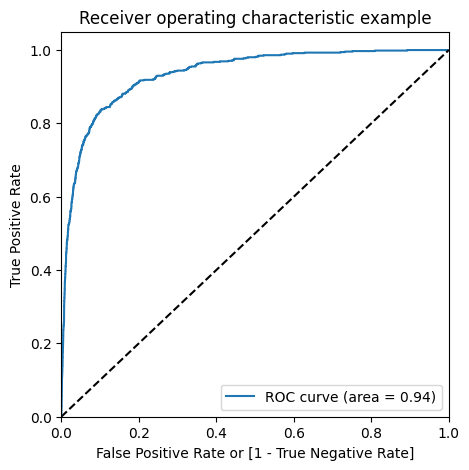

In [125]:
draw_roc(y_test, y_test_proba[:,1])

In [126]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity = TP / float(TP+FN)
Specificity = TN / float(TN+FP)

print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('Sensitivity:', Sensitivity)
print ('Specificity:', Specificity)
print ('\n confussion matrix:\n',confusion)

Accuracy:  0.9156884875846502
Sensitivity: 0.7871148459383753
Specificity: 0.926958016204272

 confussion matrix:
 [[7551  595]
 [ 152  562]]


<font color=navy> **Observation** </font>
-  Accuracy of model is 91.57% 
-  Sensitivity is 78.71%
-  Specificity is 92.69%
-  AUC ROC curve is 0.94

Although there is a significant drop in Test data when compared to Train data, This model is still decent in accuracy and predicting Churn customers

#### <font color=green> Fetching Feature importance based on Random Forest Classifier </font>

In [127]:
rcv_best.feature_importances_

array([0.00464141, 0.00280977, 0.00161549, 0.00315727, 0.01820821,
       0.00533019, 0.00235674, 0.05167028, 0.00632822, 0.00244677,
       0.00873702, 0.00506828, 0.01083996, 0.00956931, 0.02061474,
       0.00390217, 0.12753548, 0.00233808, 0.00241303, 0.00605138,
       0.00600324, 0.10435609, 0.00776123, 0.00579906, 0.00472151,
       0.00626398, 0.04587127, 0.02731122, 0.00479379, 0.00597328,
       0.12292141, 0.00671624, 0.00260314, 0.00454814, 0.17287381,
       0.00390911, 0.00263311, 0.00362047, 0.00260377, 0.00368389,
       0.00427644, 0.00243138, 0.00418508, 0.00220261, 0.03197592,
       0.00259438, 0.00444548, 0.00237195, 0.00684026, 0.00213065,
       0.00251113, 0.00452088, 0.00268875, 0.00703595, 0.00539474,
       0.00637979, 0.03181444, 0.00509716, 0.01456246, 0.01593899])

In [128]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_ada.columns,
    "Imp": rcv_best.feature_importances_
})

In [129]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
34            change_roam_og_mou  0.172874
16        actionphase_loc_ic_mou  0.127535
30                days_last_rech  0.122921
21      actionphase_total_ic_mou  0.104356
7         actionphase_loc_og_mou  0.051670
26  actionphase_last_day_rch_amt  0.045871
44           change_total_og_mou  0.031976
56         change_total_rech_amt  0.031814
27         actionphase_vol_2g_mb  0.027311
14    actionphase_loc_ic_t2m_mou  0.020615
4     actionphase_loc_og_t2m_mou  0.018208
59              change_vol_2g_mb  0.015939
58       change_last_day_rch_amt  0.014562
12      actionphase_total_og_mou  0.010840
13    actionphase_loc_ic_t2t_mou  0.009569
10        actionphase_std_og_mou  0.008737
22         actionphase_ic_others  0.007761
53           change_total_ic_mou  0.007036
48             change_loc_ic_mou  0.006840
31                   change_arpu  0.006716
55         change_total_rech_num  0.006380
8     actionphase_std_og_t2t_mou  0.006328
25      actionphase_max_rech_amt  0.006264
19    actionphase_std_ic_t2f_mou  0.006051
20        actionphase_std_ic_mou  0.006003
29            actionphase_vbc_3g  0.005973
23    actionphase_total_rech_num  0.005799
54              change_ic_others  0.005395
5     actionphase_loc_og_t2f_mou  0.005330
57           change_max_rech_amt  0.005097
11        actionphase_spl_og_mou  0.005068
28                           aon  0.004794
24    actionphase_total_rech_amt  0.004722
0               actionphase_arpu  0.004641
33             change_offnet_mou  0.004548
51         change_std_ic_t2f_mou  0.004521
46         change_loc_ic_t2m_mou  0.004445
40         change_std_og_t2t_mou  0.004276
42             change_std_og_mou  0.004185
35         change_loc_og_t2t_mou  0.003909
15    actionphase_loc_ic_t2f_mou  0.003902
39             change_loc_og_mou  0.003684
37         change_loc_og_t2f_mou  0.003620
3     actionphase_loc_og_t2t_mou  0.003157
1          actionphase_onnet_mou  0.002810
52             change_std_ic_mou  0.002689
36         change_loc_og_t2m_mou  0.002633
38         change_loc_og_t2c_mou  0.002604
32              change_onnet_mou  0.002603
45         change_loc_ic_t2t_mou  0.002594
50         change_std_ic_t2m_mou  0.002511
9     actionphase_std_og_t2m_mou  0.002447
41         change_std_og_t2m_mou  0.002431
18    actionphase_std_ic_t2m_mou  0.002413
47         change_loc_ic_t2f_mou  0.002372
6     actionphase_loc_og_t2c_mou  0.002357
17    actionphase_std_ic_t2t_mou  0.002338
43             change_spl_og_mou  0.002203
49         change_std_ic_t2t_mou  0.002131
2         actionphase_offnet_mou  0.001615

<font color=navy> **Observation** </font> <br>
Below are top 5 features which are important in identifying churn customers based on Random Forest Classification Model:
-  change_roam_og_mou
-  actionphase_loc_ic_mou
-  days_last_rech
-  actionphase_total_ic_mou
-  actionphase_loc_og_mou

## <font color=green> Logistic Regression </font>

##### <font color=blue> Handling correlation </font>

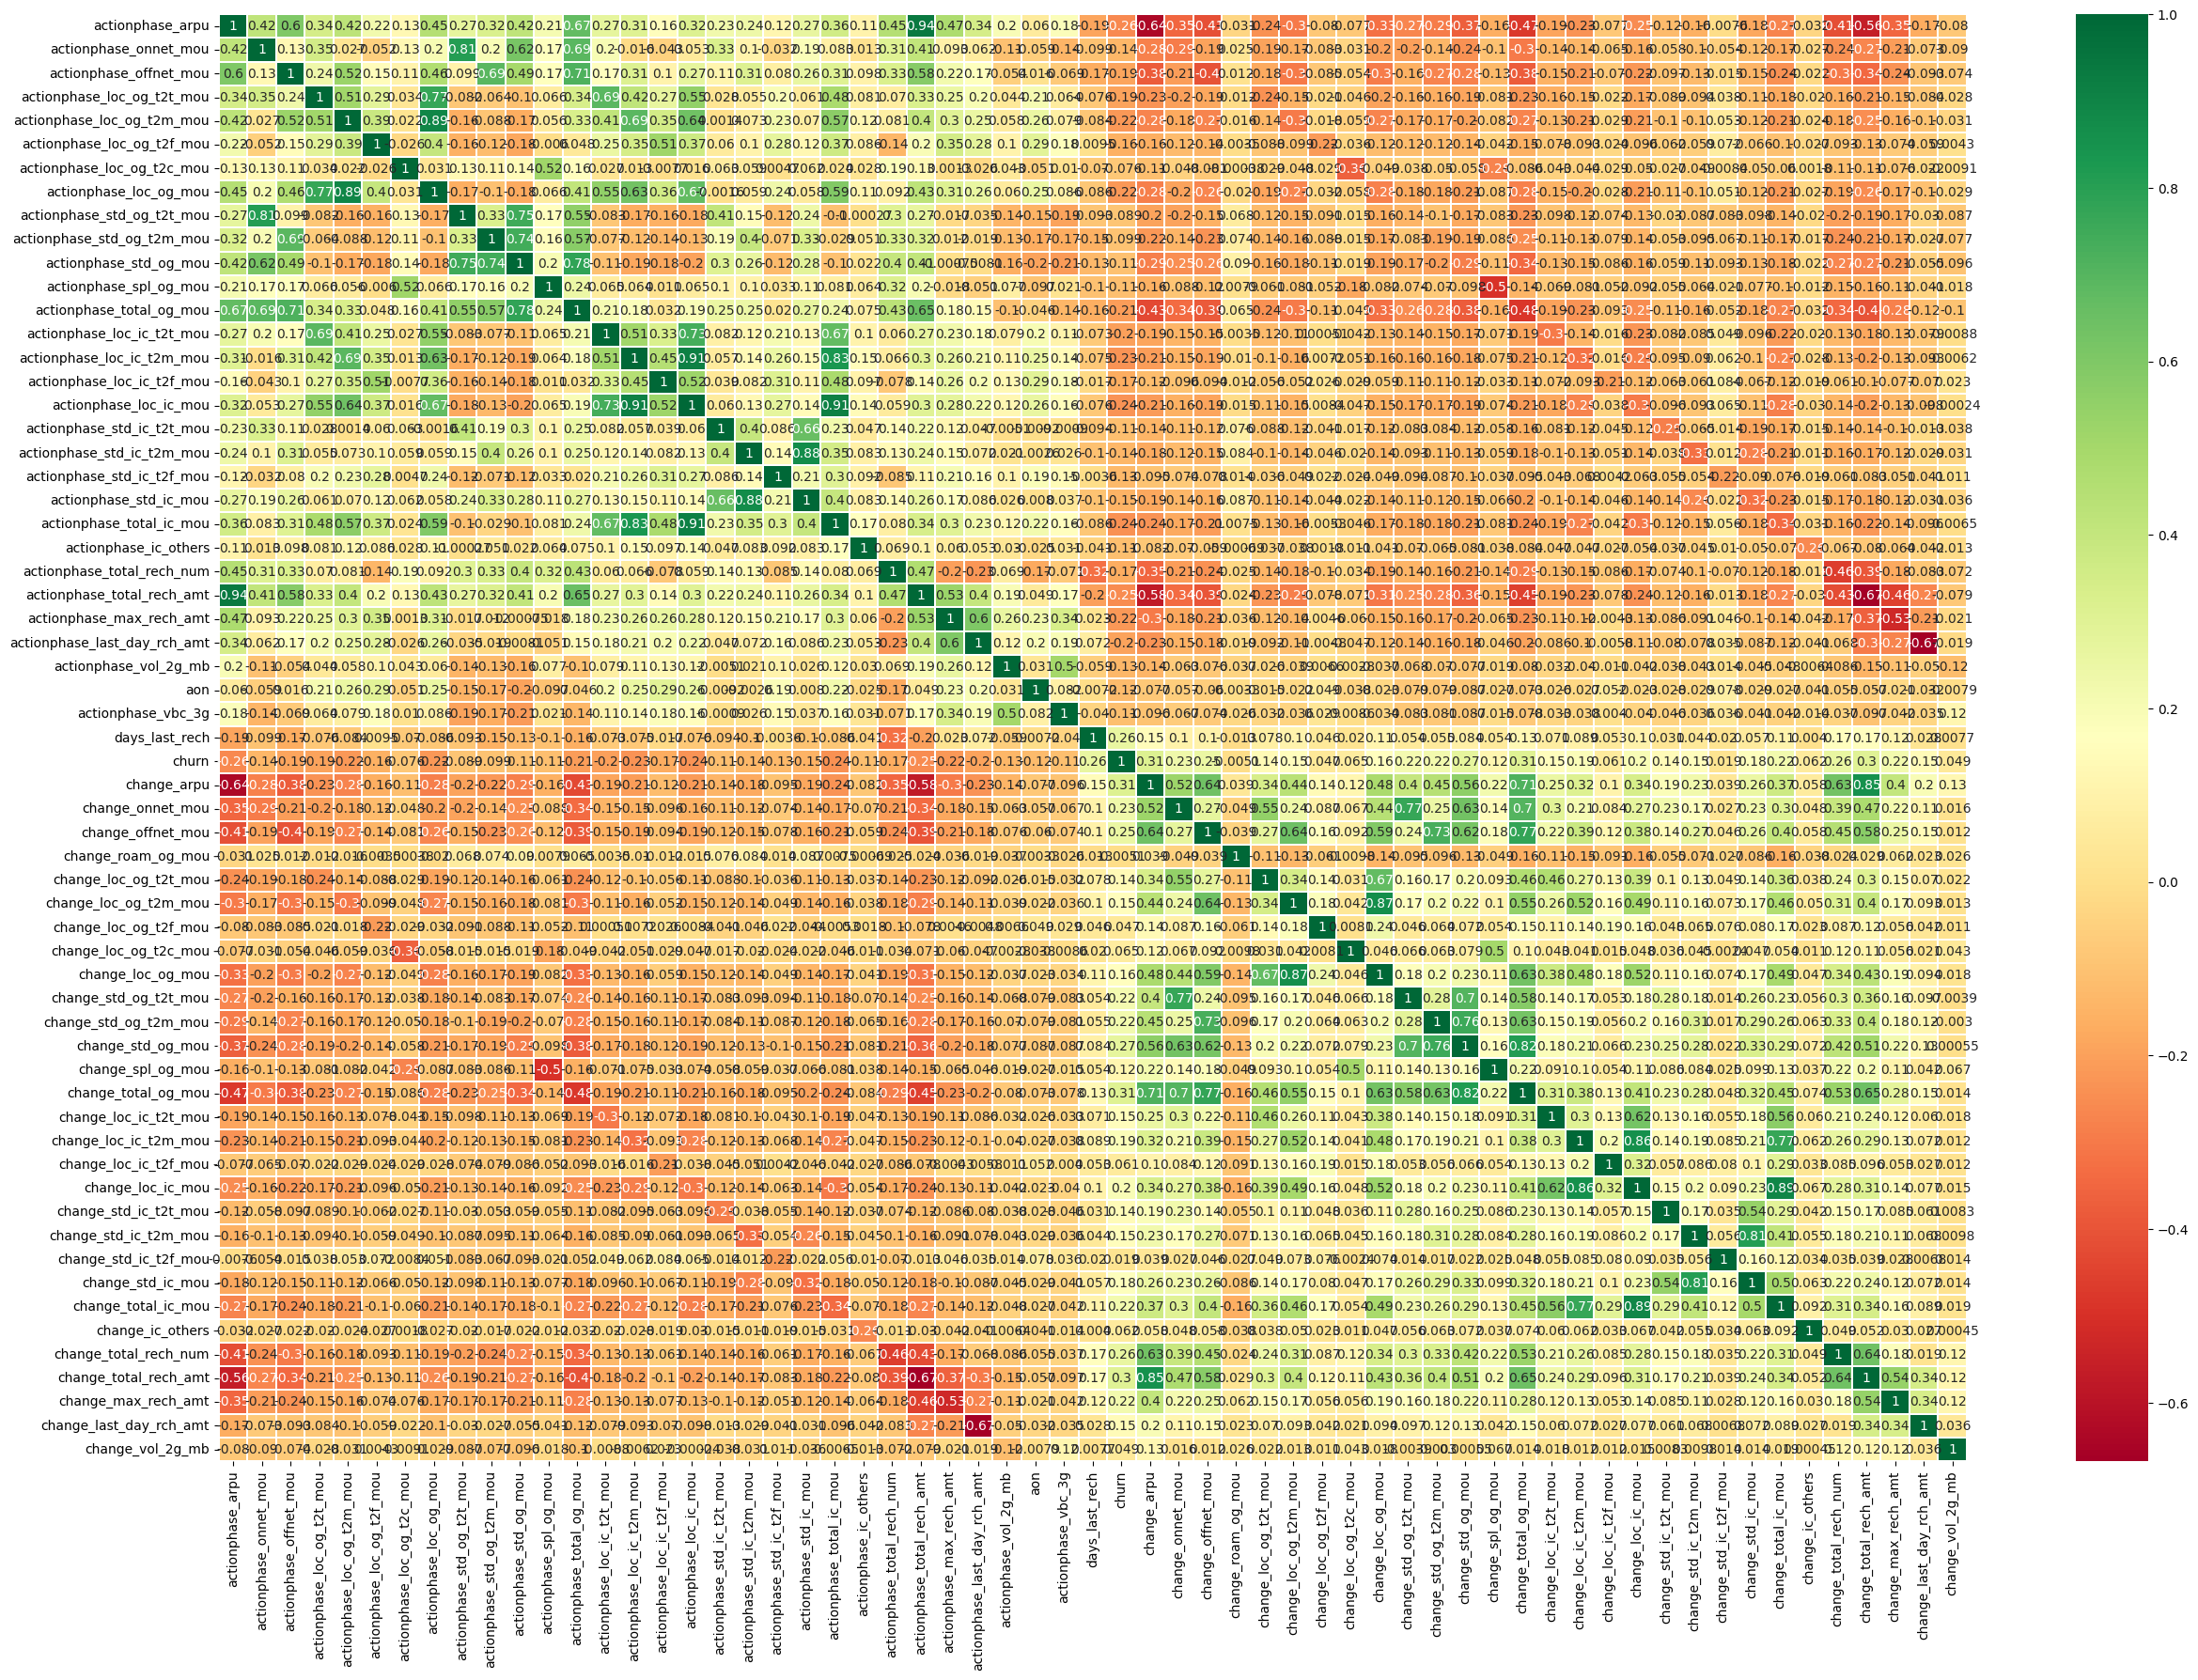

In [130]:
# analyse correlation matrix
plt.figure(figsize = (30,20))        
sns.heatmap(highvalue_df.corr(),linewidths=0.01,cmap="RdYlGn",annot=True)
plt.show()

In [131]:
# correlation matrix
corr_df = highvalue_df.corr()

In [132]:
# fetching all features having more that 70% correlation
corr_dict = {}
for col in corr_df.columns:
    for i, row in corr_df.iterrows():
        if (i != col) & ((row[col]>0.7) | (row[col]<-0.7)):
            if (col,i) not in corr_dict:
                corr_dict[(i,col)] = row[col].round(2)
corr_dict


{('actionphase_total_rech_amt', 'actionphase_arpu'): 0.94,
 ('actionphase_std_og_t2t_mou', 'actionphase_onnet_mou'): 0.81,
 ('actionphase_total_og_mou', 'actionphase_offnet_mou'): 0.71,
 ('actionphase_loc_og_mou', 'actionphase_loc_og_t2t_mou'): 0.77,
 ('actionphase_loc_og_mou', 'actionphase_loc_og_t2m_mou'): 0.89,
 ('actionphase_std_og_mou', 'actionphase_std_og_t2t_mou'): 0.75,
 ('actionphase_std_og_mou', 'actionphase_std_og_t2m_mou'): 0.74,
 ('actionphase_total_og_mou', 'actionphase_std_og_mou'): 0.78,
 ('actionphase_loc_ic_mou', 'actionphase_loc_ic_t2t_mou'): 0.73,
 ('actionphase_loc_ic_mou', 'actionphase_loc_ic_t2m_mou'): 0.91,
 ('actionphase_total_ic_mou', 'actionphase_loc_ic_t2m_mou'): 0.83,
 ('actionphase_total_ic_mou', 'actionphase_loc_ic_mou'): 0.91,
 ('actionphase_std_ic_mou', 'actionphase_std_ic_t2m_mou'): 0.88,
 ('change_total_og_mou', 'change_arpu'): 0.71,
 ('change_total_rech_amt', 'change_arpu'): 0.85,
 ('change_std_og_t2t_mou', 'change_onnet_mou'): 0.77,
 ('change_total_

In [133]:
# dropping highly correlated features from dataframe
dropped_cols = ['actionphase_arpu','actionphase_std_og_t2t_mou','actionphase_total_og_mou','actionphase_loc_og_mou',
                'actionphase_std_og_mou','actionphase_loc_ic_mou','actionphase_loc_ic_t2m_mou','actionphase_std_ic_t2m_mou',
                'change_total_og_mou','change_arpu','change_std_og_t2t_mou','change_std_og_t2m_mou','change_loc_og_t2m_mou',
                'change_loc_ic_t2m_mou','change_loc_ic_mou','change_std_ic_t2m_mou']

X_train.drop(dropped_cols,axis=1,inplace=True)

In [134]:
# checkign shape of train data
X_train.shape

(20672, 44)

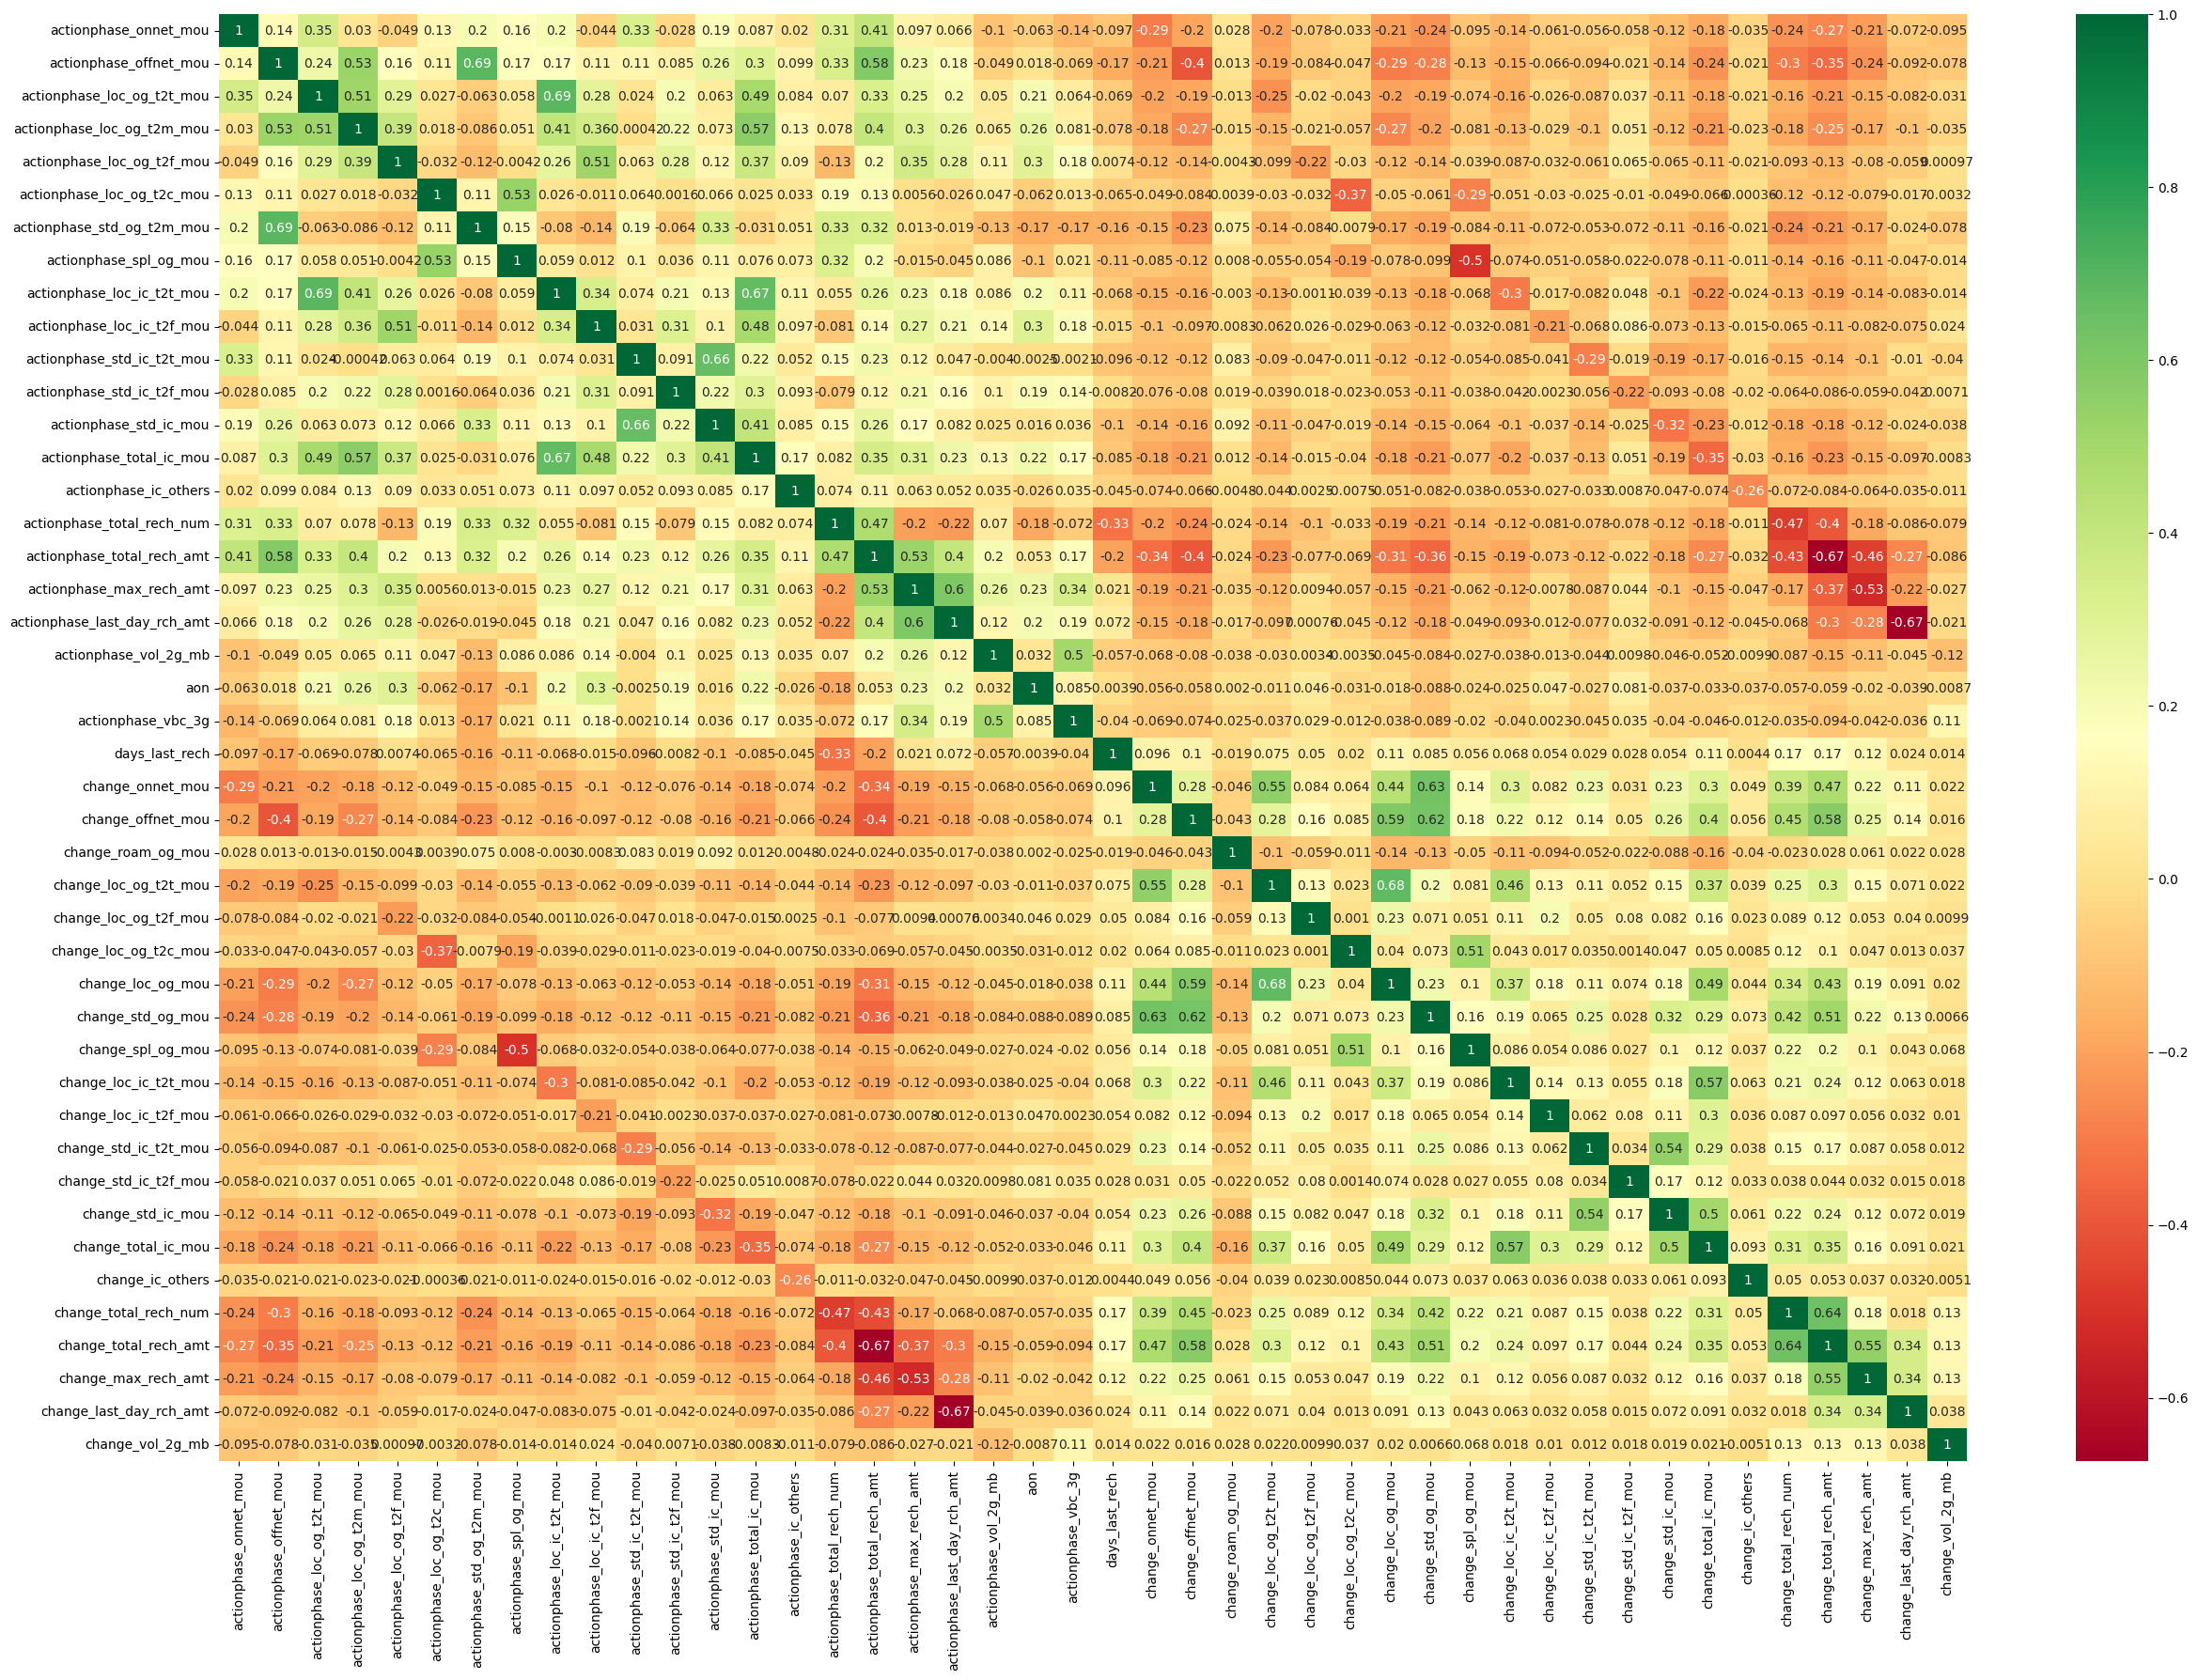

In [135]:
# checking correlation on train data after dropping columns
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True,cmap='RdYlGn')
plt.show()

#### <font color=green> Handling Class Imbalance using SMOTE </font>

In [136]:
# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38014

#### <font color=green> Applying Logistic Regression model on new resampled data </font>

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

##### <font color=blue> Feature selection using RFE </font>

In [138]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('actionphase_onnet_mou', True, 1),
 ('actionphase_offnet_mou', True, 1),
 ('actionphase_loc_og_t2t_mou', True, 1),
 ('actionphase_loc_og_t2m_mou', True, 1),
 ('actionphase_loc_og_t2f_mou', False, 4),
 ('actionphase_loc_og_t2c_mou', False, 6),
 ('actionphase_std_og_t2m_mou', True, 1),
 ('actionphase_spl_og_mou', True, 1),
 ('actionphase_loc_ic_t2t_mou', False, 5),
 ('actionphase_loc_ic_t2f_mou', True, 1),
 ('actionphase_std_ic_t2t_mou', False, 10),
 ('actionphase_std_ic_t2f_mou', True, 1),
 ('actionphase_std_ic_mou', False, 8),
 ('actionphase_total_ic_mou', True, 1),
 ('actionphase_ic_others', True, 1),
 ('actionphase_total_rech_num', True, 1),
 ('actionphase_total_rech_amt', True, 1),
 ('actionphase_max_rech_amt', True, 1),
 ('actionphase_last_day_rch_amt', True, 1),
 ('actionphase_vol_2g_mb', True, 1),
 ('aon', True, 1),
 ('actionphase_vbc_3g', False, 11),
 ('days_last_rech', True, 1),
 ('change_onnet_mou', True, 1),
 ('change_offnet_mou', True, 1),
 ('change_roam_og_mou', True, 1),

In [140]:
# fetching all columns to be dropped
col = X_resampled_smt.columns[rfe.support_]

In [141]:
# assigning important 25 columns to resampled train data
X_resampled_smt.columns[~rfe.support_]

Index(['actionphase_loc_og_t2f_mou', 'actionphase_loc_og_t2c_mou',
       'actionphase_loc_ic_t2t_mou', 'actionphase_std_ic_t2t_mou',
       'actionphase_std_ic_mou', 'actionphase_vbc_3g', 'change_loc_og_t2f_mou',
       'change_loc_og_t2c_mou', 'change_std_og_mou', 'change_spl_og_mou',
       'change_loc_ic_t2t_mou', 'change_loc_ic_t2f_mou',
       'change_std_ic_t2t_mou', 'change_std_ic_t2f_mou', 'change_std_ic_mou',
       'change_ic_others', 'change_total_rech_num', 'change_max_rech_amt',
       'change_last_day_rch_amt'],
      dtype='object')

##### <font color=blue> Running Logistic Regression using StatsModels </font>

In [142]:

import statsmodels.api as sm

In [143]:
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm1 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38014
Model:                            GLM   Df Residuals:                    37988
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12792.
Date:                Tue, 03 Oct 2023   Deviance:                       25583.
Time:                        20:45:24   Pearson chi2:                 5.63e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5100
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.9624      0.027    -72.109      0.000      -2.016      -1.909
actionphase_onnet_mou           -0.2287      0.023     -9.833      0.000      -0.274      -0.183
actionphase_offnet_mou           0.3876      0.047      8.175      0.000       0.295       0.480
actionphase_loc_og_t2t_mou      -0.2176      0.030     -7.220      0.000      -0.277      -0.159
actionphase_loc_og_t2m_mou      -0.9099      0.040    -22.559      0.000      -0.989      -0.831
actionphase_std_og_t2m_mou      -0.5059      0.037    -13.523      0.000      -0.579      -0.433
actionphase_spl_og_mou          -0.1585      0.020     -7.901      0.000      -0.198      -0.119
actionphase_loc_ic_t2f_mou      -0.3458      0.030    -11.694      0.000      -0.404      -0.288
actionphase_std_ic_t2f_mou      -0.1841      0.024     -7.567      0.000      -0.232      -0.136
actionphase_total_ic_mou        -0.4000      0.033    -12.049      0.000      -0.465      -0.335
actionphase_ic_others           -0.3054      0.022    -14.177      0.000      -0.348      -0.263
actionphase_total_rech_num      -0.5067      0.030    -16.869      0.000      -0.566      -0.448
actionphase_total_rech_amt       0.8446      0.043     19.506      0.000       0.760       0.929
actionphase_max_rech_amt        -0.1788      0.029     -6.184      0.000      -0.236      -0.122
actionphase_last_day_rch_amt    -0.7541      0.025    -29.725      0.000      -0.804      -0.704
actionphase_vol_2g_mb           -0.6441      0.025    -25.776      0.000      -0.693      -0.595
aon                             -0.2430      0.021    -11.553      0.000      -0.284      -0.202
days_last_rech                   0.7487      0.015     48.614      0.000       0.718       0.779
change_onnet_mou                 0.2074      0.020     10.128      0.000       0.167       0.248
change_offnet_mou                0.3522      0.024     14.870      0.000       0.306       0.399
change_roam_og_mou              -0.2293      0.015    -15.485      0.000      -0.258      -0.200
change_loc_og_t2t_mou            0.1705      0.032      5.370      0.000       0.108       0.233
change_loc_og_mou               -0.4369      0.035    -12.425      0.000      -0.506      -0.368
change_total_ic_mou              0.3527      0.024     14.413      0.000       0.305       0.401
change_total_rech_amt            0.2012      0.030      6.616      0.000       0.142       0.261
change_vol_2g_mb                 0.1530      0.019      7.845      0.000       0.115       0.191
================================================================================================
"""

<font color=navy> **Observation** </font>
-  All model features got 0 p-values which is good
-  Need to check VIF before proceeding with this model

In [144]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[col].values, i) for i in range(X_resampled_smt[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1         actionphase_offnet_mou  9.44
11    actionphase_total_rech_amt  8.60
3     actionphase_loc_og_t2m_mou  4.93
23         change_total_rech_amt  4.92
4     actionphase_std_og_t2m_mou  4.91
12      actionphase_max_rech_amt  3.79
21             change_loc_og_mou  3.65
8       actionphase_total_ic_mou  3.28
10    actionphase_total_rech_num  3.18
18             change_offnet_mou  2.90
20         change_loc_og_t2t_mou  2.88
2     actionphase_loc_og_t2t_mou  2.49
13  actionphase_last_day_rch_amt  2.30
17              change_onnet_mou  2.18
22           change_total_ic_mou  2.17
0          actionphase_onnet_mou  2.17
6     actionphase_loc_ic_t2f_mou  1.91
14         actionphase_vol_2g_mb  1.41
7     actionphase_std_ic_t2f_mou  1.41
15                           aon  1.35
16                days_last_rech  1.34
5         actionphase_spl_og_mou  1.33
9          actionphase_ic_others  1.22
24              change_vol_2g_mb  1.10
19            change_roam_og_mou  1.08

<font color=navy> **Observation** </font>
-  actionphase_offnet_mou got very high VIF value hence this can be dropped

In [146]:
# Let's drop actionphase_offnet_mou since it has a high VIF
col = col.drop('actionphase_offnet_mou')
col

Index(['actionphase_onnet_mou', 'actionphase_loc_og_t2t_mou',
       'actionphase_loc_og_t2m_mou', 'actionphase_std_og_t2m_mou',
       'actionphase_spl_og_mou', 'actionphase_loc_ic_t2f_mou',
       'actionphase_std_ic_t2f_mou', 'actionphase_total_ic_mou',
       'actionphase_ic_others', 'actionphase_total_rech_num',
       'actionphase_total_rech_amt', 'actionphase_max_rech_amt',
       'actionphase_last_day_rch_amt', 'actionphase_vol_2g_mb', 'aon',
       'days_last_rech', 'change_onnet_mou', 'change_offnet_mou',
       'change_roam_og_mou', 'change_loc_og_t2t_mou', 'change_loc_og_mou',
       'change_total_ic_mou', 'change_total_rech_amt', 'change_vol_2g_mb'],
      dtype='object')

In [147]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm2 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38014
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12825.
Date:                Tue, 03 Oct 2023   Deviance:                       25651.
Time:                        20:45:27   Pearson chi2:                 5.48e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5091
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.9675      0.027    -72.055      0.000      -2.021      -1.914
actionphase_onnet_mou           -0.2915      0.022    -13.266      0.000      -0.335      -0.248
actionphase_loc_og_t2t_mou      -0.2194      0.030     -7.264      0.000      -0.279      -0.160
actionphase_loc_og_t2m_mou      -0.7423      0.035    -21.341      0.000      -0.810      -0.674
actionphase_std_og_t2m_mou      -0.2493      0.020    -12.487      0.000      -0.288      -0.210
actionphase_spl_og_mou          -0.1557      0.020     -7.764      0.000      -0.195      -0.116
actionphase_loc_ic_t2f_mou      -0.3482      0.030    -11.763      0.000      -0.406      -0.290
actionphase_std_ic_t2f_mou      -0.1840      0.024     -7.567      0.000      -0.232      -0.136
actionphase_total_ic_mou        -0.4247      0.033    -12.779      0.000      -0.490      -0.360
actionphase_ic_others           -0.3086      0.022    -14.341      0.000      -0.351      -0.266
actionphase_total_rech_num      -0.5233      0.030    -17.487      0.000      -0.582      -0.465
actionphase_total_rech_amt       0.9980      0.039     25.591      0.000       0.922       1.074
actionphase_max_rech_amt        -0.2009      0.029     -6.971      0.000      -0.257      -0.144
actionphase_last_day_rch_amt    -0.7531      0.025    -29.696      0.000      -0.803      -0.703
actionphase_vol_2g_mb           -0.6680      0.025    -26.896      0.000      -0.717      -0.619
aon                             -0.2440      0.021    -11.617      0.000      -0.285      -0.203
days_last_rech                   0.7430      0.015     48.323      0.000       0.713       0.773
change_onnet_mou                 0.1963      0.020      9.612      0.000       0.156       0.236
change_offnet_mou                0.3050      0.023     13.276      0.000       0.260       0.350
change_roam_og_mou              -0.2386      0.015    -16.185      0.000      -0.267      -0.210
change_loc_og_t2t_mou            0.1710      0.032      5.381      0.000       0.109       0.233
change_loc_og_mou               -0.4246      0.035    -12.047      0.000      -0.494      -0.355
change_total_ic_mou              0.3561      0.025     14.520      0.000       0.308       0.404
change_total_rech_amt            0.2512      0.030      8.433      0.000       0.193       0.310
change_vol_2g_mb                 0.1413      0.019      7.283      0.000       0.103       0.179
================================================================================================
"""

<font color=navy> **Observation** </font>
-  p-values are still good after dropping a column, need to check VIF again

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10    actionphase_total_rech_amt  4.28
20             change_loc_og_mou  3.01
22         change_total_rech_amt  2.83
9     actionphase_total_rech_num  2.53
11      actionphase_max_rech_amt  2.53
19         change_loc_og_t2t_mou  2.41
17             change_offnet_mou  2.15
2     actionphase_loc_og_t2m_mou  2.14
7       actionphase_total_ic_mou  2.07
1     actionphase_loc_og_t2t_mou  1.86
12  actionphase_last_day_rch_amt  1.78
16              change_onnet_mou  1.78
0          actionphase_onnet_mou  1.67
21           change_total_ic_mou  1.54
5     actionphase_loc_ic_t2f_mou  1.47
3     actionphase_std_og_t2m_mou  1.43
13         actionphase_vol_2g_mb  1.24
14                           aon  1.23
6     actionphase_std_ic_t2f_mou  1.18
15                days_last_rech  1.14
4         actionphase_spl_og_mou  1.14
18            change_roam_og_mou  1.06
23              change_vol_2g_mb  1.06
8          actionphase_ic_others  1.05

<font color=navy> **Observation** </font>
-  VIF for actionphase_total_rech_amt is >3 so dropping it

In [149]:
# Let's drop actionphase_total_rech_amt since it has a high VIF
col = col.drop('actionphase_total_rech_amt')
col

Index(['actionphase_onnet_mou', 'actionphase_loc_og_t2t_mou',
       'actionphase_loc_og_t2m_mou', 'actionphase_std_og_t2m_mou',
       'actionphase_spl_og_mou', 'actionphase_loc_ic_t2f_mou',
       'actionphase_std_ic_t2f_mou', 'actionphase_total_ic_mou',
       'actionphase_ic_others', 'actionphase_total_rech_num',
       'actionphase_max_rech_amt', 'actionphase_last_day_rch_amt',
       'actionphase_vol_2g_mb', 'aon', 'days_last_rech', 'change_onnet_mou',
       'change_offnet_mou', 'change_roam_og_mou', 'change_loc_og_t2t_mou',
       'change_loc_og_mou', 'change_total_ic_mou', 'change_total_rech_amt',
       'change_vol_2g_mb'],
      dtype='object')

In [150]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm3 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38014
Model:                            GLM   Df Residuals:                    37990
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13159.
Date:                Tue, 03 Oct 2023   Deviance:                       26319.
Time:                        20:45:29   Pearson chi2:                 5.51e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5004
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.9625      0.027    -71.522      0.000      -2.016      -1.909
actionphase_onnet_mou           -0.1288      0.021     -6.169      0.000      -0.170      -0.088
actionphase_loc_og_t2t_mou      -0.2396      0.030     -7.986      0.000      -0.298      -0.181
actionphase_loc_og_t2m_mou      -0.6200      0.035    -17.871      0.000      -0.688      -0.552
actionphase_std_og_t2m_mou      -0.1490      0.020     -7.632      0.000      -0.187      -0.111
actionphase_spl_og_mou          -0.1657      0.020     -8.310      0.000      -0.205      -0.127
actionphase_loc_ic_t2f_mou      -0.3700      0.029    -12.583      0.000      -0.428      -0.312
actionphase_std_ic_t2f_mou      -0.1800      0.024     -7.454      0.000      -0.227      -0.133
actionphase_total_ic_mou        -0.4189      0.033    -12.654      0.000      -0.484      -0.354
actionphase_ic_others           -0.3027      0.021    -14.243      0.000      -0.344      -0.261
actionphase_total_rech_num      -0.1496      0.025     -5.893      0.000      -0.199      -0.100
actionphase_max_rech_amt         0.1888      0.024      7.782      0.000       0.141       0.236
actionphase_last_day_rch_amt    -0.5994      0.024    -25.020      0.000      -0.646      -0.552
actionphase_vol_2g_mb           -0.6604      0.025    -26.761      0.000      -0.709      -0.612
aon                             -0.2481      0.021    -12.004      0.000      -0.289      -0.208
days_last_rech                   0.7240      0.015     48.075      0.000       0.694       0.754
change_onnet_mou                 0.2077      0.020     10.259      0.000       0.168       0.247
change_offnet_mou                0.3245      0.023     14.121      0.000       0.279       0.369
change_roam_og_mou              -0.2251      0.015    -15.490      0.000      -0.254      -0.197
change_loc_og_t2t_mou            0.1841      0.032      5.831      0.000       0.122       0.246
change_loc_og_mou               -0.4179      0.035    -11.917      0.000      -0.487      -0.349
change_total_ic_mou              0.3974      0.024     16.312      0.000       0.350       0.445
change_total_rech_amt            0.0269      0.029      0.940      0.347      -0.029       0.083
change_vol_2g_mb                 0.1633      0.019      8.515      0.000       0.126       0.201
================================================================================================
"""

In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
19             change_loc_og_mou  3.01
21         change_total_rech_amt  2.44
18         change_loc_og_t2t_mou  2.41
16             change_offnet_mou  2.13
7       actionphase_total_ic_mou  2.06
10      actionphase_max_rech_amt  2.06
9     actionphase_total_rech_num  2.03
2     actionphase_loc_og_t2m_mou  1.96
1     actionphase_loc_og_t2t_mou  1.85
15              change_onnet_mou  1.77
11  actionphase_last_day_rch_amt  1.68
20           change_total_ic_mou  1.54
0          actionphase_onnet_mou  1.52
5     actionphase_loc_ic_t2f_mou  1.47
3     actionphase_std_og_t2m_mou  1.33
13                           aon  1.23
12         actionphase_vol_2g_mb  1.23
6     actionphase_std_ic_t2f_mou  1.18
14                days_last_rech  1.14
4         actionphase_spl_og_mou  1.14
17            change_roam_og_mou  1.06
22              change_vol_2g_mb  1.06
8          actionphase_ic_others  1.05

<font color=navy> **Observation** </font>
-  VIF for change_loc_og_mou is >3 so dropping it

In [152]:
# Let's drop change_loc_og_mou since it has a high VIF
col = col.drop('change_loc_og_mou')
col

Index(['actionphase_onnet_mou', 'actionphase_loc_og_t2t_mou',
       'actionphase_loc_og_t2m_mou', 'actionphase_std_og_t2m_mou',
       'actionphase_spl_og_mou', 'actionphase_loc_ic_t2f_mou',
       'actionphase_std_ic_t2f_mou', 'actionphase_total_ic_mou',
       'actionphase_ic_others', 'actionphase_total_rech_num',
       'actionphase_max_rech_amt', 'actionphase_last_day_rch_amt',
       'actionphase_vol_2g_mb', 'aon', 'days_last_rech', 'change_onnet_mou',
       'change_offnet_mou', 'change_roam_og_mou', 'change_loc_og_t2t_mou',
       'change_total_ic_mou', 'change_total_rech_amt', 'change_vol_2g_mb'],
      dtype='object')

In [153]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_resampled_smt[col])
logm3 = sm.GLM(y_resampled_smt,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38014
Model:                            GLM   Df Residuals:                    37991
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13231.
Date:                Tue, 03 Oct 2023   Deviance:                       26461.
Time:                        20:45:31   Pearson chi2:                 5.67e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4985
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.9647      0.028    -71.401      0.000      -2.019      -1.911
actionphase_onnet_mou           -0.1130      0.021     -5.444      0.000      -0.154      -0.072
actionphase_loc_og_t2t_mou      -0.2712      0.030     -9.015      0.000      -0.330      -0.212
actionphase_loc_og_t2m_mou      -0.5783      0.035    -16.632      0.000      -0.646      -0.510
actionphase_std_og_t2m_mou      -0.1338      0.019     -6.917      0.000      -0.172      -0.096
actionphase_spl_og_mou          -0.1750      0.020     -8.791      0.000      -0.214      -0.136
actionphase_loc_ic_t2f_mou      -0.3832      0.029    -13.000      0.000      -0.441      -0.325
actionphase_std_ic_t2f_mou      -0.1779      0.024     -7.368      0.000      -0.225      -0.131
actionphase_total_ic_mou        -0.4349      0.033    -13.169      0.000      -0.500      -0.370
actionphase_ic_others           -0.3050      0.021    -14.359      0.000      -0.347      -0.263
actionphase_total_rech_num      -0.1506      0.025     -5.952      0.000      -0.200      -0.101
actionphase_max_rech_amt         0.1966      0.024      8.099      0.000       0.149       0.244
actionphase_last_day_rch_amt    -0.6120      0.024    -25.551      0.000      -0.659      -0.565
actionphase_vol_2g_mb           -0.6558      0.025    -26.629      0.000      -0.704      -0.607
aon                             -0.2578      0.021    -12.463      0.000      -0.298      -0.217
days_last_rech                   0.7086      0.015     47.433      0.000       0.679       0.738
change_onnet_mou                 0.2228      0.020     11.066      0.000       0.183       0.262
change_offnet_mou                0.2411      0.022     11.144      0.000       0.199       0.283
change_roam_og_mou              -0.2141      0.014    -14.873      0.000      -0.242      -0.186
change_loc_og_t2t_mou           -0.0589      0.024     -2.445      0.014      -0.106      -0.012
change_total_ic_mou              0.3177      0.023     13.617      0.000       0.272       0.363
change_total_rech_amt            0.0260      0.029      0.910      0.363      -0.030       0.082
change_vol_2g_mb                 0.1598      0.019      8.335      0.000       0.122       0.197
================================================================================================
"""

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
20         change_total_rech_amt  2.44
10      actionphase_max_rech_amt  2.06
7       actionphase_total_ic_mou  2.05
9     actionphase_total_rech_num  2.03
2     actionphase_loc_og_t2m_mou  1.89
1     actionphase_loc_og_t2t_mou  1.84
15              change_onnet_mou  1.77
16             change_offnet_mou  1.71
11  actionphase_last_day_rch_amt  1.68
18         change_loc_og_t2t_mou  1.61
0          actionphase_onnet_mou  1.52
19           change_total_ic_mou  1.48
5     actionphase_loc_ic_t2f_mou  1.47
3     actionphase_std_og_t2m_mou  1.33
12         actionphase_vol_2g_mb  1.23
13                           aon  1.23
6     actionphase_std_ic_t2f_mou  1.18
14                days_last_rech  1.14
4         actionphase_spl_og_mou  1.14
21              change_vol_2g_mb  1.06
8          actionphase_ic_others  1.05
17            change_roam_og_mou  1.05

<font color=navy> **Observation** </font>
-  Both p-value and VIF looks good for this model hence we can proceed with this model for predicting target variable

In [155]:
# prediction target variable probablity
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [156]:
y_train_pred[:10]

array([0.03883054, 0.01178724, 0.0069816 , 0.78033927, 0.14059581,
       0.63329622, 0.04245948, 0.01111756, 0.00416244, 0.74210864])

In [157]:
# creating a new dataframe for target predictions
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_smt.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_resampled_smt.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.038831       0
1      0    0.011787       1
2      0    0.006982       2
3      1    0.780339       3
4      0    0.140596       4

In [158]:
# Let's create columns with probability cutoffs 
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  final_predicted
0      0    0.038831       0                0
1      0    0.011787       1                0
2      0    0.006982       2                0
3      1    0.780339       3                1
4      0    0.140596       4                0

#### <font color=blue> Evaluation metric on Train Data </font>

ROC Curve

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

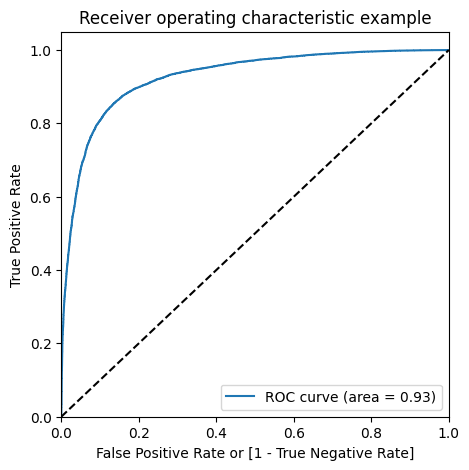

In [160]:

draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [161]:
confusion = confusion_matrix(y_resampled_smt, y_train_pred_final['final_predicted'])

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity = TP / float(TP+FN)
Specificity = TN / float(TN+FP)

print ('Accuracy: ', accuracy_score(y_resampled_smt, y_train_pred_final['final_predicted']))
print ('Sensitivity: ', Sensitivity)
print ('Specificity: ', Specificity)
print ('\n confussion matrix:\n',confusion)

Accuracy:  0.8583153574998684
Sensitivity:  0.8675224917135792
Specificity:  0.8491082232861578

 confussion matrix:
 [[16139  2868]
 [ 2518 16489]]


<font color=navy> **Observation** </font>
-  Accuracy of model is 85.83% 
-  Sensitivity is 86.75%
-  Specificity is 84.91%
-  AUC ROC is 0.93

All the metrics looks good on Training Data

#### <font color=green> Applying Model on Test Data </font>

In [162]:
X_test = X_test[col]
X_test.head()

actionphase_onnet_mou  actionphase_loc_og_t2t_mou  \
19621               1.968076                    0.171923   
24266               2.093523                    2.239516   
21224               2.186774                    2.239516   
6986                0.699020                    2.239516   
6482               -0.063386                    0.607619   

       actionphase_loc_og_t2m_mou  actionphase_std_og_t2m_mou  \
19621                   -0.697895                    2.069037   
24266                   -0.425594                   -0.711903   
21224                    0.215355                    2.069037   
6986                     2.411231                    2.069037   
6482                     0.798520                   -0.559822   

       actionphase_spl_og_mou  actionphase_loc_ic_t2f_mou  \
19621                0.890796                   -0.729279   
24266               -0.703320                    0.179763   
21224               -0.703320                   -0.655265   
6986                -0.703320                    2.091314   
6482                 0.981788                    2.091314   

       actionphase_std_ic_t2f_mou  actionphase_total_ic_mou  \
19621                   -0.578351                 -0.631924   
24266                   -0.578351                  1.110905   
21224                   -0.578351                  2.361969   
6986                     1.791329                  2.361969   
6482                     1.791329                  2.361969   

       actionphase_ic_others  actionphase_total_rech_num  \
19621              -0.580266                    0.346077   
24266               1.803307                   -0.364642   
21224               1.803307                    0.914652   
6986               -0.580266                    1.341083   
6482               -0.580266                   -0.933217   

       actionphase_max_rech_amt  actionphase_last_day_rch_amt  \
19621                 -0.171503                     -0.760583   
24266                  0.517787                     -0.399574   
21224                  0.223825                      0.532063   
6986                   0.517787                      0.532063   
6482                   1.044891                      1.929518   

       actionphase_vol_2g_mb       aon  days_last_rech  change_onnet_mou  \
19621              -0.596876 -1.070125       -0.545801         -1.849209   
24266               1.832808 -0.281795        0.060931          1.738075   
21224              -0.596876 -0.272593        0.971030         -1.849209   
6986               -0.596876 -0.092637       -0.849167         -1.849209   
6482               -0.596876  1.143537        0.364298         -0.649818   

       change_offnet_mou  change_roam_og_mou  change_loc_og_t2t_mou  \
19621           0.607844           -0.328179              -0.618756   
24266           0.376402           -0.328179               1.893948   
21224           1.884540            1.604338              -1.508867   
6986           -2.016077           -0.328179              -1.893909   
6482           -0.479710            1.604338              -0.732163   

       change_total_ic_mou  change_total_rech_amt  change_vol_2g_mb  
19621             0.066383               0.218517          1.589095  
24266             1.146585               0.813608          1.589095  
21224             0.025195              -0.571837         -0.277778  
6986             -2.056782              -1.703129          0.981890  
6482             -2.056782              -0.663270          1.589095

In [163]:
X_test_sm = sm.add_constant(X_test)

In [164]:
# predicted probablities on test data
y_test_pred_prob = res.predict(X_test_sm)
y_test_pred_prob

19621    0.343783
24266    0.049638
21224    0.020756
6986     0.000323
6482     0.002218
           ...   
17567    0.832788
13746    0.017007
7674     0.058117
20691    0.268506
14055    0.774246
Length: 8860, dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred_prob)
y_pred_1.head()

0
19621  0.343783
24266  0.049638
21224  0.020756
6986   0.000323
6482   0.002218

In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
19621      0
24266      0
21224      0
6986       0
6482       0

In [167]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

churn  CustID         0
0      0   19621  0.343783
1      0   24266  0.049638
2      0   21224  0.020756
3      0    6986  0.000323
4      0    6482  0.002218

In [170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [171]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)

In [172]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0   19621      0    0.343783
1   24266      0    0.049638
2   21224      0    0.020756
3    6986      0    0.000323
4    6482      0    0.002218

In [173]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0   19621      0    0.343783                0
1   24266      0    0.049638                0
2   21224      0    0.020756                0
3    6986      0    0.000323                0
4    6482      0    0.002218                0

#### <font color=blue> Evaluation metrics on Test Data </font>

In [174]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob, drop_intermediate = False )

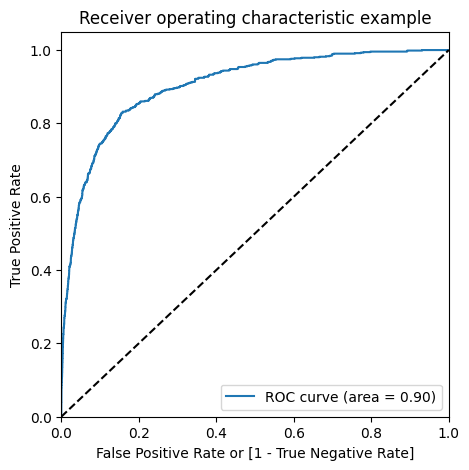

In [175]:

draw_roc(y_pred_final.churn, y_pred_final.Churn_Prob)

In [176]:
confusion = confusion_matrix(y_pred_final['churn'], y_pred_final['final_predicted'])

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity = TP / float(TP+FN)
Specificity = TN / float(TN+FP)

print ('Accuracy: ', accuracy_score(y_pred_final['churn'], y_pred_final['final_predicted']))
print ('Sensitivity: ', Sensitivity)
print ('Specificity: ', Specificity)
print ('\n confussion matrix:\n',confusion)

Accuracy:  0.8501128668171558
Sensitivity:  0.8067226890756303
Specificity:  0.8539160324085441

 confussion matrix:
 [[6956 1190]
 [ 138  576]]


<font color=navy> **Observation** </font>
-  Accuracy of model is 85.01%
-  Sensitivity is 80.67%
-  Speicificity is 85.39%
-  AUC ROC is 0.90

All metrics came out good for Test Data too when Logistic Regression is used without PCA

#### <font color=green> Fetching Feature importance based on Logistic Model result </font>

In [177]:
res.params.sort_values(ascending=False,axis=0)

days_last_rech                  0.708582
change_total_ic_mou             0.317685
change_offnet_mou               0.241062
change_onnet_mou                0.222826
actionphase_max_rech_amt        0.196576
change_vol_2g_mb                0.159818
change_total_rech_amt           0.026037
change_loc_og_t2t_mou          -0.058877
actionphase_onnet_mou          -0.112966
actionphase_std_og_t2m_mou     -0.133750
actionphase_total_rech_num     -0.150574
actionphase_spl_og_mou         -0.174975
actionphase_std_ic_t2f_mou     -0.177920
change_roam_og_mou             -0.214085
aon                            -0.257786
actionphase_loc_og_t2t_mou     -0.271225
actionphase_ic_others          -0.305032
actionphase_loc_ic_t2f_mou     -0.383168
actionphase_total_ic_mou       -0.434902
actionphase_loc_og_t2m_mou     -0.578304
actionphase_last_day_rch_amt   -0.611960
actionphase_vol_2g_mb          -0.655751
const                          -1.964735
dtype: float64

<font color=navy> **Observation** </font> <br>
Top 5 features contributing for churn customers are based on Logistic Regression Model are:
-  days_last_rech (positively)
-  actionphase_vol_2g_mb (negatively)
-  actionphase_last_day_rch_amt (negatively)
-  actionphase_loc_og_t2m_mou (negatively)
-  actionphase_total_ic_mou (negatively)

## <font color=green> Model Comparision </font>

<font color=blue><b>Logistic Regression on PCA</b> </font>

<font color=brown>Train </font>
>Accuracy - 85.40%

>Sensitivity - 86.25%

>Specificity - 84.55%

>AUC-ROC - 0.92

<font color=brown>Test </font>
>Accuracy - 84.59%

>Sensitivity - 80.53%

>Specificity - 84.94%

>AUC-ROC - 0.90



<font color=blue><b>Random Forest Classification with Hyper Params max_depth = 11, max_features=19, min_samples_leaf=20, n_estimators=30</b></font>

<font color=brown>Train </font>

>Accuracy - 95.99%

>Sensitivity - 97.42%

>Specificity - 94.57%

>AUC-ROC - 0.99

<font color=brown>Test </font>
>Accuracy - 92.60%

>Sensitivity - 79.41%

>Specificity - 93.76%

>AUC-ROC - 0.94

<font color=green><b>Top 5 contributers for churn customers based on Random Forest Classification Model:<b></font>

>change_roam_og_mou <br>

>days_last_rech<br>

>actionphase_loc_ic_mou<br>

>actionphase_total_ic_mou<br>

>actionphase_loc_ic_t2m_mou<br>



<font color=blue><b>Logistic Regression without PCA </b></font>

<font color=brown>Train </font>
>Accuracy - 85.83%

>Sensitivity - 86.75%

>Specificity - 84.91%

>AUC-ROC - 0.93

<font color=brown>Test </font>
>Accuracy - 85.01%

>Sensitivity - 80.67%

>Specificity - 85.39%

>AUC-ROC - 0.90


<font color=green><b>Top 5 contributers for churn customers based on Logistic Regression Model:<b></font>

>days_last_rech (positively)

>actionphase_vol_2g_mb (negatively)

>actionphase_last_day_rch_amt (negatively)

>actionphase_loc_og_t2m_mou (negatively)

>actionphase_total_ic_mou (negatively)

As per the business objective it is important to predict all Churn customers accurately, Sensitivity is the metric which helps us to evaluate model performance.

With the model comparision, Logistic Regression with and without PCA did well as it got better Sensitivity on unseen data.

### <font color=green> Final Inferences </font>

-  Customers who are likely to churn can be identified using number of days they have recharged, It indicates that customer is no longer showing interest to use services or not finding any exciting prepaid plans to recharge. 

-  It is observed that for high valued customers, during action phase if there is less usage of minutes for outgoing/incoming calls they are likely to be Churned.

-  Customers also deciding on Churn based on Roaming outgoing calls which indicates either signal quality in remote areas are not good or there are no good roaming packages when compared to other competitors

-  Telecom to other or fixed line network calls also acting as important feature for high value customers who are getting churned


### <font color=green> Suggestions </font>

-  Business can look in to introducing new low cost recharge plans to attract customers in recharging and using services

-  Business can also check to introduce good call packages for outgoing/incoming calls which attracts customers to use call packages

-  Call Tarrifs to Other or Fixed line network need to be revisited to reduce churn rate and compete with market

-  Business also need to understand roaming call quality as customers seem to decide on churning based on roaming outgoing calls

-  Business need to check if they had to introduce roaming packages if quality is good to compete with the market